In [1015]:
import sys
print(sys.path)
sys.path.insert(1,'/home/emiliano/Documents/ISP/proyectos/causality/latentNoise_krr/src/ITE-1.1_code')
sys.path.insert(1,'/home/emiliano/Documents/ISP/proyectos/causality/latentNoise_krr/src/')
from latentNoise_funcs_gen import *
from ANLSMN_genfuncs import *
from processResults import *
%load_ext autoreload
%autoreload 2


['/home/emiliano/Documents/ISP/proyectos/causality/latentNoise_krr/notebooks', '/home/emiliano/Documents/ISP/proyectos/causality/latentNoise_krr/src/', '/home/emiliano/Documents/ISP/proyectos/causality/latentNoise_krr/src/ITE-1.1_code', './ITE-1.1_code', '/home/emiliano/Documents/ISP/proyectos/causality/latentNoise_krr/src/', '/home/emiliano/Documents/ISP/proyectos/causality/latentNoise_krr/src/ITE-1.1_code', '/home/emiliano/anaconda3/lib/python37.zip', '/home/emiliano/anaconda3/lib/python3.7', '/home/emiliano/anaconda3/lib/python3.7/lib-dynload', '', '/home/emiliano/anaconda3/lib/python3.7/site-packages', '/home/emiliano/anaconda3/lib/python3.7/site-packages/locket-0.2.1-py3.7.egg', '/home/emiliano/anaconda3/lib/python3.7/site-packages/IPython/extensions', '/home/emiliano/.ipython']
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [1016]:
import jax.numpy as np
import numpy as onp 
import pandas as pd
import pickle5 as pickle5
import pickle 
import time
import json
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
import bisect
import itertools
from scipy.spatial import distance
from itertools import chain, combinations

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import balanced_accuracy_score

#from fairlearn.reductions import ExponentiatedGradient, DemographicParity 
from sklearn.tree import DecisionTreeClassifier
#from fairlearn.metrics import MetricFrame, selection_rate, count
import sklearn.metrics as skm

from sklearn.utils import check_random_state



## benchmark additive decision

In [1395]:
repos = "/home/emiliano/Documents/ISP/proyectos/causality/latentNoise_krr/results/"




suffix= "_v2_optType.pkl"
suffix= "_v5_optType.pkl"
suffix= "_v3_optType.pkl"
suffix= "_v3_real_optType.pkl"
suffix= "_v6_optType.pkl"
suffix= "_v7_optType.pkl"
suffix= "_v8_optType.pkl"
suffix= "_v9_optType.pkl"
suffix= "_v10_optType.pkl"
suffix= "_v11_optType.pkl"
suffix= "_v12_optType.pkl"
#suffix= "_v13_optType.pkl"
suffix= "_v14_optType.pkl"
suffix= "_v14_GP_optType.pkl"
suffix= "_v14_both_optType.pkl"

dec_add_bnch = pickle5.load( open( repos+"res_bnch_long"+suffix, "rb" ) )
res_bnch = pickle5.load( open( repos+"res_bnch"+suffix, "rb" ) ) 

In [1396]:
dec_add_bnch

,type,dataset,variable,conf,value
0,AN,AN.1,ent,1.00,1.000000
1,AN,AN.1,ent2,1.00,0.424185
2,AN,AN.1,errs,1.00,1.000000
3,AN,AN.1,hsic,1.00,1.000000
4,AN,AN.1,hsic2,1.00,0.173757
...,...,...,...,...,...
6007,tcep,99,ent2,1.00,0.278004
6008,tcep,99,errs,1.00,1.000000
6009,tcep,99,hsic,0.84,0.428571
6010,tcep,99,hsic2,0.99,0.003022


/home/emiliano/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/emiliano/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/home/emiliano/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/home/emiliano/anaconda3/lib/python3.7/site-packages/matplotlib/

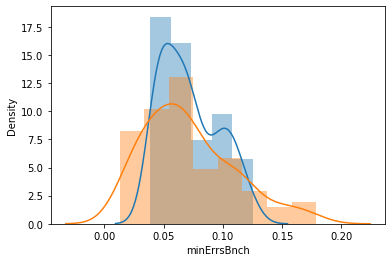

In [1397]:
indx, = onp.where([ty in ["LS-s"] for ty in res_bnch["type"]])
sns.distplot(res_bnch.iloc[indx]["minErrsBnch"])
indx, = onp.where([ty in ["SIM"] for ty in res_bnch["type"]])
sns.distplot(res_bnch.iloc[indx]["minErrsBnch"])

In [1398]:
indx, = onp.where(res_bnch["maxPvalHsicBnch"]>0)
onp.min(res_bnch.iloc[indx]["maxPvalHsicBnch"])

1.1102230246251565e-16

In [1399]:
res_bnch["maxPvalHsicBnch2"]=res_bnch["maxPvalHsicBnch"]
res_bnch["maxPvalHsicBnch2"].loc[res_bnch["maxPvalHsicBnch"]==0] = 0.00000000000000000001

q_rs = [0.2, 0.3, 0.4, 0.6, 0.7, 0.8, 0.9, 0.95, 0.99]
q_rs = [0.0001, 0.001, 0.01, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3]

cnt = 0
for q_r in q_rs:
    cnt = cnt + 1
    res_bnch["maxPvalHsicq"+str(cnt)+"Bnch2"]=res_bnch["maxPvalHsicq"+str(cnt)+"Bnch"]
    res_bnch["maxPvalHsicq"+str(cnt)+"Bnch2"].loc[res_bnch["maxPvalHsicq"+str(cnt)+"Bnch"]==0] = 0.00000000000000000001


res_bnch["maxPvalHsicAdptBnch2"]=res_bnch["maxPvalHsicAdptBnch"]
res_bnch["maxPvalHsicAdptBnch2"].loc[res_bnch["maxPvalHsicAdptBnch"]==0] = 0.00000000000000000001

/home/emiliano/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/home/emiliano/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/home/emiliano/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#re

In [1400]:
res_bnch["log_pval_add"] = onp.log10(res_bnch["maxPvalHsicBnch2"])

In [1401]:
print(onp.unique(res_bnch["type"]))
res_bnch.head()

['AN' 'AN-s' 'LS' 'LS-s' 'MN-U' 'SIM' 'SIMG' 'SIMc' 'SIMln' 'tcep']


variable,type,dataset,difErrsBnch,difHsicBnch,difHsicMaxBnch,difHsicNormBnch,difHsicOptOrdBnch,difHsicRobBnch,difHsicq1Bnch,difHsicq2Bnch,difHsicq3Bnch,difHsicq4Bnch,difHsicq5Bnch,difHsicq6Bnch,difHsicq7Bnch,difHsicq8Bnch,difHsicq9Bnch,difPvalHsicAdptBnch,difPvalHsicBnch,difPvalHsicq1Bnch,difPvalHsicq2Bnch,difPvalHsicq3Bnch,difPvalHsicq4Bnch,difPvalHsicq5Bnch,difPvalHsicq6Bnch,difPvalHsicq7Bnch,difPvalHsicq8Bnch,difPvalHsicq9Bnch,maxPvalHsicAdptBnch,maxPvalHsicBnch,maxPvalHsicq1Bnch,maxPvalHsicq2Bnch,maxPvalHsicq3Bnch,maxPvalHsicq4Bnch,maxPvalHsicq5Bnch,maxPvalHsicq6Bnch,maxPvalHsicq7Bnch,maxPvalHsicq8Bnch,maxPvalHsicq9Bnch,minErrsBnch,minHsicBnch,minHsicMaxBnch,minHsicNormBnch,minHsicOptOrdBnch,minHsicRobBnch,minHsicq1Bnch,minHsicq2Bnch,minHsicq3Bnch,minHsicq4Bnch,minHsicq5Bnch,minHsicq6Bnch,minHsicq7Bnch,minHsicq8Bnch,minHsicq9Bnch,minOrdBnch,maxPvalHsicAdptBnch2,maxPvalHsicBnch2,maxPvalHsicq1Bnch2,maxPvalHsicq2Bnch2,maxPvalHsicq3Bnch2,maxPvalHsicq4Bnch2,maxPvalHsicq5Bnch2,maxPvalHsicq6Bnch2,maxPvalHsicq7Bnch2,maxPvalHsicq8Bnch2,maxPvalHsicq9Bnch2,log_pval_add
0,AN,AN.1,0.049180,0.202395,0.200976,59.205488,0.009755,0.199724,0.146709,0.154070,0.161098,0.167711,0.173953,0.179746,0.185071,0.189686,0.198495,0.273547,0.061487,0.122686,0.117572,0.100897,0.093043,0.088601,0.082919,0.081025,0.080182,0.065779,0.273547,0.061487,0.122686,0.117572,0.100897,0.093043,0.088601,0.082919,0.081025,0.080182,0.065779,0.089228,0.003920,0.005338,1.179911,0.000141,0.004159,0.005338,0.005197,0.005064,0.004942,0.004825,0.004698,0.004576,0.004459,0.004186,15.571429,0.273547,0.061487,0.122686,0.117572,0.100897,0.093043,0.088601,0.082919,0.081025,0.080182,0.065779,-1.211215
1,AN,AN.10,0.043675,0.115602,0.114454,35.748992,0.009450,0.121892,0.105892,0.108346,0.110486,0.112333,0.113842,0.115065,0.115986,0.116610,0.116934,0.603375,0.294210,0.472115,0.408716,0.410131,0.381623,0.376810,0.359905,0.361339,0.351969,0.323893,0.603375,0.294210,0.472115,0.408716,0.410131,0.381623,0.376810,0.359905,0.361339,0.351969,0.323893,0.072293,0.002735,0.003883,0.812502,0.000178,0.004713,0.003883,0.003768,0.003656,0.003548,0.003445,0.003342,0.003244,0.003151,0.002934,13.500000,0.603375,0.294210,0.472115,0.408716,0.410131,0.381623,0.376810,0.359905,0.361339,0.351969,0.323893,-0.531342
2,AN,AN.100,0.065914,0.337579,0.336269,109.040698,0.043712,0.328737,0.325516,0.332486,0.338055,0.342439,0.345675,0.347875,0.348997,0.349186,0.345837,0.995320,0.961851,0.947096,0.967018,0.963947,0.967782,0.961284,0.961959,0.959783,0.963695,0.964004,0.995320,0.961851,0.947096,0.967018,0.963947,0.967782,0.961284,0.961959,0.959783,0.963695,0.964004,0.052876,0.000858,0.002168,0.261302,0.000035,0.001390,0.002168,0.001961,0.001782,0.001632,0.001501,0.001387,0.001285,0.001194,0.001006,13.714286,0.995320,0.961851,0.947096,0.967018,0.963947,0.967782,0.961284,0.961959,0.959783,0.963695,0.964004,-0.016892
3,AN,AN.11,0.050657,0.142609,0.141198,39.130357,0.059952,0.148126,0.105707,0.109845,0.113829,0.117619,0.121148,0.124428,0.127607,0.130628,0.137250,0.875607,0.619656,0.657656,0.612022,0.630842,0.613439,0.615051,0.607290,0.617430,0.619196,0.625097,0.875607,0.619656,0.657656,0.612022,0.630842,0.613439,0.615051,0.607290,0.617430,0.619196,0.625097,0.052448,0.001929,0.003340,0.582580,0.000154,0.001429,0.003340,0.003183,0.003040,0.002906,0.002779,0.002658,0.002543,0.002431,0.002169,18.000000,0.875607,0.619656,0.657656,0.612022,0.630842,0.613439,0.615051,0.607290,0.617430,0.619196,0.625097,-0.207850
4,AN,AN.12,0.047389,0.101357,0.103017,31.796221,0.019236,0.104563,0.101358,0.103149,0.104531,0.105540,0.106203,0.106526,0.106548,0.106279,0.104478,0.783095,0.496735,0.726238,0.680100,0.686004,0.656521,0.640942,0.616350,0.608779,0.590806,0.547238,0.783095,0.496735,0.726238,0.680100,0.686004,0.656521,0.640942,0.616350,0.608779,0.590806,0.547238,0.082197,0.002209,0.003132,0.669170,0.000293,0.000956,0.003132,0.003000,0.002889,0.002792,0.002709,0.002634,0.002565,0.002503,0.002355,17.142857,0.783095,0.496735,0.726238,0.68010

In [1425]:
res_bnch["supertype"] = res_bnch["type"]
indx = [ty in ["SIM","SIMc","SIMG","SIMln"] for ty in res_bnch["type"]]
res_bnch.loc[indx,"supertype"] = "SIM"
indx = [ty in ["AN","AN-s"] for ty in res_bnch["type"]]
res_bnch.loc[indx,"supertype"] = "AN"
indx = [ty in ["LS","LS-s"] for ty in res_bnch["type"]]
res_bnch.loc[indx,"supertype"] = "LS"
indx = [ty in ["tcep"] for ty in res_bnch["type"]]
res_bnch.loc[indx,"supertype"] = "Tub"
indx, = onp.where([ty in ["LS","LS-s","MN-U","AN","AN-s","SIM","SIMc","SIMG","SIMln","tcep"] for ty in res_bnch["type"]])

In [1429]:
file = "/home/emiliano/Documents/ISP/proyectos/causality/latentNoise_krr/results/tables_for_R/dataForDisPlot.csv"
res_bnch.iloc[indx][["supertype","log_pval_add"]].to_csv(file)

['AN' 'LS' 'MN-U' 'SIM' 'Tub']
['AN' 'AN-s' 'LS' 'LS-s' 'MN-U' 'SIM' 'SIMG' 'SIMc' 'SIMln' 'tcep']


/home/emiliano/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


2022-02-25 19:14:19,455:WARNING:The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
2022-02-25 19:14:19,456:WARNING:The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
2022-02-25 19:14:19,457:WARNING:The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
2022-02-25 19:14:19,459:WARNING:The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
2022-02-25 19:14:19,460:WARNING:The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
2022-02-25 19:14:19,461:WARNING:The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
2022-02-25 19:14:19,463:WARNING:The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
2022-02-25 19

2022-02-25 19:14:19,959:WARNING:The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
2022-02-25 19:14:19,996:WARNING:The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
2022-02-25 19:14:19,997:WARNING:The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
2022-02-25 19:14:19,998:WARNING:The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
2022-02-25 19:14:19,999:WARNING:The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
2022-02-25 19:14:20,000:WARNING:The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
2022-02-25 19:14:20,001:WARNING:The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
2022-02-25 19

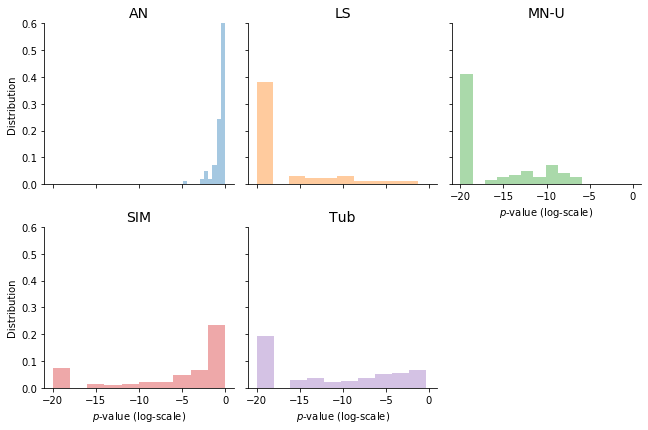

In [1426]:
repos = "/home/emiliano/Documents/ISP/proyectos/causality/latentNoise_krr/results/tables_for_R/"
file = "dist_pval_add.eps" 
print(onp.unique(res_bnch.iloc[indx]["supertype"]))
print(onp.unique(res_bnch.iloc[indx]["type"]))
g= sns.FacetGrid(res_bnch.iloc[indx], hue="supertype", col="supertype",col_wrap=3)
g.map(sns.distplot, "log_pval_add",  kde=False, rug=False, bins=10, hist=True,hist_kws={"density":True})
g.set(xlabel='$p$-value (log-scale)')
g.set(ylabel='Distribution')
g.set(ylim=[0,0.6])
g.set_axis_labels(fontsize=55)
g.set_titles(col_template="{col_name}",size=14)
g.savefig(repos+file, format='eps', dpi=300)

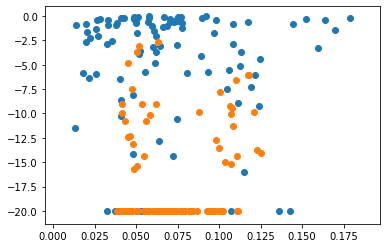

In [1026]:
indx, = onp.where([ty in ["SIM"] for ty in res_bnch["type"]])
plt.scatter(res_bnch.iloc[indx]["minErrsBnch"],onp.log10(res_bnch.iloc[indx]["maxPvalHsicBnch2"]))
indx, = onp.where([ty in ["LS-s"] for ty in res_bnch["type"]])
plt.scatter(res_bnch.iloc[indx]["minErrsBnch"], onp.log10(res_bnch.iloc[indx]["maxPvalHsicBnch2"]))

## pval HSIC (r,x)_0.5-0.5

/home/emiliano/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/emiliano/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/home/emiliano/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/home/emiliano/anaconda3/lib/python3.7/site-packages/matplotlib/

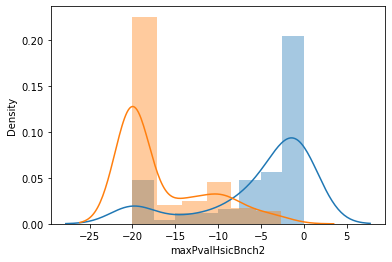

In [1027]:
#sns.distplot(onp.log10(res_bnch["maxPvalHsicBnch2"]))
sns.distplot(onp.log10(res_bnch.loc[res_bnch["type"]=="SIM"]["maxPvalHsicBnch2"]))
sns.distplot(onp.log10(res_bnch.loc[res_bnch["type"]=="LS-s"]["maxPvalHsicBnch2"]))

In [1028]:
sig = 0.001
onp.log10(sig)
pvalThrs1 = sig

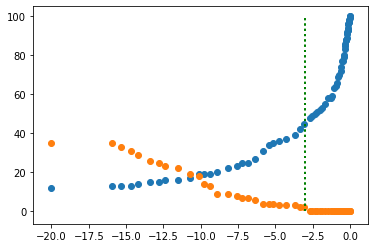

In [1029]:
thrshs = onp.unique(onp.quantile(onp.log10(res_bnch["maxPvalHsicBnch2"]), onp.linspace(0,1,100)))
pctAddSIM = onp.array([onp.sum(onp.log10(res_bnch.loc[res_bnch["type"]=="SIM"]["maxPvalHsicBnch2"])>thr) for thr in thrshs])
pctAddLSs = onp.array([onp.sum(onp.log10(res_bnch.loc[res_bnch["type"]=="LS-s"]["maxPvalHsicBnch2"])>thr) for thr in thrshs])
plt.scatter(thrshs, 100-pctAddSIM)
plt.scatter(thrshs, pctAddLSs)
plt.vlines(x=onp.log10(sig), ymin=0, ymax=100, colors='green', ls=':', lw=2)
plt.vlines(x=onp.log10(pvalThrs1), ymin=0, ymax=100, colors='green', ls=':', lw=2)

In [1030]:
# obtain:  % non additive for 5% additive in LS-s
#          % additive for 15% non-additive in SIM


indx1,  = onp.where(pctAddLSs<5)
print("thrsh LS 5% add:", thrshs[indx1[0]])
print("% non-add SIM: ", 100-pctAddSIM[indx1[0]]) 
# v6 31% non add at this threshold

indx2, = onp.where((100-pctAddSIM)>15)
print("thrsh SIM 15% non-add:", thrshs[indx2[0]])
print("% add LS-s: ", pctAddLSs[indx2[0]]) 
# v6 21% add at this threshold

pvalThrs1 = 10**(thrshs[indx1[0]])

thrsh LS 5% add: -5.861213854469827
% non-add SIM:  31
thrsh SIM 15% non-add: -12.39336909125706
% add LS-s:  23


## pval HSIC(r,x)_q1-0.5

/home/emiliano/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/emiliano/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/home/emiliano/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/home/emiliano/anaconda3/lib/python3.7/site-packages/matplotlib/

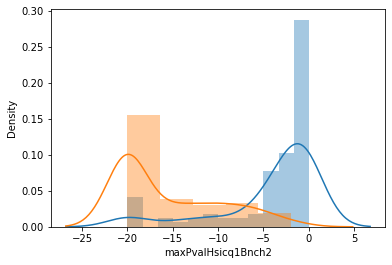

In [1031]:
#sns.distplot(onp.log10(res_bnch["maxPvalHsicBnch2"]))
sns.distplot(onp.log10(res_bnch.loc[res_bnch["type"]=="SIM"]["maxPvalHsicq1Bnch2"]))
sns.distplot(onp.log10(res_bnch.loc[res_bnch["type"]=="LS-s"]["maxPvalHsicq1Bnch2"]))

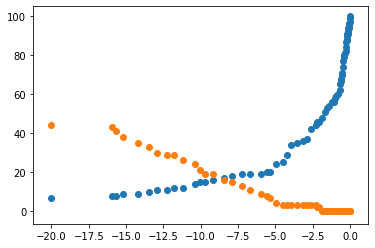

In [1032]:
thrshs = onp.unique(onp.quantile(onp.log10(res_bnch["maxPvalHsicq1Bnch2"]), onp.linspace(0,1,100)))
pctAddSIM = onp.array([onp.sum(onp.log10(res_bnch.loc[res_bnch["type"]=="SIM"]["maxPvalHsicq1Bnch2"])>thr) for thr in thrshs])
pctAddLSs = onp.array([onp.sum(onp.log10(res_bnch.loc[res_bnch["type"]=="LS-s"]["maxPvalHsicq1Bnch2"])>thr) for thr in thrshs])
plt.scatter(thrshs, 100-pctAddSIM)
plt.scatter(thrshs, pctAddLSs)


In [1033]:
# obtain:  % non additive for 5% additive in LS-s
#          % additive for 15% non-additive in SIM


indx1,  = onp.where(pctAddLSs<5)
print("thrsh LS 5% add:", thrshs[indx1[0]])
print("% non-add SIM: ", 100-pctAddSIM[indx1[0]]) 
# v6 31% non add at this threshold

indx2, = onp.where((100-pctAddSIM)>15)
print("thrsh SIM 15% non-add:", thrshs[indx2[0]])
print("% add LS-s: ", pctAddLSs[indx2[0]]) 
# v6 21% add at this threshold

pvalThrs2 = 10**(thrshs[indx1[0]])

thrsh LS 5% add: -4.927230196261078
% non-add SIM:  24
thrsh SIM 15% non-add: -9.15452018823537
% add LS-s:  19


In [1034]:
res_bnch["nonRejAdd"] = (res_bnch["maxPvalHsicq1Bnch2"]>=pvalThrs2)
res_bnch[["type","nonRejAdd"]].groupby("type").apply(nonRejAdd2)

type
AN       1.000000
AN-s     1.000000
LS       0.050000
LS-s     0.040000
MN-U     0.000000
SIM      0.760000
SIMG     0.710000
SIMc     0.630000
SIMln    0.780000
tcep     0.284314
dtype: float64

## pval HSIC(r,x)_qQ-0.5

/home/emiliano/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/emiliano/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/home/emiliano/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/home/emiliano/anaconda3/lib/python3.7/site-packages/matplotlib/

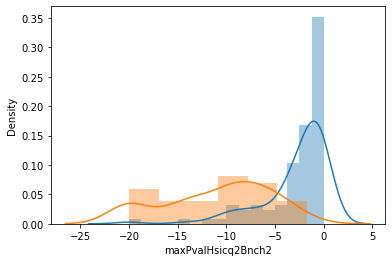

In [1035]:
Q = 2 # 0.05
#sns.distplot(onp.log10(res_bnch["maxPvalHsicBnch2"]))
sns.distplot(onp.log10(res_bnch.loc[res_bnch["type"]=="SIM"]["maxPvalHsicq"+str(Q)+"Bnch2"]))
sns.distplot(onp.log10(res_bnch.loc[res_bnch["type"]=="LS-s"]["maxPvalHsicq"+str(Q)+"Bnch2"]))

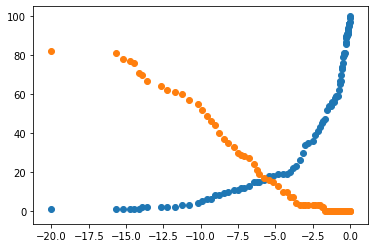

In [1036]:
thrshs = onp.unique(onp.quantile(onp.log10(res_bnch["maxPvalHsicq"+str(Q)+"Bnch2"]), onp.linspace(0,1,100)))
pctAddSIM = onp.array([onp.sum(onp.log10(res_bnch.loc[res_bnch["type"]=="SIM"]["maxPvalHsicq"+str(Q)+"Bnch2"])>thr) for thr in thrshs])
pctAddLSs = onp.array([onp.sum(onp.log10(res_bnch.loc[res_bnch["type"]=="LS-s"]["maxPvalHsicq"+str(Q)+"Bnch2"])>thr) for thr in thrshs])
plt.scatter(thrshs, 100-pctAddSIM)
plt.scatter(thrshs, pctAddLSs)


In [1037]:
# obtain:  % non additive for 5% additive in LS-s
#          % additive for 15% non-additive in SIM


indx1,  = onp.where(pctAddLSs<5)
print("thrsh LS 5% add:", thrshs[indx1[0]])
print("% non-add SIM: ", 100-pctAddSIM[indx1[0]]) 
# v6 31% non add at this threshold

indx2, = onp.where((100-pctAddSIM)>15)
print("thrsh SIM 15% non-add:", thrshs[indx2[0]])
print("% add LS-s: ", pctAddLSs[indx2[0]]) 
# v6 21% add at this threshold

pvalThrs3 = 10**(thrshs[indx1[0]])



thrsh LS 5% add: -3.5955969682751414
% non-add SIM:  23
thrsh SIM 15% non-add: -5.755614249413603
% add LS-s:  17


/home/emiliano/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/emiliano/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/home/emiliano/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/home/emiliano/anaconda3/lib/python3.7/site-packages/matplotlib/

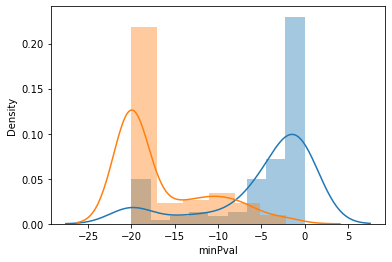

In [1038]:
res_bnch["minPval"] = 10**onp.apply_along_axis(onp.min,1,onp.log10(res_bnch[["maxPvalHsicq1Bnch2", "maxPvalHsicq2Bnch2","maxPvalHsicq3Bnch2","maxPvalHsicq4Bnch2","maxPvalHsicq5Bnch2","maxPvalHsicq6Bnch2","maxPvalHsicq7Bnch2","maxPvalHsicq8Bnch2"]]))
res_bnch["maxPval"] = 10**onp.apply_along_axis(onp.max,1,onp.log10(res_bnch[["maxPvalHsicBnch2","maxPvalHsicq5Bnch2","maxPvalHsicq6Bnch2","maxPvalHsicq7Bnch2","maxPvalHsicq8Bnch2","maxPvalHsicq9Bnch2"]]))
sns.distplot(onp.log10(res_bnch.loc[res_bnch["type"]=="SIM"]["minPval"]))
sns.distplot(onp.log10(res_bnch.loc[res_bnch["type"]=="LS-s"]["minPval"]))

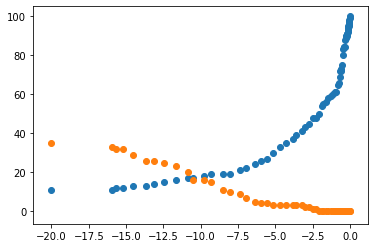

In [1039]:
thrshs = onp.unique(onp.quantile(onp.log10(res_bnch["minPval"]), onp.linspace(0,1,100)))
pctAddSIM = onp.array([onp.sum(onp.log10(res_bnch.loc[res_bnch["type"]=="SIM"]["minPval"])>thr) for thr in thrshs])
pctAddLSs = onp.array([onp.sum(onp.log10(res_bnch.loc[res_bnch["type"]=="LS-s"]["minPval"])>thr) for thr in thrshs])
plt.scatter(thrshs, 100-pctAddSIM)
plt.scatter(thrshs, pctAddLSs)


In [1040]:
# obtain:  % non additive for 5% additive in LS-s
#          % additive for 15% non-additive in SIM


indx1,  = onp.where(pctAddLSs<5)
print("thrsh LS 5% add:", thrshs[indx1[0]])
print("% non-add SIM: ", 100-pctAddSIM[indx1[0]]) 
# v6 31% non add at this threshold

indx2, = onp.where((100-pctAddSIM)>15)
print("thrsh SIM 15% non-add:", thrshs[indx2[0]])
print("% add LS-s: ", pctAddLSs[indx2[0]]) 
# v6 21% add at this threshold

#pvalThrs = 10**(thrshs[indx1[0]])



thrsh LS 5% add: -5.9713031774393155
% non-add SIM:  26
thrsh SIM 15% non-add: -11.624962350338606
% add LS-s:  23


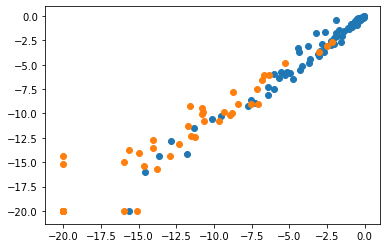

In [1041]:
indx, = onp.where([ty in ["SIM"] for ty in res_bnch["type"]])
plt.scatter(onp.log10(res_bnch.iloc[indx]["minPval"]), onp.log10(res_bnch.iloc[indx]["maxPvalHsicBnch2"]))
indx, = onp.where([ty in ["LS-s"] for ty in res_bnch["type"]])
plt.scatter(onp.log10(res_bnch.iloc[indx]["minPval"]), onp.log10(res_bnch.iloc[indx]["maxPvalHsicBnch2"]))

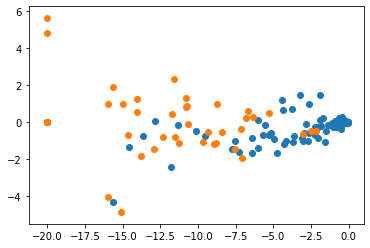

In [1042]:
res_bnch["distToWorst"] = onp.log10(res_bnch["maxPvalHsicBnch2"])-onp.log10(res_bnch["minPval"])
indx, = onp.where([ty in ["SIM"] for ty in res_bnch["type"]])
plt.scatter(onp.log10(res_bnch.iloc[indx]["minPval"]), res_bnch.iloc[indx]["distToWorst"])
indx, = onp.where([ty in ["LS-s"] for ty in res_bnch["type"]])
plt.scatter(onp.log10(res_bnch.iloc[indx]["minPval"]), res_bnch.iloc[indx]["distToWorst"])

/home/emiliano/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/emiliano/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/home/emiliano/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/home/emiliano/anaconda3/lib/python3.7/site-packages/matplotlib/

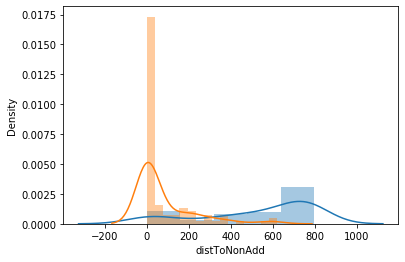

In [1043]:
X = onp.log10(res_bnch[["minPval","maxPvalHsicBnch2"]])
#X["distToWorst"] = res_bnch["distToWorst"] 
X = onp.vstack([onp.array([-20.0,-20.0])[None,:], X])
distsX = covariance_matrix(sqeuclidean_distance, X, X)
distsX.shape
res_bnch["distToNonAdd"] = distsX[0,1:]
indx, = onp.where([ty in ["SIM"] for ty in res_bnch["type"]])
sns.distplot(res_bnch.iloc[indx]["distToNonAdd"])
indx, = onp.where([ty in ["LS-s"] for ty in res_bnch["type"]])
sns.distplot(res_bnch.iloc[indx]["distToNonAdd"])

In [1044]:
onp.min(res_bnch["distToNonAdd"])

0.0

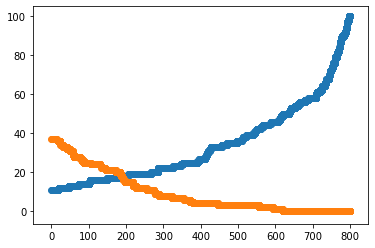

In [1045]:
thrshs = onp.unique(onp.quantile(res_bnch["distToNonAdd"], onp.linspace(0,1,10000)))
#print(thrshs)
pctAddSIM = onp.array([onp.sum(res_bnch.loc[res_bnch["type"]=="SIM"]["distToNonAdd"]>thr) for thr in thrshs])
pctAddLSs = onp.array([onp.sum(res_bnch.loc[res_bnch["type"]=="LS-s"]["distToNonAdd"]>thr) for thr in thrshs])
plt.scatter(thrshs, 100-pctAddSIM)
plt.scatter(thrshs, pctAddLSs)


In [1046]:
# obtain:  % non additive for 5% additive in LS-s
#          % additive for 15% non-additive in SIM


indx1,  = onp.where(pctAddLSs<5)
print("thrsh LS 5% add:", thrshs[indx1[0]])
print("% non-add SIM: ", 100-pctAddSIM[indx1[0]]) 
# v6 31% non add at this threshold

indx2, = onp.where((100-pctAddSIM)>15)
print("thrsh SIM 15% non-add:", thrshs[indx2[0]])
print("% add LS-s: ", pctAddLSs[indx2[0]]) 
# v6 21% add at this threshold

#pvalThrs = 10**(thrshs[indx1[0]])



thrsh LS 5% add: 380.0233417506789
% non-add SIM:  25
thrsh SIM 15% non-add: 102.97329654001172
% add LS-s:  25


In [1047]:
res_bnch["zeroMin"]=onp.log10(res_bnch["minPval"])==-20
def sumZeroMin(x):
    return onp.sum(x.zeroMin)/x.shape[0]
res_bnch[["type","zeroMin"]].groupby("type").apply(sumZeroMin)

type
AN       0.000000
AN-s     0.000000
LS       0.780000
LS-s     0.650000
MN-U     0.610000
SIM      0.110000
SIMG     0.080000
SIMc     0.180000
SIMln    0.150000
tcep     0.441176
dtype: float64

In [1048]:
indx, = onp.where([ty in ["LS-s","SIM"] for ty in res_bnch["type"]])

In [1049]:
res_bnch.iloc[indx][["type","dataset"]].groupby("type").count()

variable,dataset
type,
LS-s,100
SIM,100


## pval HSIC(r,x)_0.5-0.5 adapt

/home/emiliano/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/emiliano/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/home/emiliano/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/home/emiliano/anaconda3/lib/python3.7/site-packages/matplotlib/

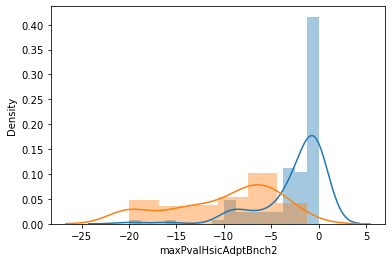

In [1050]:
#sns.distplot(onp.log10(res_bnch["maxPvalHsicBnch2"]))
sns.distplot(onp.log10(res_bnch.loc[res_bnch["type"]=="SIM"]["maxPvalHsicAdptBnch2"]))
sns.distplot(onp.log10(res_bnch.loc[res_bnch["type"]=="LS-s"]["maxPvalHsicAdptBnch2"]))

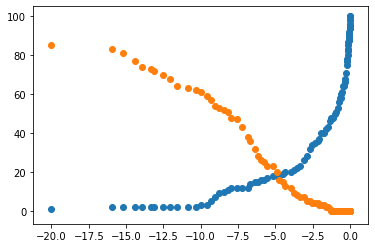

In [1051]:
thrshs = onp.unique(onp.quantile(onp.log10(res_bnch["maxPvalHsicAdptBnch2"]), onp.linspace(0,1,100)))
pctAddSIM = onp.array([onp.sum(onp.log10(res_bnch.loc[res_bnch["type"]=="SIM"]["maxPvalHsicAdptBnch2"])>thr) for thr in thrshs])
pctAddLSs = onp.array([onp.sum(onp.log10(res_bnch.loc[res_bnch["type"]=="LS-s"]["maxPvalHsicAdptBnch2"])>thr) for thr in thrshs])
plt.scatter(thrshs, 100-pctAddSIM)
plt.scatter(thrshs, pctAddLSs)


In [1052]:
# obtain:  % non additive for 5% additive in LS-s
#          % additive for 15% non-additive in SIM


indx1,  = onp.where(pctAddLSs<5)
print("ln-thrsh LS 5% add:", thrshs[indx1[0]])
print("thrsh LS 5% add:", 10**(thrshs[indx1[0]]))
print("% non-add SIM: ", 100-pctAddSIM[indx1[0]]) 
# v6 31% non add at this threshold

indx2, = onp.where((100-pctAddSIM)>15)
print("ln-thrsh SIM 15% non-add:", thrshs[indx2[0]])
print("thrsh SIM 15% non-add:", 10**(thrshs[indx2[0]]))
print("% add LS-s: ", pctAddLSs[indx2[0]]) 
# v6 21% add at this threshold

#pvalThrs = 10**(thrshs[indx2[0]])

ln-thrsh LS 5% add: -2.5455433237790497
thrsh LS 5% add: 0.002847453733452057
% non-add SIM:  34
ln-thrsh SIM 15% non-add: -5.947502596307531
thrsh SIM 15% non-add: 1.128489191152051e-06
% add LS-s:  26


## hsic(r,x)

/home/emiliano/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/emiliano/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/home/emiliano/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/home/emiliano/anaconda3/lib/python3.7/site-packages/matplotlib/

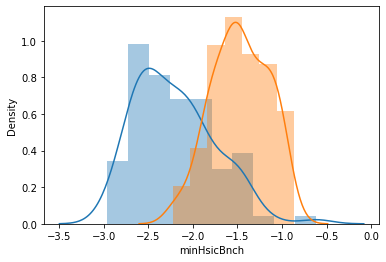

In [1053]:
#sns.distplot(onp.log10(res_bnch["maxPvalHsicBnch2"]))
sns.distplot(onp.log10(res_bnch.loc[res_bnch["type"]=="SIM"]["minHsicBnch"]))
sns.distplot(onp.log10(res_bnch.loc[res_bnch["type"]=="LS-s"]["minHsicBnch"]))

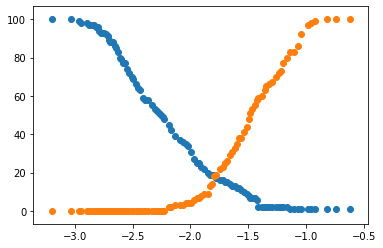

In [1054]:
thrshs = onp.unique(onp.quantile(onp.log10(res_bnch["minHsicBnch"]), onp.linspace(0,1,100)))
pctAddSIM = onp.array([onp.sum(onp.log10(res_bnch.loc[res_bnch["type"]=="SIM"]["minHsicBnch"])<thr) for thr in thrshs])
pctAddLSs = onp.array([onp.sum(onp.log10(res_bnch.loc[res_bnch["type"]=="LS-s"]["minHsicBnch"])<thr) for thr in thrshs])
plt.scatter(thrshs, 100-pctAddSIM)
plt.scatter(thrshs, pctAddLSs)


In [1055]:
# obtain:  % non additive for 5% additive in LS-s
#          % additive for 15% non-additive in SIM


indx1,  = onp.where(pctAddLSs<5)
print("thrsh-ln LS 5% add:", thrshs[indx1[(indx1.shape[0]-1)]])
print("thrsh LS 5% add:", 10**(thrshs[indx1[(indx1.shape[0]-1)]]))
print("% non-add SIM: ", 100-pctAddSIM[indx1[(indx1.shape[0]-1)]]) 
# v6 31% non add at this threshold

indx2, = onp.where((100-pctAddSIM)<15)
print("thrsh-ln SIM 15% non-add:", thrshs[indx2[0]])
print("thrsh SIM 15% non-add:", 10**(thrshs[indx2[0]]))
print("% add LS-s: ", pctAddLSs[indx2[0]]) 
# v6 21% add at this threshold

hsicThrs = 10**(thrshs[indx1[(indx1.shape[0]-1)]])
print(hsicThrs)

thrsh-ln LS 5% add: -1.9966285709030835
thrsh LS 5% add: 0.010077932126070487
% non-add SIM:  31
thrsh-ln SIM 15% non-add: -1.6534916071424217
thrsh SIM 15% non-add: 0.022207946004885484
% add LS-s:  29
0.010077932126070487


## hsic(r,x) q1

/home/emiliano/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/emiliano/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/home/emiliano/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/home/emiliano/anaconda3/lib/python3.7/site-packages/matplotlib/

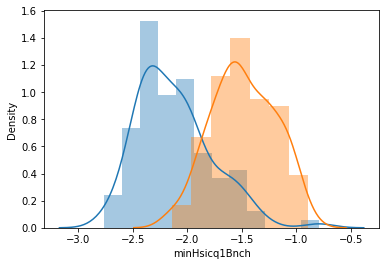

In [1056]:
#sns.distplot(onp.log10(res_bnch["maxPvalHsicBnch2"]))
sns.distplot(onp.log10(res_bnch.loc[res_bnch["type"]=="SIM"]["minHsicq1Bnch"]))
sns.distplot(onp.log10(res_bnch.loc[res_bnch["type"]=="LS-s"]["minHsicq1Bnch"]))

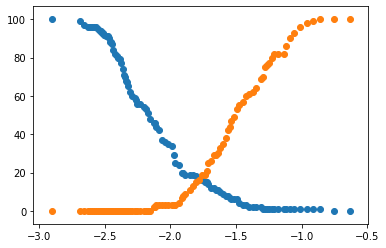

In [1057]:
thrshs = onp.unique(onp.quantile(onp.log10(res_bnch["minHsicq1Bnch"]), onp.linspace(0,1,100)))
pctAddSIM = onp.array([onp.sum(onp.log10(res_bnch.loc[res_bnch["type"]=="SIM"]["minHsicq1Bnch"])<thr) for thr in thrshs])
pctAddLSs = onp.array([onp.sum(onp.log10(res_bnch.loc[res_bnch["type"]=="LS-s"]["minHsicq1Bnch"])<thr) for thr in thrshs])
plt.scatter(thrshs, 100-pctAddSIM)
plt.scatter(thrshs, pctAddLSs)


In [1058]:
# obtain:  % non additive for 5% additive in LS-s
#          % additive for 15% non-additive in SIM


indx,  = onp.where(pctAddLSs<5)
print("thrsh-ln LS 5% add:", thrshs[indx[(indx.shape[0]-1)]])
print("thrsh LS 5% add:", 10**(thrshs[indx[(indx.shape[0]-1)]]))
print("% non-add SIM: ", 100-pctAddSIM[indx[(indx.shape[0]-1)]]) 
# v6 31% non add at this threshold

indx, = onp.where((100-pctAddSIM)<15)
print("thrsh-ln SIM 15% non-add:", thrshs[indx[0]])
print("thrsh SIM 15% non-add:", 10**(thrshs[indx[0]]))
print("% add LS-s: ", pctAddLSs[indx[0]]) 
# v6 21% add at this threshold



thrsh-ln LS 5% add: -1.9366413677470946
thrsh LS 5% add: 0.011570673323320988
% non-add SIM:  24
thrsh-ln SIM 15% non-add: -1.7150729282560948
thrsh SIM 15% non-add: 0.01927201263606552
% add LS-s:  25


## hsic(r,x) qQ

/home/emiliano/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/emiliano/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/home/emiliano/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/home/emiliano/anaconda3/lib/python3.7/site-packages/matplotlib/

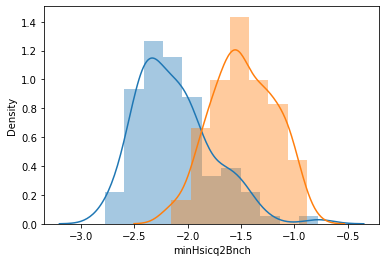

In [1059]:
Q = 2
#sns.distplot(onp.log10(res_bnch["maxPvalHsicBnch2"]))
sns.distplot(onp.log10(res_bnch.loc[res_bnch["type"]=="SIM"]["minHsicq"+str(Q)+"Bnch"]))
sns.distplot(onp.log10(res_bnch.loc[res_bnch["type"]=="LS-s"]["minHsicq"+str(Q)+"Bnch"]))

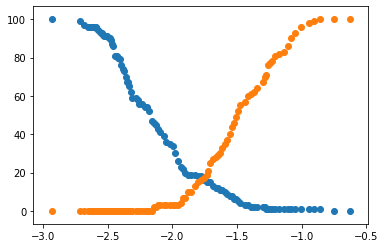

In [1060]:
thrshs = onp.unique(onp.quantile(onp.log10(res_bnch["minHsicq"+str(Q)+"Bnch"]), onp.linspace(0,1,100)))
pctAddSIM = onp.array([onp.sum(onp.log10(res_bnch.loc[res_bnch["type"]=="SIM"]["minHsicq"+str(Q)+"Bnch"])<thr) for thr in thrshs])
pctAddLSs = onp.array([onp.sum(onp.log10(res_bnch.loc[res_bnch["type"]=="LS-s"]["minHsicq"+str(Q)+"Bnch"])<thr) for thr in thrshs])
plt.scatter(thrshs, 100-pctAddSIM)
plt.scatter(thrshs, pctAddLSs)


In [1061]:
# obtain:  % non additive for 5% additive in LS-s
#          % additive for 15% non-additive in SIM


indx,  = onp.where(pctAddLSs<5)
print("thrsh-ln LS 5% add:", thrshs[indx[(indx.shape[0]-1)]])
print("thrsh LS 5% add:", 10**(thrshs[indx[(indx.shape[0]-1)]]))
print("% non-add SIM: ", 100-pctAddSIM[indx[(indx.shape[0]-1)]]) 
# v6 31% non add at this threshold

indx, = onp.where((100-pctAddSIM)<15)
print("thrsh-ln SIM 15% non-add:", thrshs[indx[0]])
print("thrsh SIM 15% non-add:", 10**(thrshs[indx[0]]))
print("% add LS-s: ", pctAddLSs[indx[0]]) 
# v6 21% add at this threshold



thrsh-ln LS 5% add: -1.9371485225954426
thrsh LS 5% add: 0.011557169356884708
% non-add SIM:  23
thrsh-ln SIM 15% non-add: -1.6833668329142408
thrsh SIM 15% non-add: 0.020731616526764172
% add LS-s:  27


## hsic(r,x) max

/home/emiliano/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/emiliano/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/home/emiliano/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/home/emiliano/anaconda3/lib/python3.7/site-packages/matplotlib/

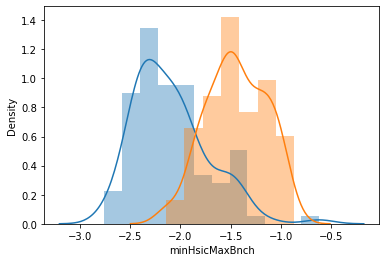

In [1062]:
#sns.distplot(onp.log10(res_bnch["maxPvalHsicBnch2"]))
sns.distplot(onp.log10(res_bnch.loc[res_bnch["type"]=="SIM"]["minHsicMaxBnch"]))
sns.distplot(onp.log10(res_bnch.loc[res_bnch["type"]=="LS-s"]["minHsicMaxBnch"]))

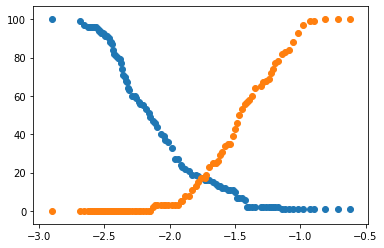

In [1063]:
thrshs = onp.unique(onp.quantile(onp.log10(res_bnch["minHsicMaxBnch"]), onp.linspace(0,1,100)))
pctAddSIM = onp.array([onp.sum(onp.log10(res_bnch.loc[res_bnch["type"]=="SIM"]["minHsicMaxBnch"])<thr) for thr in thrshs])
pctAddLSs = onp.array([onp.sum(onp.log10(res_bnch.loc[res_bnch["type"]=="LS-s"]["minHsicMaxBnch"])<thr) for thr in thrshs])
plt.scatter(thrshs, 100-pctAddSIM)
plt.scatter(thrshs, pctAddLSs)


In [1064]:
# obtain:  % non additive for 5% additive in LS-s
#          % additive for 15% non-additive in SIM


indx,  = onp.where(pctAddLSs<5)
print("thrsh-ln LS 5% add:", thrshs[indx[(indx.shape[0]-1)]])
print("thrsh LS 5% add:", 10**(thrshs[indx[(indx.shape[0]-1)]]))
print("% non-add SIM: ", 100-pctAddSIM[indx[(indx.shape[0]-1)]]) 
# v6 31% non add at this threshold

indx, = onp.where((100-pctAddSIM)<15)
print("thrsh-ln SIM 15% non-add:", thrshs[indx[0]])
print("thrsh SIM 15% non-add:", 10**(thrshs[indx[0]]))
print("% add LS-s: ", pctAddLSs[indx[0]]) 
# v6 21% add at this threshold



thrsh-ln LS 5% add: -1.9353984205523318
thrsh LS 5% add: 0.011603835927039702
% non-add SIM:  27
thrsh-ln SIM 15% non-add: -1.6485791088704558
thrsh SIM 15% non-add: 0.022460576083149036
% add LS-s:  25


## hsic(r,x) robust

/home/emiliano/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/emiliano/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/home/emiliano/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/home/emiliano/anaconda3/lib/python3.7/site-packages/matplotlib/

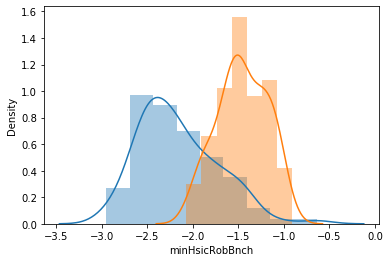

In [1065]:
#sns.distplot(onp.log10(res_bnch["maxPvalHsicBnch2"]))
sns.distplot(onp.log10(res_bnch.loc[res_bnch["type"]=="SIM"]["minHsicRobBnch"]))
sns.distplot(onp.log10(res_bnch.loc[res_bnch["type"]=="LS-s"]["minHsicRobBnch"]))

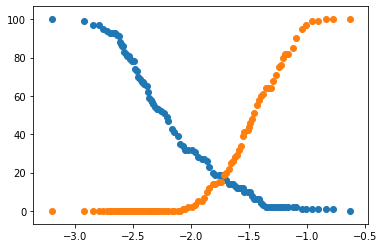

In [1066]:
thrshs = onp.unique(onp.quantile(onp.log10(res_bnch["minHsicRobBnch"]), onp.linspace(0,1,100)))
pctAddSIM = onp.array([onp.sum(onp.log10(res_bnch.loc[res_bnch["type"]=="SIM"]["minHsicRobBnch"])<thr) for thr in thrshs])
pctAddLSs = onp.array([onp.sum(onp.log10(res_bnch.loc[res_bnch["type"]=="LS-s"]["minHsicRobBnch"])<thr) for thr in thrshs])
plt.scatter(thrshs, 100-pctAddSIM)
plt.scatter(thrshs, pctAddLSs)


In [1067]:
# obtain:  % non additive for 5% additive in LS-s
#          % additive for 15% non-additive in SIM


indx,  = onp.where(pctAddLSs<5)
print("thrsh-ln LS 5% add:", thrshs[indx[(indx.shape[0]-1)]])
print("thrsh LS 5% add:", 10**(thrshs[indx[(indx.shape[0]-1)]]))
print("% non-add SIM: ", 100-pctAddSIM[indx[(indx.shape[0]-1)]]) 
# v6 31% non add at this threshold

indx, = onp.where((100-pctAddSIM)<15)
print("thrsh-ln SIM 15% non-add:", thrshs[indx[0]])
print("thrsh SIM 15% non-add:", 10**(thrshs[indx[0]]))
print("% add LS-s: ", pctAddLSs[indx[0]]) 
# v6 21% add at this threshold



thrsh-ln LS 5% add: -1.9629041657248218
thrsh LS 5% add: 0.010891704103198145
% non-add SIM:  31
thrsh-ln SIM 15% non-add: -1.6729435753965356
thrsh SIM 15% non-add: 0.021235203370451955
% add LS-s:  22


## hsic(r,x) ord

/home/emiliano/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/emiliano/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/home/emiliano/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/home/emiliano/anaconda3/lib/python3.7/site-packages/matplotlib/

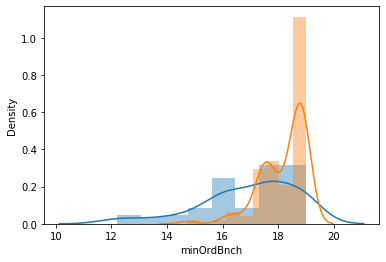

In [1068]:
#sns.distplot(onp.log10(res_bnch["maxPvalHsicBnch2"]))
sns.distplot(res_bnch.loc[res_bnch["type"]=="SIM"]["minOrdBnch"])
sns.distplot(res_bnch.loc[res_bnch["type"]=="LS-s"]["minOrdBnch"])

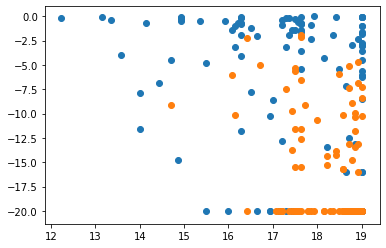

In [1069]:
SIMtype = "SIMc"
plt.scatter(res_bnch.loc[res_bnch["type"]==SIMtype]["minOrdBnch"], onp.log10(res_bnch.loc[res_bnch["type"]==SIMtype]["maxPvalHsicq1Bnch2"]))
plt.scatter(res_bnch.loc[res_bnch["type"]=="LS-s"]["minOrdBnch"],onp.log10(res_bnch.loc[res_bnch["type"]=="LS-s"]["maxPvalHsicq1Bnch2"]))

In [1070]:
print("SIM", onp.sum(res_bnch.loc[res_bnch["type"]=="SIM"]["minOrdBnch"]<18))
print("LS-s", onp.sum(res_bnch.loc[res_bnch["type"]=="LS-s"]["minOrdBnch"]<18))

SIM 72
LS-s 36


In [1071]:
ordThrs = 17

print(onp.sum((res_bnch.loc[res_bnch["type"]==SIMtype]["maxPvalHsicq1Bnch2"]<pvalThrs2)))
print(onp.sum((res_bnch.loc[res_bnch["type"]==SIMtype]["maxPvalHsicq1Bnch2"]<pvalThrs2) & (res_bnch.loc[res_bnch["type"]==SIMtype]["minOrdBnch"]>ordThrs)))


print(onp.sum((res_bnch.loc[res_bnch["type"]=="LS-s"]["maxPvalHsicq1Bnch2"]<pvalThrs2)))
print(onp.sum((res_bnch.loc[res_bnch["type"]=="LS-s"]["maxPvalHsicq1Bnch2"]<pvalThrs2) & (res_bnch.loc[res_bnch["type"]=="LS-s"]["minOrdBnch"]>ordThrs)))


37
24
96
91


In [1072]:
onp.log10(pvalThrs2)

-4.927230196261078

/home/emiliano/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/emiliano/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/home/emiliano/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/home/emiliano/anaconda3/lib/python3.7/site-packages/matplotlib/

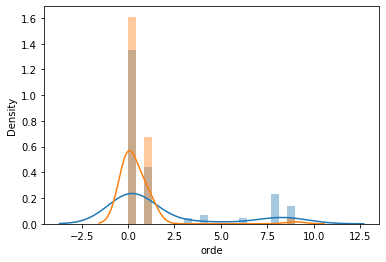

In [1073]:
res_bnch["orde"] = onp.apply_along_axis(onp.argmin, 1, res_bnch[["maxPvalHsicBnch2", "maxPvalHsicq9Bnch2", "maxPvalHsicq8Bnch2", "maxPvalHsicq7Bnch2", "maxPvalHsicq6Bnch2", "maxPvalHsicq5Bnch2", "maxPvalHsicq4Bnch2","maxPvalHsicq3Bnch2","maxPvalHsicq2Bnch2", "maxPvalHsicq1Bnch2"]])
#res_bnch["orde"] = onp.apply_along_axis(onp.argmax, 1, res_bnch[["minHsicBnch","minHsicq2Bnch","minHsicq1Bnch"]])
sns.distplot(res_bnch.loc[res_bnch["type"]=="SIM"]["orde"])
sns.distplot(res_bnch.loc[res_bnch["type"]=="LS-s"]["orde"])

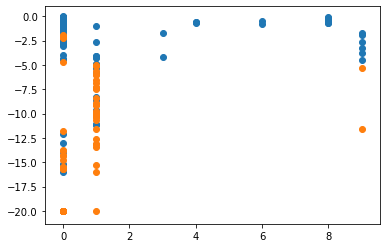

In [1074]:
plt.scatter(res_bnch.loc[res_bnch["type"]=="SIM"]["orde"], onp.log10(res_bnch.loc[res_bnch["type"]=="SIM"]["maxPvalHsicq1Bnch2"]))
plt.scatter(res_bnch.loc[res_bnch["type"]=="LS-s"]["orde"],onp.log10(res_bnch.loc[res_bnch["type"]=="LS-s"]["maxPvalHsicq1Bnch2"]))

In [1075]:
print("SIM", onp.sum(res_bnch.loc[res_bnch["type"]=="SIM"]["orde"]>1))
print("LS-s", onp.sum(res_bnch.loc[res_bnch["type"]=="LS-s"]["orde"]>1))

SIM 23
LS-s 2


In [1076]:
print(pvalThrs1)
print(onp.log10(pvalThrs1))
pvalThrs2 = pvalThrs1#10**-5
print(pvalThrs2)

1.3765314729467299e-06
-5.861213854469827
1.3765314729467299e-06


In [1077]:
print(onp.sum((res_bnch.loc[res_bnch["type"]=="SIM"]["maxPvalHsicq1Bnch2"]<pvalThrs2)))
print(onp.sum((res_bnch.loc[res_bnch["type"]=="SIM"]["maxPvalHsicq1Bnch2"]<pvalThrs2) & (res_bnch.loc[res_bnch["type"]=="SIM"]["orde"]<2)))


print(onp.sum((res_bnch.loc[res_bnch["type"]=="LS-s"]["maxPvalHsicq1Bnch2"]<pvalThrs2)))
print(onp.sum((res_bnch.loc[res_bnch["type"]=="LS-s"]["maxPvalHsicq1Bnch2"]<pvalThrs2) & (res_bnch.loc[res_bnch["type"]=="LS-s"]["orde"]<2)))


19
19
92
91


## hsic(r,x) ordOpt

/home/emiliano/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/emiliano/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/home/emiliano/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/home/emiliano/anaconda3/lib/python3.7/site-packages/matplotlib/

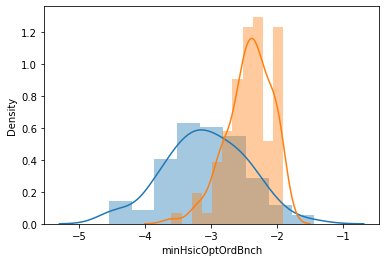

In [1078]:
#sns.distplot(onp.log10(res_bnch["maxPvalHsicBnch2"]))
sns.distplot(onp.log10(res_bnch.loc[res_bnch["type"]=="SIM"]["minHsicOptOrdBnch"]))
sns.distplot(onp.log10(res_bnch.loc[res_bnch["type"]=="LS-s"]["minHsicOptOrdBnch"]))

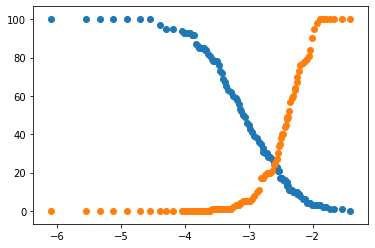

In [1079]:
thrshs = onp.unique(onp.quantile(onp.log10(res_bnch["minHsicOptOrdBnch"]), onp.linspace(0,1,100)))
pctAddSIM = onp.array([onp.sum(onp.log10(res_bnch.loc[res_bnch["type"]=="SIM"]["minHsicOptOrdBnch"])<thr) for thr in thrshs])
pctAddLSs = onp.array([onp.sum(onp.log10(res_bnch.loc[res_bnch["type"]=="LS-s"]["minHsicOptOrdBnch"])<thr) for thr in thrshs])
plt.scatter(thrshs, 100-pctAddSIM)
plt.scatter(thrshs, pctAddLSs)


In [1080]:
# obtain:  % non additive for 5% additive in LS-s
#          % additive for 15% non-additive in SIM


indx,  = onp.where(pctAddLSs<5)
print("thrsh-ln LS 5% add:", thrshs[indx[(indx.shape[0]-1)]])
print("thrsh LS 5% add:", 10**(thrshs[indx[(indx.shape[0]-1)]]))
print("% non-add SIM: ", 100-pctAddSIM[indx[(indx.shape[0]-1)]]) 
# v6 31% non add at this threshold

indx, = onp.where((100-pctAddSIM)<15)
print("thrsh-ln SIM 15% non-add:", thrshs[indx[0]])
print("thrsh SIM 15% non-add:", 10**(thrshs[indx[0]]))
print("% add LS-s: ", pctAddLSs[indx[0]]) 
# v6 21% add at this threshold



thrsh-ln LS 5% add: -3.1167921338399736
thrsh LS 5% add: 0.0007642014654393102
% non-add SIM:  52
thrsh-ln SIM 15% non-add: -2.39845819490745
thrsh SIM 15% non-add: 0.003995230174562962
% add LS-s:  49


## hsic(r,x)_null_normed

/home/emiliano/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/emiliano/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/home/emiliano/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/home/emiliano/anaconda3/lib/python3.7/site-packages/matplotlib/

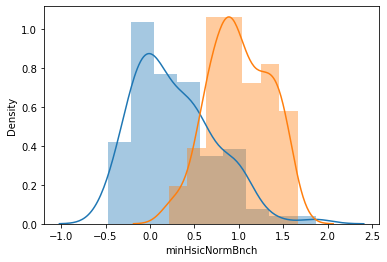

In [1081]:
#sns.distplot(onp.log10(res_bnch["maxPvalHsicBnch2"]))
sns.distplot(onp.log10(res_bnch.loc[res_bnch["type"]=="SIM"]["minHsicNormBnch"]))
sns.distplot(onp.log10(res_bnch.loc[res_bnch["type"]=="LS-s"]["minHsicNormBnch"]))

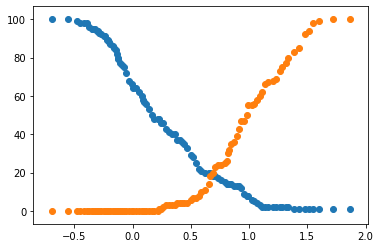

In [1082]:
thrshs = onp.unique(onp.quantile(onp.log10(res_bnch["minHsicNormBnch"]), onp.linspace(0,1,100)))
pctAddSIM = onp.array([onp.sum(onp.log10(res_bnch.loc[res_bnch["type"]=="SIM"]["minHsicNormBnch"])<thr) for thr in thrshs])
pctAddLSs = onp.array([onp.sum(onp.log10(res_bnch.loc[res_bnch["type"]=="LS-s"]["minHsicNormBnch"])<thr) for thr in thrshs])
plt.scatter(thrshs, 100-pctAddSIM)
plt.scatter(thrshs, pctAddLSs)


In [1083]:
# obtain:  % non additive for 5% additive in LS-s
#          % additive for 15% non-additive in SIM


indx,  = onp.where(pctAddLSs<5)
print("thrsh LS 5% add:", thrshs[indx[(indx.shape[0]-1)]])
print("% non-add SIM: ", 100-pctAddSIM[indx[(indx.shape[0]-1)]]) 
# v6 31% non add at this threshold

indx, = onp.where((100-pctAddSIM)<15)
print("thrsh SIM 15% non-add:", thrshs[indx[0]])
print("% add LS-s: ", pctAddLSs[indx[0]]) 
# v6 21% add at this threshold



thrsh LS 5% add: 0.4694850795589924
% non-add SIM:  33
thrsh SIM 15% non-add: 0.8065022866263862
% add LS-s:  26


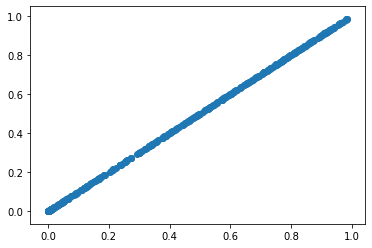

In [1084]:
plt.scatter(res_bnch["maxPvalHsicBnch"], res_bnch["difPvalHsicBnch"])

In [1085]:
indx, = onp.where([ty in ["LS-s","SIM"] for ty in res_bnch["type"]])

In [1086]:
dfPlt = onp.log10(res_bnch[["maxPvalHsicq9Bnch2", "maxPvalHsicq8Bnch2", "maxPvalHsicq7Bnch2", "maxPvalHsicq6Bnch2", "maxPvalHsicq5Bnch2", "maxPvalHsicq4Bnch2", "maxPvalHsicBnch2","maxPvalHsicq3Bnch2","maxPvalHsicq2Bnch2", "maxPvalHsicq1Bnch2"]])
dfPlt["type"] = res_bnch["type"]
#sns.pairplot(dfPlt.iloc[indx], hue="type")

In [1087]:
res_bnch["obs"]=[int(ds.split(".")[(len(ds.split("."))-1)]) for ds in res_bnch.dataset]
res_bnch["obs"]

0         1
1        10
2       100
3        11
4        12
       ... 
997      95
998      96
999      97
1000     98
1001     99
Name: obs, Length: 1002, dtype: int64

In [1088]:
onp.random.seed(8)
obs1  = onp.random.choice(100, 50)
obs2 =  onp.array(list(set(onp.linspace(1,100,100, dtype=int)).difference(obs1)))

In [1089]:
print(obs1)
print(obs2)

[67 84  5 90  8 83 63 48 85 60 49 74 27 13  9 61 15 93 98 59 18 14 93 56
  9 51 68 53 53 71 59 42 26 66  9 81 15 92 91 63 86 31 20 45 21 72 92 28
 95 47]
[  1   2   3   4   6   7  10  11  12  16  17  19  22  23  24  25  29  30
  32  33  34  35  36  37  38  39  40  41  43  44  46  50  52  54  55  57
  58  62  64  65  69  70  73  75  76  77  78  79  80  82  87  88  89  94
  96  97  99 100]


In [1090]:
res_bnch["train1"] = [ (ty in ["LS-s","SIM","SIMc","SIMG","SIMln"]) & (obs in obs1) for ty,obs in zip(res_bnch["type"],res_bnch["obs"])]
res_bnch["train2"] = [ (ty in ["LS-s","SIM","SIMc","SIMG","SIMln"]) & (obs in obs2) for ty,obs in zip(res_bnch["type"],res_bnch["obs"])]
indx_tr1, = onp.where(res_bnch["train1"])
indx_tr2, = onp.where(res_bnch["train2"])

#res_bnch.iloc[indx_tr].groupby("type").count()

In [1091]:
#train a model with LS-s (50) /AN (50) /AN-s (50) and use it to classify MN-U/SIM-x/L-s(50)/AN(50/AN-s (50)

from sklearn.ensemble import RandomForestClassifier
#"maxPvalHsicAdptBnch2","minHsicMaxBnch","minHsicNormBnch","minHsicRobBnch","minHsicOptOrdBnch",
X = onp.log10(res_bnch[["maxPvalHsicAdptBnch2","minHsicMaxBnch","minHsicNormBnch","minHsicRobBnch","minHsicOptOrdBnch","minPval","maxPvalHsicq9Bnch2", "maxPvalHsicq8Bnch2", "maxPvalHsicq7Bnch2", "maxPvalHsicq6Bnch2", "maxPvalHsicq5Bnch2", "maxPvalHsicq4Bnch2", "maxPvalHsicBnch2","maxPvalHsicq3Bnch2","maxPvalHsicq2Bnch2", "maxPvalHsicq1Bnch2"]])
X["distToWorst"] = res_bnch["distToWorst"]
X["distToNonAdd"] = res_bnch["distToNonAdd"]
X["minOrdBnch"] = res_bnch["minOrdBnch"]

#X = onp.log10(res_bnch[["minHsicq9Bnch", "minHsicq8Bnch", "minHsicq7Bnch", "minHsicq6Bnch", "minHsicq5Bnch", "minHsicq4Bnch","minHsicq3Bnch","minHsicq2Bnch", "minHsicq1Bnch"]])
#X = onp.log10(res_bnch[["maxPvalHsicBnch2","minPval"]])

#X["orde"] = res_bnch["orde"]
y = pd.Series(1*onp.array([ty in ["LS-s","LS","MN-U"] for ty in res_bnch["type"]]))
clf1 = RandomForestClassifier(max_depth=2, random_state=0, n_estimators=500, class_weight= {0:1,1:5})
clf1.fit(X.iloc[indx_tr1], y.iloc[indx_tr1])
clf2 = RandomForestClassifier(max_depth=2, random_state=0,n_estimators=500, class_weight= {0:1,1:5})
clf2.fit(X.iloc[indx_tr2], y.iloc[indx_tr2])
res_bnch["nonAdd_pr1"] = pd.Series(clf1.predict(X))
res_bnch["nonAdd_pr2"] = pd.Series(clf2.predict(X))

res_bnch["nonAdd_pr"] = res_bnch["nonAdd_pr1"]
res_bnch["nonAdd_pr"].iloc[indx_tr1] = res_bnch["nonAdd_pr2"].iloc[indx_tr1]

/home/emiliano/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [1092]:
onp.unique(y)

array([0, 1])

In [1093]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y.iloc[indx_tr1], res_bnch["nonAdd_pr1"].iloc[indx_tr1])

array([[117,  51],
       [  2,  40]])

In [1094]:
def addNonAddPr(x):
    return onp.sum(x.nonAdd_pr1)/x.shape[0]
tab = res_bnch[["type","nonAdd_pr1","train1"]].groupby(["type","train1"]).apply(addNonAddPr)
tab = tab.reset_index()
pd.pivot_table(tab, index="type", columns="train1", values=0)

train1,False,True
type,,
AN,0.000000,NaN
AN-s,0.000000,NaN
LS,0.940000,NaN
LS-s,0.948276,0.952381
MN-U,0.980000,NaN
SIM,0.189655,0.261905
SIMG,0.241379,0.309524
SIMc,0.310345,0.357143
SIMln,0.103448,0.285714


In [1095]:
def addNonAddPr(x):
    return onp.sum(x.nonAdd_pr2)/x.shape[0]
tab = res_bnch[["type","nonAdd_pr2","train2"]].groupby(["type","train2"]).apply(addNonAddPr)
tab = tab.reset_index()
pd.pivot_table(tab, index="type", columns="train2", values=0)

train2,False,True
type,,
AN,0.000000,NaN
AN-s,0.000000,NaN
LS,0.950000,NaN
LS-s,0.928571,0.965517
MN-U,0.990000,NaN
SIM,0.261905,0.172414
SIMG,0.333333,0.224138
SIMc,0.404762,0.327586
SIMln,0.261905,0.103448


In [1096]:
def addNonAddPr(x):
    return onp.sum(x.nonAdd_pr)/x.shape[0]
tab = res_bnch[["type","nonAdd_pr"]].groupby(["type"]).apply(addNonAddPr)
tab = tab.reset_index()
tab

,type,0
0,AN,0.000000
1,AN-s,0.000000
2,LS,0.940000
3,LS-s,0.940000
4,MN-U,0.980000
5,SIM,0.220000
6,SIMG,0.280000
7,SIMc,0.350000
8,SIMln,0.170000
9,tcep,0.617647


In [1097]:
repos = "/home/emiliano/Documents/ISP/proyectos/causality/latentNoise_krr/results/"

# comp hsic(r_LN, c)
filename= "df_comp_hsic_v3-5_optType_vs_v2_bnch.pkl"

# comp hsic(r_LN, x)
filename= "df_comp_hsic_v3-5_optType_vhsicx_vs_v2_bnch.pkl"

filename= "df_comp_hsic_v3-5_optType_vhsicx_vs_v3_real_bnch.pkl"


filename= "df_comp_hsic_v3-5_optType_vs_v6_bnch.pkl"
filenamex= "df_comp_hsic_v3-5_optType_vhsicx_vs_v6_bnch.pkl"

filename= "df_comp_hsic_v3-5_optType_vboth_vs_v6_bnch.pkl"
filename= "df_comp_hsic_v3-5_optType_vboth_vs_v14_bnch.pkl"


res_compHsic = pickle5.load( open( repos+filename, "rb" ) ) 
#res_compHsicx = pickle5.load( open( repos+filenamex, "rb" ) ) 
repos = "/home/emiliano/Documents/ISP/proyectos/causality/latentNoise_krr/data/"
res_compHsic = addWeights(repos, res_compHsic)
#res_compHsicx = addWeights(repos, res_compHsicx)

/home/emiliano/Documents/ISP/proyectos/causality/latentNoise_krr/src/processResults.py:1764: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aux["type"] = grpNm
/home/emiliano/Documents/ISP/proyectos/causality/latentNoise_krr/src/processResults.py:1701: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dec_long_tcep["type"] = "tcep_w"


In [1098]:
onp.sum(res_compHsic["ANM"]==0)

0

/home/emiliano/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/emiliano/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/home/emiliano/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/home/emiliano/anaconda3/lib/python3.7/site-packages/matplotlib/

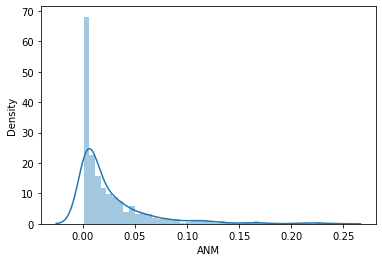

In [1099]:
sns.distplot(res_compHsic["ANM"])

/home/emiliano/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/emiliano/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/home/emiliano/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/home/emiliano/anaconda3/lib/python3.7/site-packages/matplotlib/

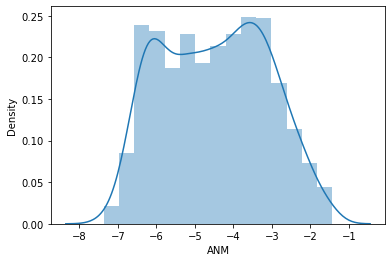

In [1100]:
sns.distplot(onp.log(res_compHsic["ANM"]))

/home/emiliano/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/emiliano/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/home/emiliano/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/home/emiliano/anaconda3/lib/python3.7/site-packages/matplotlib/

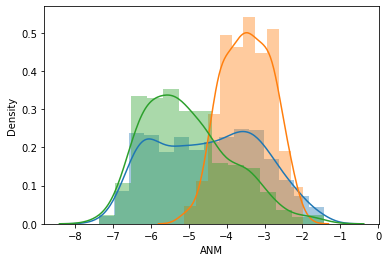

In [1101]:
sns.distplot(onp.log(res_compHsic["ANM"]))
sns.distplot(onp.log(res_compHsic.loc[(res_compHsic["type"]=="LS-s")|(res_compHsic["type"]=="MN-U")]["ANM"]))
sns.distplot(onp.log(res_compHsic.loc[(res_compHsic["type"]=="SIM")|(res_compHsic["type"]=="SIMc")|(res_compHsic["type"]=="SIMG")|(res_compHsic["type"]=="SIMln")]["ANM"]))

/home/emiliano/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/emiliano/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/home/emiliano/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/home/emiliano/anaconda3/lib/python3.7/site-packages/matplotlib/

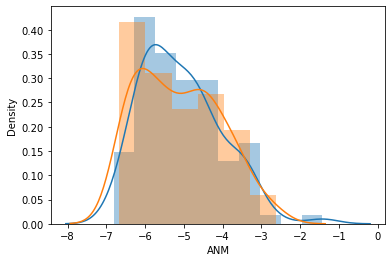

In [1102]:
#sns.distplot(onp.log(res_compHsic["ANM"]))
sns.distplot(onp.log(res_compHsic.loc[(res_compHsic["type"]=="SIM")]["ANM"]))
sns.distplot(onp.log(res_compHsic.loc[(res_compHsic["type"]=="SIMG")]["ANM"]))

In [1103]:
repos = "/home/emiliano/Documents/ISP/proyectos/causality/latentNoise_krr/data/"
dec_add_bnch = addWeights(repos, dec_add_bnch)
res_bnch = addWeights(repos, res_bnch)

/home/emiliano/Documents/ISP/proyectos/causality/latentNoise_krr/src/processResults.py:1764: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aux["type"] = grpNm
/home/emiliano/Documents/ISP/proyectos/causality/latentNoise_krr/src/processResults.py:1701: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dec_long_tcep["type"] = "tcep_w"


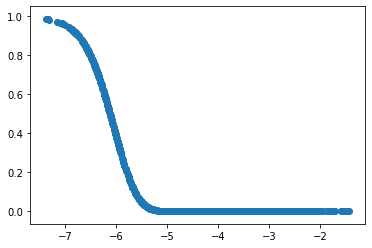

In [1104]:
tst = res_bnch.merge(res_compHsic, how="left", on=["type","dataset"])
plt.scatter(onp.log(tst["ANM"]), tst["maxPvalHsicBnch"])

In [1105]:
dec_combo = dec_add_bnch.merge(res_bnch, how="left", on=["type","dataset"])
dec_combo["smpl_wts"] = dec_combo["smpl_wts_x"]

sig = 0.001
dec_combo["nonRejAdd"] = dec_combo["maxPvalHsicBnch"]>sig
#dec_combo["nonRejAdd"] = dec_combo["maxPvalHsicq2Bnch2"]>pvalThrs3


/home/emiliano/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/emiliano/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/home/emiliano/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/home/emiliano/anaconda3/lib/python3.7/site-packages/matplotlib/

0.0

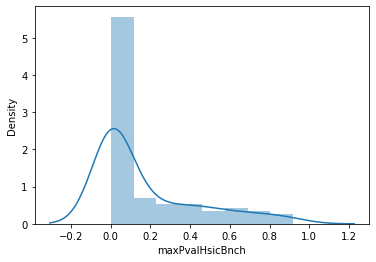

In [1106]:
#sns.distplot(res_bnch.loc[res_bnch["type"]=="LS-s"]["maxPvalHsicBnch"])
sns.distplot(res_bnch.loc[res_bnch["type"]=="SIM"]["maxPvalHsicBnch"])
onp.min(res_bnch.loc[res_bnch["type"]=="SIM"]["maxPvalHsicBnch"])

In [1107]:
dec_combo[["type","nonRejAdd"]].groupby("type").apply(nonRejAdd2)

type
AN              0.990000
AN-s            1.000000
LS              0.030000
LS-s            0.010000
MN-U            0.000000
SIM             0.550000
SIMG            0.550000
SIMc            0.480000
SIMln           0.650000
tcep            0.156863
tcep_Disc       0.234043
tcep_GEO        0.100000
tcep_NONGEO     0.180556
tcep_NonDisc    0.090909
tcep_w          0.156863
dtype: float64

In [1108]:
dec_combo = addAdd(dec_combo)

/home/emiliano/Documents/ISP/proyectos/causality/latentNoise_krr/src/processResults.py:1764: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aux["type"] = grpNm


dtsAdd:  16
dtsNonAdd:  86
dtsAdd:  426
dtsNonAdd:  474


In [1109]:
dec_all = dec_combo.loc[[v in ["ent","hsic"] for v in dec_combo["variable"]]][["type","value","smpl_wts","variable","nonRejAdd"]]
dec_all["model-add"] = "ANM"
dec_all["model-nonAdd"] = "none"
dec_all["comb-crit"] = "none"

In [1110]:
onp.unique(dec_combo["type"])

array(['AN', 'AN-s', 'LS', 'LS-s', 'MN-U', 'SIM', 'SIMG', 'SIMc', 'SIMln',
       'add', 'all', 'nonAdd', 'tcep', 'tcep_Add', 'tcep_Disc',
       'tcep_GEO', 'tcep_NONGEO', 'tcep_NonAdd', 'tcep_NonDisc', 'tcep_w'],
      dtype=object)

In [1111]:
getPerfTab(dec_combo, bal_acc, "value")

variable,ent,ent2,errs,hsic,hsic2,slope
type,,,,,,
SIM,0.815747,0.836039,0.631494,0.793019,0.784091,0.642857
SIMc,0.853896,0.831169,0.691558,0.819805,0.819805,0.668831
SIMln,0.883117,0.836039,0.810877,0.842532,0.836039,0.788149
SIMG,0.786526,0.780032,0.687500,0.759740,0.759740,0.635552
AN,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
AN-s,0.988636,0.988636,0.500000,1.000000,1.000000,0.477273
LS,0.956981,0.898539,0.853896,0.551948,0.551948,0.771104
LS-s,0.085227,0.067370,0.072240,0.049513,0.020292,0.049513
MN-U,0.101461,0.196429,0.058442,0.029221,0.000000,0.121753


In [1112]:
#getPerfTab(dec_add_bnch, f1, "value")

In [1113]:
#getPerfTab(dec_add_bnch, roc, "value")

In [1114]:
#getPerfTab(dec_add_bnch, proc, "value")

In [1115]:
dec_add_bnch["conf_signed"] = dec_add_bnch["conf"]*onp.sign(dec_add_bnch["value"])

In [1116]:
#getPerfTab(dec_add_bnch, roc, "conf_signed")

## Additive decision

In [1117]:
repos = "/home/emiliano/Documents/ISP/proyectos/causality/latentNoise_krr/results/post/decisionsConf_v1/"
#file = "310_smpl_decision_initStrat:freeZ*NN:varsss_['hsic', 'hsicc', 'errs']-numPts_10*lowestHsic:var_hsic-sig_10.pkl"
file = "19_smpl_decision_initStrat:freeZ-iniMani_freeZ_freeZ-iniR*rand:m_10000*uniform:.pkl"

In [1118]:
dec_add = pickle5.load( open( repos+file, "rb" ) )
dec_add = pd.DataFrame(dec_add)

In [1119]:
repos = "/home/emiliano/Documents/ISP/proyectos/causality/latentNoise_krr/data/"
dec_add = addWeights(repos, dec_add)

/home/emiliano/Documents/ISP/proyectos/causality/latentNoise_krr/src/processResults.py:1764: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aux["type"] = grpNm
/home/emiliano/Documents/ISP/proyectos/causality/latentNoise_krr/src/processResults.py:1701: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dec_long_tcep["type"] = "tcep_w"


In [1120]:
dec_combo = dec_add.merge(res_bnch, how="left", on=["type","dataset"])
dec_combo["smpl_wts"] = dec_combo["smpl_wts_x"]

sig = 0.001
dec_combo["nonRejAdd"] = dec_combo["maxPvalHsicBnch"]>sig
#dec_combo["nonRejAdd"] = dec_combo["maxPvalHsicq2Bnch2"]>pvalThrs3
#dec_combo["nonRejAdd"] = dec_combo["maxPvalHsicAdptBnch2"]>pvalThrs

dec_combo[["type","nonRejAdd"]].groupby("type").apply(nonRejAdd2)


type
AN              0.990000
AN-s            1.000000
LS              0.030000
LS-s            0.010000
MN-U            0.000000
SIM             0.550000
SIMG            0.550000
SIMc            0.480000
SIMln           0.650000
tcep            0.156863
tcep_Disc       0.234043
tcep_GEO        0.100000
tcep_NONGEO     0.180556
tcep_NonDisc    0.090909
tcep_w          0.156863
dtype: float64

In [1121]:
dec_combo = addAdd(dec_combo)

/home/emiliano/Documents/ISP/proyectos/causality/latentNoise_krr/src/processResults.py:1764: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aux["type"] = grpNm


dtsAdd:  16
dtsNonAdd:  86
dtsAdd:  426
dtsNonAdd:  474


In [1122]:
dec_aux = dec_combo.loc[[v in ["ent","hsic","hsicx"] for v in dec_combo["variable"]]][["type","value","smpl_wts","variable","nonRejAdd"]]
dec_aux["model-add"] = "LN"
dec_aux["model-nonAdd"] = "none"
dec_aux["comb-crit"] = "none"
#getPerfTab(dec_aux, bal_acc, "value")
dec_all = pd.concat([dec_all, dec_aux])
dec_all.shape

(20550, 8)

In [1123]:
getPerfTab(dec_combo, bal_acc, "value")

variable,ent,errs,hsic,hsicc,hsicx,hsicz
type,,,,,,
SIM,0.804383,0.611201,0.757305,0.513799,0.650974,0.456981
SIMc,0.842532,0.691558,0.772727,0.563312,0.657468,0.346591
SIMln,0.781656,0.758929,0.837662,0.313312,0.750812,0.250000
SIMG,0.705357,0.644481,0.732955,0.407468,0.452922,0.321429
AN,1.000000,1.000000,1.000000,0.072240,1.000000,0.107955
AN-s,0.950487,0.456981,1.000000,0.774351,1.000000,0.299513
LS,0.988636,0.842532,0.351461,0.029221,0.797078,0.351461
LS-s,0.134740,0.133117,0.000000,0.232143,0.434253,0.481331
MN-U,0.303571,0.078734,0.000000,0.411526,0.788149,0.553571


In [1124]:
#getPerfTab(dec_add, f1, "value")

In [1125]:
#getPerfTab(dec_add, roc, "value")

In [1126]:
#getPerfTab(dec_add, proc, "value")

In [1127]:
dec_add["conf_signed"] = dec_add["conf"]*onp.sign(dec_add["value"])

In [1128]:
#getPerfTab(dec_add, roc, "conf_signed")

## Non-additive decision

In [1129]:
repos = "/home/emiliano/Documents/ISP/proyectos/causality/latentNoise_krr/results/post/decisionsConf_v0/"
#file = "310_smpl_decision_initStrat:freeZ*NN:varsss_['hsic', 'hsicc', 'errs']-numPts_10*lowestHsic:var_hsic-sig_10.pkl"
#file = "19_smpl_decision_initStrat:freeZ-iniMani_freeZ_freeZ-iniR*rand:m_10000*uniform:.pkl"
#file = "112_smpl_decision_initStrat:freeZ*NN:varsss_['hsicx', 'hsicc', 'errs']-numPts_10*lowestHsic:var_hsicx-sig_10.pkl"
file = "129_smpl_decision_initStrat:freeZ*NN:varsss_['hsicx', 'hsicc', 'errs']-numPts_20*lowestHsic:var_hsicx-sig_5.pkl"

In [1130]:
dec_nonAdd = pickle5.load( open( repos+file, "rb" ) )
dec_nonAdd = pd.DataFrame(dec_nonAdd)

In [1131]:
dec_nonAdd

,type,dataset,variable,conf,value,wts
0,AN,AN.1,ent,1.0,0.698738,NaN
1,AN,AN.1,errs,1.0,-0.461834,NaN
2,AN,AN.1,hsic,1.0,0.113901,NaN
3,AN,AN.1,hsicc,0.5,0.004230,NaN
4,AN,AN.1,hsicx,1.0,0.416382,NaN
...,...,...,...,...,...,...
9150,tcep_w,99,errs,NaN,0.894686,NaN
9151,tcep_w,99,hsic,NaN,-0.388603,NaN
9152,tcep_w,99,hsicc,NaN,0.153381,NaN
9153,tcep_w,99,hsicx,NaN,-0.263604,NaN


In [1132]:
repos = "/home/emiliano/Documents/ISP/proyectos/causality/latentNoise_krr/data/"
dec_nonAdd = addWeights(repos, dec_nonAdd)
dec_nonAdd

/home/emiliano/Documents/ISP/proyectos/causality/latentNoise_krr/src/processResults.py:1764: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aux["type"] = grpNm
/home/emiliano/Documents/ISP/proyectos/causality/latentNoise_krr/src/processResults.py:1701: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dec_long_tcep["type"] = "tcep_w"


,type,dataset,variable,conf,value,wts,smpl_wts,confValue
0,AN,AN.1,ent,1.0,0.698738,NaN,1.0,1.0
1,AN,AN.1,errs,1.0,-0.461834,NaN,1.0,-1.0
2,AN,AN.1,hsic,1.0,0.113901,NaN,1.0,1.0
3,AN,AN.1,hsicc,0.5,0.004230,NaN,1.0,0.5
4,AN,AN.1,hsicx,1.0,0.416382,NaN,1.0,1.0
...,...,...,...,...,...,...,...,...
607,tcep_w,99,errs,1.0,0.894686,NaN,1.0,1.0
608,tcep_w,99,hsic,1.0,-0.388603,NaN,1.0,-1.0
609,tcep_w,99,hsicc,1.0,0.153381,NaN,1.0,1.0
610,tcep_w,99,hsicx,1.0,-0.263604,NaN,1.0,-1.0


In [1133]:
dec_combo = dec_nonAdd.merge(res_bnch, how="left", on=["type","dataset"])
dec_combo["smpl_wts"] = dec_combo["smpl_wts_x"]

sig = 0.001
dec_combo["nonRejAdd"] = dec_combo["maxPvalHsicBnch"]>sig
#dec_combo["nonRejAdd"] = dec_combo["maxPvalHsicAdptBnch2"]>pvalThrs
#dec_combo["nonRejAdd"] = dec_combo["maxPvalHsicq2Bnch2"]>pvalThrs3

dec_combo[["type","nonRejAdd"]].groupby("type").apply(nonRejAdd2)



type
AN              0.990000
AN-s            1.000000
LS              0.030000
LS-s            0.010000
MN-U            0.000000
SIM             0.550000
SIMG            0.550000
SIMc            0.480000
SIMln           0.650000
tcep            0.156863
tcep_Disc       0.234043
tcep_GEO        0.100000
tcep_NONGEO     0.180556
tcep_NonDisc    0.090909
tcep_w          0.156863
dtype: float64

In [1134]:
dec_combo = addAdd(dec_combo)

/home/emiliano/Documents/ISP/proyectos/causality/latentNoise_krr/src/processResults.py:1764: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aux["type"] = grpNm


dtsAdd:  16
dtsNonAdd:  86
dtsAdd:  426
dtsNonAdd:  474


In [1135]:
dec_aux = dec_combo.loc[[v in ["ent","hsicz"] for v in dec_combo["variable"]]][["type","value","smpl_wts","variable","nonRejAdd"]]
dec_aux["model-add"] = "none"
dec_aux["model-nonAdd"] = "LN"
dec_aux["comb-crit"] = "none"
#getPerfTab(dec_aux, bal_acc, "value")
dec_all = pd.concat([dec_all, dec_aux])
dec_all.shape

(29994, 8)

In [1136]:
getPerfTab(dec_combo, acc, "value")

variable,ent,errs,hsic,hsicc,hsicx,hsicz
type,,,,,,
SIM,0.680000,0.630000,0.510000,0.540000,0.580000,0.110000
SIMc,0.760000,0.650000,0.520000,0.540000,0.550000,0.050000
SIMln,0.580000,0.800000,0.670000,0.490000,0.700000,0.010000
SIMG,0.870000,0.720000,0.090000,0.740000,0.120000,0.190000
AN,0.990000,0.540000,0.590000,0.610000,0.430000,0.080000
AN-s,0.960000,0.480000,0.140000,1.000000,0.100000,0.080000
LS,1.000000,0.470000,0.020000,0.660000,0.180000,0.560000
LS-s,1.000000,0.740000,0.050000,0.760000,0.010000,0.610000
MN-U,1.000000,0.220000,0.030000,1.000000,0.060000,0.350000


In [1137]:
#getPerfTab(dec_nonAdd, f1, "value")

In [1138]:
#getPerfTab(dec_nonAdd, roc, "value")

In [1139]:
#getPerfTab(dec_nonAdd, proc, "value")

In [1140]:
dec_nonAdd["conf_signed"] = dec_nonAdd["conf"]*onp.sign(dec_nonAdd["value"])

In [1141]:
#getPerfTab(dec_nonAdd, roc, "conf_signed")

## Combine dec_bnch_add with dec_nonAdd

### combine by confidence

In [1142]:
dec_combo = dec_add_bnch.merge(dec_nonAdd, how="inner", on=["type","dataset","variable","smpl_wts"])

In [1143]:
dec_combo["moreConfAdd"] = dec_combo["conf_x"]>=dec_combo["conf_y"]
dec_combo["moreConfNonAdd"] = dec_combo["conf_x"]<=dec_combo["conf_y"]
dec_combo["value"] = dec_combo["moreConfAdd"]*dec_combo["value_x"]+dec_combo["moreConfNonAdd"]*dec_combo["value_y"]
dec_combo["conf"] = (dec_combo["moreConfAdd"]*dec_combo["conf_x"]+dec_combo["moreConfNonAdd"]*dec_combo["conf_y"])/2

In [1144]:
dec_combo["conf_signed"] = dec_combo["conf"]*onp.sign(dec_combo["value"])
dec_combo

,type,dataset,variable,conf_x,value_x,smpl_wts,confValue_x,conf_signed_x,conf_y,value_y,wts,confValue_y,conf_signed_y,moreConfAdd,moreConfNonAdd,value,conf,conf_signed
0,AN,AN.1,ent,1.00,1.000000,1.0,1.00,1.00,1.0,0.698738,NaN,1.0,1.0,True,True,1.698738,1.0,1.0
1,AN,AN.1,errs,1.00,1.000000,1.0,1.00,1.00,1.0,-0.461834,NaN,-1.0,-1.0,True,True,0.538166,1.0,1.0
2,AN,AN.1,hsic,1.00,1.000000,1.0,1.00,1.00,1.0,0.113901,NaN,1.0,1.0,True,True,1.113901,1.0,1.0
3,AN,AN.10,ent,1.00,1.000000,1.0,1.00,1.00,1.0,0.698587,NaN,1.0,1.0,True,True,1.698587,1.0,1.0
4,AN,AN.10,errs,1.00,1.000000,1.0,1.00,1.00,1.0,0.259719,NaN,1.0,1.0,True,True,1.259719,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5509,tcep_w,99,ent,1.00,1.000000,1.0,1.00,1.00,1.0,0.950662,NaN,1.0,1.0,True,True,1.950662,1.0,1.0
5510,tcep_w,99,errs,1.00,1.000000,1.0,1.00,1.00,NaN,0.894686,NaN,NaN,NaN,False,False,0.000000,NaN,NaN
5511,tcep_w,99,errs,1.00,1.000000,1.0,1.00,1.00,1.0,0.894686,NaN,1.0,1.0,True,True,1.894686,1.0,1.0
5512,tcep_w,99,hsic,0.84,0.428571,1.0,0.84,0.84,NaN,-0.388603,NaN,NaN,NaN,False,False,0.000000,NaN,NaN


In [1145]:
getPerfTab(dec_combo, bal_acc, "value")

variable,ent,errs,hsic
type,,,
SIM,0.824675,0.631494,0.786526
SIMc,0.883117,0.691558,0.833604
SIMln,0.793019,0.804383,0.822240
SIMG,0.858766,0.687500,0.732955
AN,1.000000,1.000000,0.991071
AN-s,1.000000,0.508929,1.000000
LS,0.968344,0.853896,0.511364
LS-s,0.125812,0.121753,0.029221
MN-U,0.148539,0.078734,0.008929


In [1146]:
#(dec_combo, f1, "value")

In [1147]:
#getPerfTab(dec_combo, roc, "value")

In [1148]:
#getPerfTab(dec_combo, roc, "conf_signed")

### combine by additivity test

In [1348]:
dec_combo = dec_add_bnch.merge(dec_nonAdd, how="inner", on=["type","dataset","variable","smpl_wts"])

In [1349]:
dec_combo = dec_combo.merge(res_bnch, how="left", on=["type","dataset"])

In [1350]:
dec_combo["nonAdd_pr"]==0

0       True
1       True
2       True
3       True
4       True
        ... 
5509    True
5510    True
5511    True
5512    True
5513    True
Name: nonAdd_pr, Length: 5514, dtype: bool

In [1351]:
sig = 0.001
dec_combo["add"] = dec_combo["conf_x"]>=dec_combo["conf_y"]
dec_combo["nonRejAdd"] = dec_combo["maxPvalHsicBnch"]>sig
#dec_combo["nonRejAdd"] = dec_combo["maxPvalHsicAdptBnch2"]>pvalThrs
#dec_combo["nonRejAdd"] = dec_combo["minHsicBnch"]<hsicThrs
#dec_combo["nonRejAdd"] = (dec_combo["maxPvalHsicq2Bnch2"]>=pvalThrs3)
##dec_combo["nonRejAdd"] = (dec_combo["maxPvalHsicq1Bnch2"]>pvalThrs2) | (dec_combo["minOrdBnch"]<16)
#dec_combo["nonRejAdd"] = dec_combo["nonAdd_pr"]==0

dec_combo["value"] = dec_combo["nonRejAdd"]*dec_combo["value_x"]+onp.logical_not(dec_combo["nonRejAdd"])*dec_combo["value_y"]
dec_combo["conf"] = (dec_combo["nonRejAdd"]*dec_combo["conf_x"]+onp.logical_not(dec_combo["nonRejAdd"])*dec_combo["conf_y"])/2

In [1352]:
dec_combo["conf_signed"] = dec_combo["conf"]*onp.sign(dec_combo["value"])
dec_combo["smpl_wts"] = dec_combo["smpl_wts_x"]

In [1353]:
dec_combo[["type","nonRejAdd"]].groupby("type").apply(nonRejAdd2)

type
AN              0.990000
AN-s            1.000000
LS              0.030000
LS-s            0.010000
MN-U            0.000000
SIM             0.550000
SIMG            0.550000
SIMc            0.480000
SIMln           0.650000
tcep            0.156863
tcep_Disc       0.234043
tcep_GEO        0.100000
tcep_NONGEO     0.180556
tcep_NonDisc    0.090909
tcep_w          0.163934
dtype: float64

In [1354]:
dec_combo = addAdd(dec_combo)
dec_combo

/home/emiliano/Documents/ISP/proyectos/causality/latentNoise_krr/src/processResults.py:1764: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aux["type"] = grpNm


dtsAdd:  16
dtsNonAdd:  86
dtsAdd:  426
dtsNonAdd:  474


,type,dataset,variable,conf_x,value_x,smpl_wts_x,confValue_x,conf_signed_x,conf_y,value_y,wts,confValue_y,conf_signed_y,difErrsBnch,difHsicBnch,difHsicMaxBnch,difHsicNormBnch,difHsicOptOrdBnch,difHsicRobBnch,difHsicq1Bnch,difHsicq2Bnch,difHsicq3Bnch,difHsicq4Bnch,difHsicq5Bnch,difHsicq6Bnch,difHsicq7Bnch,difHsicq8Bnch,difHsicq9Bnch,difPvalHsicAdptBnch,difPvalHsicBnch,difPvalHsicq1Bnch,difPvalHsicq2Bnch,difPvalHsicq3Bnch,difPvalHsicq4Bnch,difPvalHsicq5Bnch,difPvalHsicq6Bnch,difPvalHsicq7Bnch,difPvalHsicq8Bnch,difPvalHsicq9Bnch,maxPvalHsicAdptBnch,maxPvalHsicBnch,maxPvalHsicq1Bnch,maxPvalHsicq2Bnch,maxPvalHsicq3Bnch,maxPvalHsicq4Bnch,maxPvalHsicq5Bnch,maxPvalHsicq6Bnch,maxPvalHsicq7Bnch,maxPvalHsicq8Bnch,maxPvalHsicq9Bnch,minErrsBnch,minHsicBnch,minHsicMaxBnch,minHsicNormBnch,minHsicOptOrdBnch,minHsicRobBnch,minHsicq1Bnch,minHsicq2Bnch,minHsicq3Bnch,minHsicq4Bnch,minHsicq5Bnch,minHsicq6Bnch,minHsicq7Bnch,minHsicq8Bnch,minHsicq9Bnch,minOrdBnch,maxPvalHsicAdptBnch2,maxPvalHsicBnch2,maxPvalHsicq1Bnch2,maxPvalHsicq2Bnch2,maxPvalHsicq3Bnch2,maxPvalHsicq4Bnch2,maxPvalHsicq5Bnch2,maxPvalHsicq6Bnch2,maxPvalHsicq7Bnch2,maxPvalHsicq8Bnch2,maxPvalHsicq9Bnch2,log_pval_add,supertype,nonRejAdd,minPval,maxPval,distToWorst,distToNonAdd,zeroMin,orde,obs,train1,train2,nonAdd_pr1,nonAdd_pr2,nonAdd_pr,smpl_wts_y,add,value,conf,conf_signed,smpl_wts,type2
0,AN,AN.1,ent,1.0,1.0,1.0,1.0,1.0,1.0,0.698738,NaN,1.0,1.0,0.049180,0.202395,0.200976,59.205488,0.009755,0.199724,0.146709,0.154070,0.161098,0.167711,0.173953,0.179746,0.185071,0.189686,0.198495,0.273547,0.061487,0.122686,0.117572,0.100897,0.093043,0.088601,0.082919,0.081025,0.080182,0.065779,0.273547,0.061487,0.122686,0.117572,0.100897,0.093043,0.088601,0.082919,0.081025,0.080182,0.065779,0.089228,0.003920,0.005338,1.179911,0.000141,0.004159,0.005338,0.005197,0.005064,0.004942,0.004825,0.004698,0.004576,0.004459,0.004186,15.571429,2.735473e-01,6.148731e-02,1.226862e-01,1.175722e-01,1.008973e-01,9.304326e-02,8.860098e-02,8.291854e-02,8.102480e-02,8.018171e-02,6.577934e-02,-1.211215,AN,True,8.018171e-02,8.860098e-02,-0.115290,710.382568,False,0,1,False,False,0,0,0,1.0,True,1.000000,0.5,0.5,1.0,AN
1,AN,AN.1,errs,1.0,1.0,1.0,1.0,1.0,1.0,-0.461834,NaN,-1.0,-1.0,0.049180,0.202395,0.200976,59.205488,0.009755,0.199724,0.146709,0.154070,0.161098,0.167711,0.173953,0.179746,0.185071,0.189686,0.198495,0.273547,0.061487,0.122686,0.117572,0.100897,0.093043,0.088601,0.082919,0.081025,0.080182,0.065779,0.273547,0.061487,0.122686,0.117572,0.100897,0.093043,0.088601,0.082919,0.081025,0.080182,0.065779,0.089228,0.003920,0.005338,1.179911,0.000141,0.004159,0.005338,0.005197,0.005064,0.004942,0.004825,0.004698,0.004576,0.004459,0.004186,15.571429,2.735473e-01,6.148731e-02,1.226862e-01,1.175722e-01,1.008973e-01,9.304326e-02,8.860098e-02,8.291854e-02,8.102480e-02,8.018171e-02,6.577934e-02,-1.211215,AN,True,8.018171e-02,8.860098e-02,-0.115290,710.382568,False,0,1,False,False,0,0,0,1.0,True,1.000000,0.5,0.5,1.0,AN
2,AN,AN.1,hsic,1.0,1.0,1.0,1.0,1.0,1.0,0.113901,NaN,1.0,1.0,0.049180,0.202395,0.200976,59.205488,0.009755,0.199724,0.146709,0.154070,0.161098,0.167711,0.173953,0.179746,0.185071,0.189686,0.198495,0.273547,0.061487,0.122686,0.117572,0.100897,0.093043,0.088601,0.082919,0.081025,0.080182,0.065779,0.273547,0.061487,0.122686,0.117572,0.100897,0.093043,0.088601,0.082919,0.081025,0.080182,0.065779,0.089228,0.003920,0.005338,1.179911,0.000141,0.004159,0.005338,0.005197,0.005064,0.004942,0.004825,0.004698,0.004576,0.004459,0.004186,15.571429,2.735473e-01,6.148731e-02,1.226862e-01,1.175722e-01,1.008973e-01,9.304326e-02,8.860098e-02,8.291854e-02,8.102480e-02,8.018171e-02,6.577934e-02,-1.211215,AN,True,8.018171e-02,8.860098e-02,-0.115290,710.382568,False,0,1,False,False,0,0,0,1.0,True,1.000000,0.5,0.5,1.0,AN
3,AN,AN.10,ent,1.0,1.0,1.0,1.0,1.0,1.0,0.698587,NaN,1.0,1.0,0.043675,0.115602,0.114454,35.748992,0.009450,0.121892,0.105892,0.108346,0.110486,0.112333,0.113842,0.115065,0.115986,0.116610,0.116934,0.603375,0.294210,0.4721

In [1156]:
dec_aux = dec_combo.loc[[v in ["ent"] for v in dec_combo["variable"]]][["type","value","smpl_wts","variable","nonRejAdd"]]
dec_aux["model-add"] = "ANM"
dec_aux["model-nonAdd"] = "LN"
dec_aux["comb-crit"] = "add-test"
#getPerfTab(dec_aux, bal_acc, "value")
dec_all = pd.concat([dec_all, dec_aux])
dec_all.shape

(34634, 8)

In [1355]:
getPerfTab(dec_combo, acc, "value")

variable,ent,errs,hsic
type,,,
SIM,0.710000,0.600000,0.640000
SIMc,0.840000,0.650000,0.660000
SIMln,0.820000,0.800000,0.800000
SIMG,0.850000,0.690000,0.460000
AN,1.000000,0.990000,1.000000
AN-s,0.990000,0.500000,1.000000
LS,0.990000,0.460000,0.040000
LS-s,0.990000,0.730000,0.050000
MN-U,1.000000,0.220000,0.030000


In [1356]:
def trim(x, n):
    if x<0:
        res = 0
    elif x>n:
        res = n 
    else:
        res = x
    return int(res)

def roc3(predVal):
    onp.random.seed(0)
    trueVal = onp.random.choice(onp.array([-1, 1]), size=predVal.shape[0], replace=True)
    pred = predVal * trueVal
    res = roc_auc_score(trueVal, pred)
    return res

def getRunningAUC(crit, types, size_window, dec_combo):
    inTypes = [dec_combo.reset_index()["type"][i] in types for i in range(dec_combo.shape[0])]
    df_plt = dec_combo.loc[(dec_combo["variable"]=="ent") & inTypes][["type",crit,"value_x","value_y"]]
    o = onp.argsort(df_plt[crit])
    df_plt = df_plt.iloc[o]
    df_plt["ord"] = onp.linspace(0,df_plt.shape[0]-1,df_plt.shape[0], dtype=int)
    df_plt["ini"] = [trim(orde-onp.floor(size_window/2),df_plt.shape[0]-1) for orde in df_plt["ord"]]
    df_plt["fin"] = [trim(orde+onp.floor(size_window/2),df_plt.shape[0]-1) for orde in df_plt["ord"]]
    ln_crit = "ln_"+crit
    df_plt[ln_crit]= onp.log10(df_plt[crit])
    df_plt[ln_crit+"_runMean"]=[onp.mean(df_plt[ln_crit].iloc[i:f]) for i,f in zip(df_plt["ini"],df_plt["fin"])]
    df_plt["auc_runMean_add"]=[roc3(df_plt["value_x"].iloc[i:f]) for i,f in zip(df_plt["ini"],df_plt["fin"])]
    df_plt["auc_runMean_nonAdd"]=[roc3(df_plt["value_y"].iloc[i:f]) for i,f in zip(df_plt["ini"],df_plt["fin"])]
    df_plt = df_plt.iloc[(int(onp.floor(size_window/2))):(df_plt.shape[0]-int(onp.floor(size_window/2)))]
    return df_plt

In [1357]:
crit = "maxPvalHsicBnch2"
ln_crit = "ln_"+crit
types = ["AN","AN-s","LS","LS-s","MN-U","SIM","SIMG","SIMc","SIMln","tcep"]
size_window = 50
df_plt_all = getRunningAUC(crit, types, size_window, dec_combo)
crit = "maxPvalHsicq1Bnch2"
ln_crit = "ln_"+crit
df_plt_allq = getRunningAUC(crit, types, size_window, dec_combo)



In [1358]:
df_plt_gen = df_plt_all[["ln_maxPvalHsicBnch2_runMean","auc_runMean_add", "auc_runMean_nonAdd"]]
df_plt_gen["type"] = "all"

/home/emiliano/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


/home/emiliano/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/home/emiliano/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/home/emiliano/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


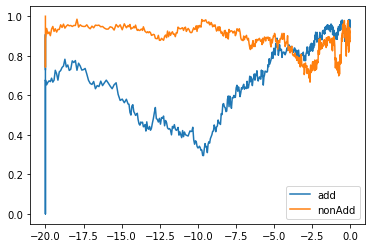

In [1359]:
crit = "maxPvalHsicBnch2"
ln_crit = "ln_"+crit
plt.plot(df_plt_all[ln_crit+"_runMean"], df_plt_all["auc_runMean_add"], label="add")
plt.plot(df_plt_all[ln_crit+"_runMean"], df_plt_all["auc_runMean_nonAdd"], label="nonAdd")
crit = "maxPvalHsicq1Bnch2"
ln_crit = "ln_"+crit
#plt.plot(df_plt_allq[ln_crit+"_runMean"], df_plt_allq["auc_runMean_add"], label="addq")
#plt.plot(df_plt_allq[ln_crit+"_runMean"], df_plt_allq["auc_runMean_nonAdd"], label="nonAddq")
plt.legend()

In [1360]:
crit = "maxPvalHsicBnch2"
ln_crit = "ln_"+crit
types = ["SIM","SIMG","SIMc","SIMln"]
size_window = 30
df_plt_sim = getRunningAUC(crit, types, size_window, dec_combo)
crit = "maxPvalHsicq1Bnch2"
ln_crit = "ln_"+crit
df_plt_simq = getRunningAUC(crit, types, size_window, dec_combo)


In [1361]:
df_plt_aux = df_plt_sim[["ln_maxPvalHsicBnch2_runMean","auc_runMean_add", "auc_runMean_nonAdd"]]
df_plt_aux["type"] = "SIM-x"
df_plt_gen = pd.concat([df_plt_gen, df_plt_aux])


/home/emiliano/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


/home/emiliano/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/home/emiliano/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/home/emiliano/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


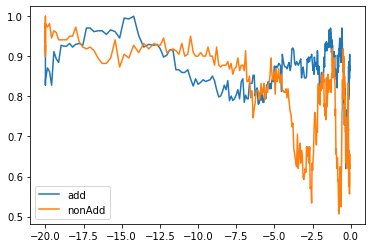

In [1362]:
crit = "maxPvalHsicBnch2"
ln_crit = "ln_"+crit
plt.plot(df_plt_sim[ln_crit+"_runMean"], df_plt_sim["auc_runMean_add"], label="add")
plt.plot(df_plt_sim[ln_crit+"_runMean"], df_plt_sim["auc_runMean_nonAdd"], label="nonAdd")
crit = "maxPvalHsicq1Bnch2"
ln_crit = "ln_"+crit
#plt.plot(df_plt_simq[ln_crit+"_runMean"], df_plt_simq["auc_runMean_add"], label="addq")
#plt.plot(df_plt_simq[ln_crit+"_runMean"], df_plt_simq["auc_runMean_nonAdd"], label="nonAddq")
plt.legend()

In [1363]:
crit = "maxPvalHsicBnch2"
ln_crit = "ln_"+crit
types = ["SIM"]
size_window = 20
df_plt_sim1 = getRunningAUC(crit, types, size_window, dec_combo)
crit = "maxPvalHsicq1Bnch2"
ln_crit = "ln_"+crit
df_plt_sim1q = getRunningAUC(crit, types, size_window, dec_combo)

In [1364]:
df_plt_aux = df_plt_sim1[["ln_maxPvalHsicBnch2_runMean","auc_runMean_add", "auc_runMean_nonAdd"]]
df_plt_aux["type"] = "SIM"
df_plt_gen = pd.concat([df_plt_gen, df_plt_aux])

/home/emiliano/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


/home/emiliano/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/home/emiliano/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/home/emiliano/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


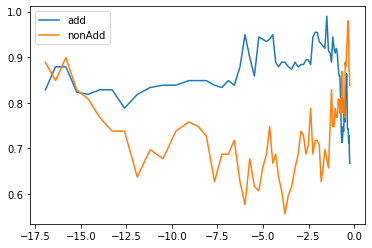

In [1365]:
crit = "maxPvalHsicBnch2"
ln_crit = "ln_"+crit
plt.plot(df_plt_sim1[ln_crit+"_runMean"], df_plt_sim1["auc_runMean_add"], label="add")
plt.plot(df_plt_sim1[ln_crit+"_runMean"], df_plt_sim1["auc_runMean_nonAdd"], label="nonAdd")
crit = "maxPvalHsicq1Bnch2"
ln_crit = "ln_"+crit
#plt.plot(df_plt_sim1q[ln_crit+"_runMean"], df_plt_sim1q["auc_runMean_add"], label="addq")
#plt.plot(df_plt_sim1q[ln_crit+"_runMean"], df_plt_sim1q["auc_runMean_nonAdd"], label="nonAddq")
plt.legend()

In [1366]:
crit = "maxPvalHsicBnch2"
ln_crit = "ln_"+crit
types = ["SIMln"]
size_window = 20
df_plt_sim2 = getRunningAUC(crit, types, size_window, dec_combo)
crit = "maxPvalHsicq1Bnch2"
ln_crit = "ln_"+crit
df_plt_sim2q = getRunningAUC(crit, types, size_window, dec_combo)


In [1367]:
df_plt_aux = df_plt_sim2[["ln_maxPvalHsicBnch2_runMean","auc_runMean_add", "auc_runMean_nonAdd"]]
df_plt_aux["type"] = "SIMln"
df_plt_gen = pd.concat([df_plt_gen, df_plt_aux])

/home/emiliano/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


/home/emiliano/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/home/emiliano/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/home/emiliano/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


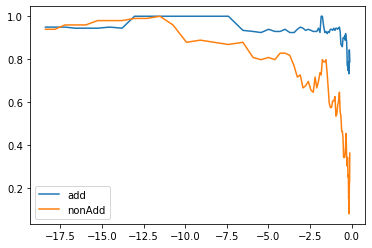

In [1368]:
crit = "maxPvalHsicBnch2"
ln_crit = "ln_"+crit
plt.plot(df_plt_sim2[ln_crit+"_runMean"], df_plt_sim2["auc_runMean_add"], label="add")
plt.plot(df_plt_sim2[ln_crit+"_runMean"], df_plt_sim2["auc_runMean_nonAdd"], label="nonAdd")
crit = "maxPvalHsicq1Bnch2"
ln_crit = "ln_"+crit
#plt.plot(df_plt_sim2q[ln_crit+"_runMean"], df_plt_sim2q["auc_runMean_add"], label="addq")
#plt.plot(df_plt_sim2q[ln_crit+"_runMean"], df_plt_sim2q["auc_runMean_nonAdd"], label="nonAddq")
plt.legend()

In [1369]:
crit = "maxPvalHsicBnch2"
ln_crit = "ln_"+crit
types = ["SIMG"]
size_window = 20
df_plt_sim3 = getRunningAUC(crit, types, size_window, dec_combo)
crit = "maxPvalHsicq1Bnch2"
ln_crit = "ln_"+crit
df_plt_sim3q = getRunningAUC(crit, types, size_window, dec_combo)

In [1370]:
df_plt_aux = df_plt_sim3[["ln_maxPvalHsicBnch2_runMean","auc_runMean_add", "auc_runMean_nonAdd"]]
df_plt_aux["type"] = "SIMG"
df_plt_gen = pd.concat([df_plt_gen, df_plt_aux])

/home/emiliano/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


/home/emiliano/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/home/emiliano/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/home/emiliano/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


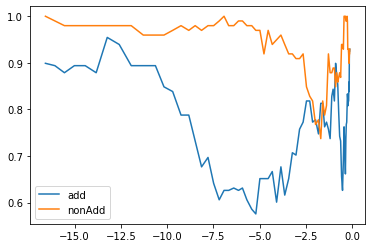

In [1371]:
crit = "maxPvalHsicBnch2"
ln_crit = "ln_"+crit
plt.plot(df_plt_sim3[ln_crit+"_runMean"], df_plt_sim3["auc_runMean_add"], label="add")
plt.plot(df_plt_sim3[ln_crit+"_runMean"], df_plt_sim3["auc_runMean_nonAdd"], label="nonAdd")
crit = "maxPvalHsicq1Bnch2"
ln_crit = "ln_"+crit
#plt.plot(df_plt_sim3q[ln_crit+"_runMean"], df_plt_sim3q["auc_runMean_add"], label="addq")
#plt.plot(df_plt_sim3q[ln_crit+"_runMean"], df_plt_sim3q["auc_runMean_nonAdd"], label="nonAddq")
plt.legend()

In [1372]:
crit = "maxPvalHsicBnch2"
ln_crit = "ln_"+crit
types = ["SIMc"]
size_window = 20
df_plt_sim4 = getRunningAUC(crit, types, size_window, dec_combo)
crit = "maxPvalHsicq1Bnch2"
ln_crit = "ln_"+crit
df_plt_sim4q = getRunningAUC(crit, types, size_window, dec_combo)

In [1373]:
df_plt_aux = df_plt_sim4[["ln_maxPvalHsicBnch2_runMean","auc_runMean_add", "auc_runMean_nonAdd"]]
df_plt_aux["type"] = "SIMc"
df_plt_gen = pd.concat([df_plt_gen, df_plt_aux])

/home/emiliano/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


/home/emiliano/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/home/emiliano/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/home/emiliano/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


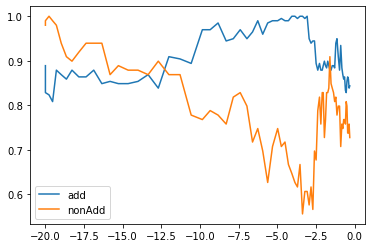

In [1374]:
crit = "maxPvalHsicBnch2"
ln_crit = "ln_"+crit
plt.plot(df_plt_sim4[ln_crit+"_runMean"], df_plt_sim4["auc_runMean_add"], label="add")
plt.plot(df_plt_sim4[ln_crit+"_runMean"], df_plt_sim4["auc_runMean_nonAdd"], label="nonAdd")
crit = "maxPvalHsicq1Bnch2"
ln_crit = "ln_"+crit
#plt.plot(df_plt_sim4q[ln_crit+"_runMean"], df_plt_sim4q["auc_runMean_add"], label="addq")
#plt.plot(df_plt_sim4q[ln_crit+"_runMean"], df_plt_sim4q["auc_runMean_nonAdd"], label="nonAddq")
plt.legend()

In [1375]:
crit = "maxPvalHsicBnch2"
ln_crit = "ln_"+crit
types = ["AN","AN-s","LS","LS-s","MN-U"]
size_window = 30
df_plt_anlsmn = getRunningAUC(crit, types, size_window, dec_combo)
crit = "maxPvalHsicq1Bnch2"
ln_crit = "ln_"+crit
df_plt_anlsmnq = getRunningAUC(crit, types, size_window, dec_combo)


In [1376]:
df_plt_aux = df_plt_anlsmn[["ln_maxPvalHsicBnch2_runMean","auc_runMean_add", "auc_runMean_nonAdd"]]
df_plt_aux["type"] = "ANLSMN"
df_plt_gen = pd.concat([df_plt_gen, df_plt_aux])

/home/emiliano/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


/home/emiliano/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/home/emiliano/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/home/emiliano/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


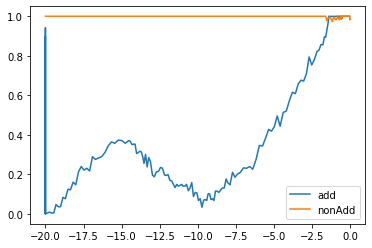

In [1377]:
crit = "maxPvalHsicBnch2"
ln_crit = "ln_"+crit
plt.plot(df_plt_anlsmn[ln_crit+"_runMean"], df_plt_anlsmn["auc_runMean_add"], label="add")
plt.plot(df_plt_anlsmn[ln_crit+"_runMean"], df_plt_anlsmn["auc_runMean_nonAdd"], label="nonAdd")
crit = "maxPvalHsicq1Bnch2"
ln_crit = "ln_"+crit
#plt.plot(df_plt_anlsmnq[ln_crit+"_runMean"], df_plt_anlsmnq["auc_runMean_add"], label="addq")
#plt.plot(df_plt_anlsmnq[ln_crit+"_runMean"], df_plt_anlsmnq["auc_runMean_nonAdd"], label="nonAddq")
plt.legend()

In [1378]:
crit = "maxPvalHsicBnch2"
ln_crit = "ln_"+crit
types = ["AN","AN-s"]
size_window = 20
df_plt_an = getRunningAUC(crit, types, size_window, dec_combo)
crit = "maxPvalHsicq1Bnch2"
ln_crit = "ln_"+crit
df_plt_anq = getRunningAUC(crit, types, size_window, dec_combo)


In [1379]:
df_plt_aux = df_plt_an[["ln_maxPvalHsicBnch2_runMean","auc_runMean_add", "auc_runMean_nonAdd"]]
df_plt_aux["type"] = "AN"
df_plt_gen = pd.concat([df_plt_gen, df_plt_aux])

/home/emiliano/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


/home/emiliano/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/home/emiliano/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/home/emiliano/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


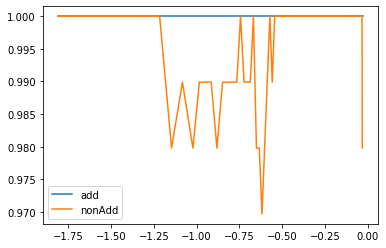

In [1380]:
crit = "maxPvalHsicBnch2"
ln_crit = "ln_"+crit
plt.plot(df_plt_an[ln_crit+"_runMean"], df_plt_an["auc_runMean_add"], label="add")
plt.plot(df_plt_an[ln_crit+"_runMean"], df_plt_an["auc_runMean_nonAdd"], label="nonAdd")
crit = "maxPvalHsicq1Bnch2"
ln_crit = "ln_"+crit
#plt.plot(df_plt_an[ln_crit+"_runMean"], df_plt_an["auc_runMean_add"], label="addq")
#plt.plot(df_plt_an[ln_crit+"_runMean"], df_plt_an["auc_runMean_nonAdd"], label="nonAddq")
plt.legend()

In [1381]:
crit = "maxPvalHsicBnch2"
ln_crit = "ln_"+crit
types = ["LS","LS-s","MN-U"]
size_window = 20
df_plt_lsmn = getRunningAUC(crit, types, size_window, dec_combo)
crit = "maxPvalHsicq1Bnch2"
ln_crit = "ln_"+crit
df_plt_lsmnq = getRunningAUC(crit, types, size_window, dec_combo)


In [1382]:
df_plt_aux = df_plt_lsmn[["ln_maxPvalHsicBnch2_runMean","auc_runMean_add", "auc_runMean_nonAdd"]]
df_plt_aux["type"] = "LSMN"
df_plt_gen = pd.concat([df_plt_gen, df_plt_aux])

/home/emiliano/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


/home/emiliano/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/home/emiliano/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/home/emiliano/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


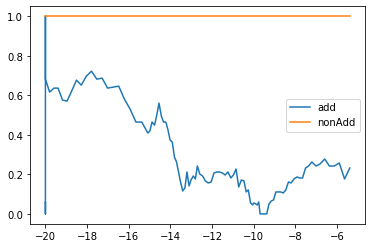

In [1383]:
crit = "maxPvalHsicBnch2"
ln_crit = "ln_"+crit
plt.plot(df_plt_lsmn[ln_crit+"_runMean"], df_plt_lsmn["auc_runMean_add"], label="add")
plt.plot(df_plt_lsmn[ln_crit+"_runMean"], df_plt_lsmn["auc_runMean_nonAdd"], label="nonAdd")
crit = "maxPvalHsicq1Bnch2"
ln_crit = "ln_"+crit
#plt.plot(df_plt_lsmnq[ln_crit+"_runMean"], df_plt_lsmnq["auc_runMean_add"], label="addq")
#plt.plot(df_plt_lsmnq[ln_crit+"_runMean"], df_plt_lsmnq["auc_runMean_nonAdd"], label="nonAddq")
plt.legend()

In [1384]:
crit = "maxPvalHsicBnch2"
ln_crit = "ln_"+crit
types = ["tcep"]
size_window = 20
df_plt_tcep = getRunningAUC(crit, types, size_window, dec_combo)
crit = "maxPvalHsicq1Bnch2"
ln_crit = "ln_"+crit
df_plt_tcepq = getRunningAUC(crit, types, size_window, dec_combo)

In [1385]:
df_plt_aux = df_plt_tcep[["ln_maxPvalHsicBnch2_runMean","auc_runMean_add", "auc_runMean_nonAdd"]]
df_plt_aux["type"] = "tcep"
df_plt_gen = pd.concat([df_plt_gen, df_plt_aux])

/home/emiliano/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


/home/emiliano/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/home/emiliano/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/home/emiliano/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


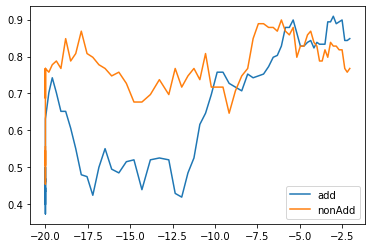

In [1386]:
crit = "maxPvalHsicBnch2"
ln_crit = "ln_"+crit
plt.plot(df_plt_tcep[ln_crit+"_runMean"], df_plt_tcep["auc_runMean_add"], label="add")
plt.plot(df_plt_tcep[ln_crit+"_runMean"], df_plt_tcep["auc_runMean_nonAdd"], label="nonAdd")
crit = "maxPvalHsicq1Bnch2"
ln_crit = "ln_"+crit
#plt.plot(df_plt_tcepq[ln_crit+"_runMean"], df_plt_tcepq["auc_runMean_add"], label="addq")
#plt.plot(df_plt_tcepq[ln_crit+"_runMean"], df_plt_tcepq["auc_runMean_nonAdd"], label="nonAddq")
plt.legend()

In [1387]:
df_plt_gen

,ln_maxPvalHsicBnch2_runMean,auc_runMean_add,auc_runMean_nonAdd,type
954,-20.000000,0.730833,1.000000,all
951,-20.000000,0.748333,1.000000,all
948,-20.000000,0.750000,1.000000,all
1470,-20.000000,0.731667,1.000000,all
942,-20.000000,0.717500,1.000000,all
...,...,...,...,...
2916,-2.676357,0.893939,0.818182,tcep
2907,-2.500544,0.898990,0.818182,tcep
2994,-2.342274,0.843434,0.767677,tcep
2988,-2.197270,0.843434,0.757576,tcep


In [1388]:
df_plt_gen2 = pd.melt(df_plt_gen, id_vars=["ln_maxPvalHsicBnch2_runMean","type"])

In [1389]:
df_plt_gen2["type"].loc[df_plt_gen2["type"]=="tcep"]="Tub"

/home/emiliano/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [1390]:
df_plt_gen2

,ln_maxPvalHsicBnch2_runMean,type,variable,value
0,-20.000000,all,auc_runMean_add,0.730833
1,-20.000000,all,auc_runMean_add,0.748333
2,-20.000000,all,auc_runMean_add,0.750000
3,-20.000000,all,auc_runMean_add,0.731667
4,-20.000000,all,auc_runMean_add,0.717500
...,...,...,...,...
5303,-2.676357,Tub,auc_runMean_nonAdd,0.818182
5304,-2.500544,Tub,auc_runMean_nonAdd,0.818182
5305,-2.342274,Tub,auc_runMean_nonAdd,0.767677
5306,-2.197270,Tub,auc_runMean_nonAdd,0.757576


In [1391]:
repos = "/home/emiliano/Documents/ISP/proyectos/causality/latentNoise_krr/results/tables_for_R/"
 

2022-02-25 14:32:06,262:WARNING:The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
2022-02-25 14:32:06,263:WARNING:The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
2022-02-25 14:32:06,264:WARNING:The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
2022-02-25 14:32:06,265:WARNING:The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
2022-02-25 14:32:06,266:WARNING:The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
2022-02-25 14:32:06,267:WARNING:The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
2022-02-25 14:32:06,308:WARNING:The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
2022-02-25 14

2022-02-25 14:32:07,358:WARNING:The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


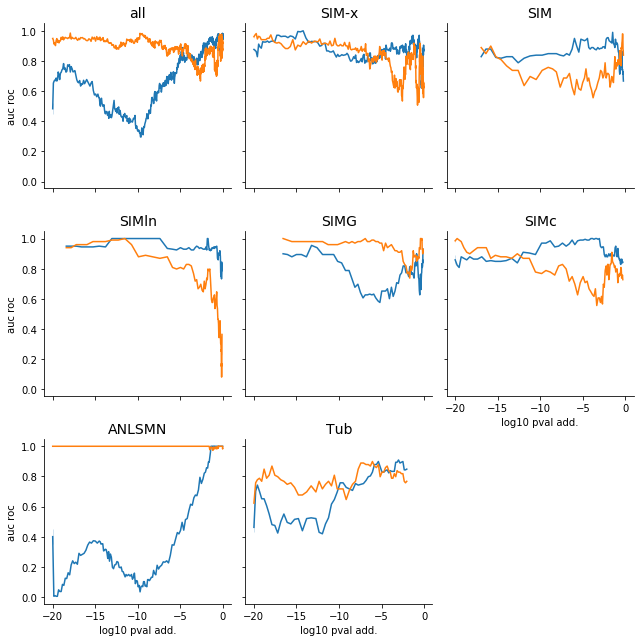

In [1392]:
repos = "/home/emiliano/Documents/ISP/proyectos/causality/latentNoise_krr/results/tables_for_R/"
file = "running_aucs_v2.eps"
g = sns.FacetGrid(df_plt_gen2.loc[df_plt_gen2["type"].isin(["all","SIM-x","SIM","SIMln","SIMG","SIMc","ANLSMN","Tub"])], hue="variable", col="type",col_wrap=3)
#g.map(sns.lineplot, "ln_maxPvalHsicBnch2_runMean", "value")
g.map(sns.lineplot, "ln_maxPvalHsicBnch2_runMean", "value")
g.set(xlabel='log10 pval add.', ylabel='auc roc')

repos = "/home/emiliano/Documents/ISP/proyectos/causality/latentNoise_krr/results/tables_for_R/"
file = "running_aucs_v2.eps"
g.set_titles(col_template="{col_name}",size=14)
g.savefig(repos+file, format='eps', dpi=300)

2022-02-25 14:32:09,417:WARNING:The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
2022-02-25 14:32:09,418:WARNING:The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
2022-02-25 14:32:09,418:WARNING:The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
2022-02-25 14:32:09,420:WARNING:The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
2022-02-25 14:32:09,421:WARNING:The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
2022-02-25 14:32:09,421:WARNING:The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
2022-02-25 14:32:09,496:WARNING:The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
2022-02-25 14

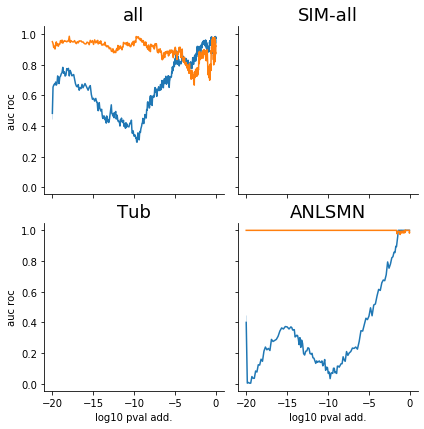

In [1393]:

file = "running_aucs2_v2.eps"
indx = [ty in ["all","SIM-all","ANLSMN","tcep"] for ty in df_plt_gen2["type"]]
g = sns.FacetGrid(df_plt_gen2.loc[indx], hue="variable", col="type",col_wrap=2, col_order=["all","SIM-all","Tub","ANLSMN"])
g.map(sns.lineplot, "ln_maxPvalHsicBnch2_runMean", "value")
g.set(xlabel='log10 pval add.', ylabel='auc roc')
#g.add_legend()
g.set_titles(col_template="{col_name}",size=18)
g.savefig(repos+file, format='eps', dpi=300)


In [196]:
crit = "minHsicBnch"
ln_crit = "ln_"+crit
size_window = 20
df_plt_tcep2 = getRunningAUC(crit, types, size_window, dec_combo)

/home/emiliano/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/home/emiliano/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/home/emiliano/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


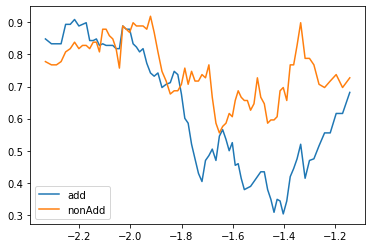

In [197]:
crit = "minHsicBnch"
ln_crit = "ln_"+crit
plt.plot(df_plt_tcep2[ln_crit+"_runMean"], df_plt_tcep2["auc_runMean_add"], label="add")
plt.plot(df_plt_tcep2[ln_crit+"_runMean"], df_plt_tcep2["auc_runMean_nonAdd"], label="nonAdd")
plt.legend()

In [198]:
crit = "minHsicRobBnch"
ln_crit = "ln_"+crit
size_window = 20
df_plt_tcep3 = getRunningAUC(crit, types, size_window, dec_combo)

/home/emiliano/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/home/emiliano/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/home/emiliano/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


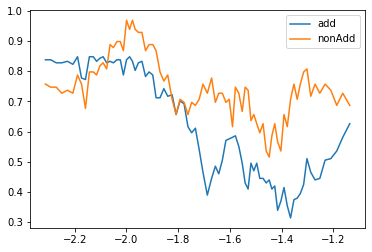

In [199]:
crit = "minHsicRobBnch"
ln_crit = "ln_"+crit
plt.plot(df_plt_tcep3[ln_crit+"_runMean"], df_plt_tcep3["auc_runMean_add"], label="add")
plt.plot(df_plt_tcep3[ln_crit+"_runMean"], df_plt_tcep3["auc_runMean_nonAdd"], label="nonAdd")
plt.legend()

/home/emiliano/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/emiliano/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/home/emiliano/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/home/emiliano/anaconda3/lib/python3.7/site-packages/matplotlib/

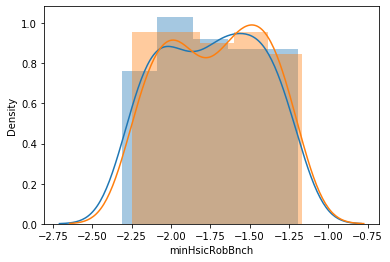

In [200]:
sns.distplot(onp.log10(df_plt_tcep2["minHsicBnch"]))
sns.distplot(onp.log10(df_plt_tcep3["minHsicRobBnch"]))

/home/emiliano/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/emiliano/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/home/emiliano/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/home/emiliano/anaconda3/lib/python3.7/site-packages/matplotlib/

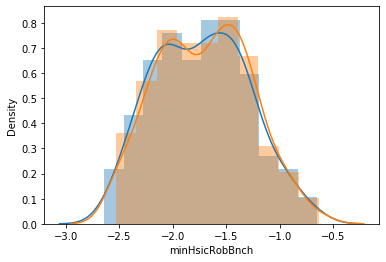

In [201]:
sns.distplot(onp.log10(dec_combo["minHsicBnch"].loc[dec_combo["type"]=="tcep"]))
sns.distplot(onp.log10(dec_combo["minHsicRobBnch"].loc[dec_combo["type"]=="tcep"]))

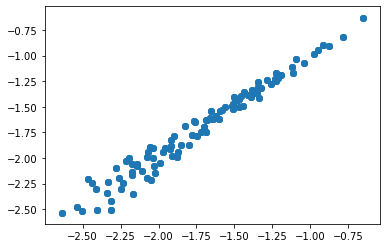

In [202]:
plt.scatter(onp.log10(dec_combo["minHsicBnch"].loc[dec_combo["type"]=="tcep"]), onp.log10(dec_combo["minHsicRobBnch"].loc[dec_combo["type"]=="tcep"]))

In [203]:
#getPerfTab(dec_combo, f1, "value")

In [204]:
#getPerfTab(dec_combo, roc, "value")

In [205]:
#getPerfTab(dec_combo, proc, "value")

In [206]:
#getPerfTab(dec_combo, roc, "conf_signed")

### combine by hsic(r_ANM,x) vs hsic(r_LN,c) comparison

In [1159]:
dec_combo = dec_add_bnch.merge(dec_nonAdd, how="inner", on=["type","dataset","variable","smpl_wts"])

In [1160]:
dec_combo = dec_combo.merge(res_compHsic[["type","dataset","ln_dif"]], how="left", on=["type","dataset"])

In [1161]:

dec_combo["nonRejAdd"] = dec_combo["ln_dif"]<0
dec_combo["value"] = dec_combo["nonRejAdd"]*dec_combo["value_x"]+onp.logical_not(dec_combo["nonRejAdd"])*dec_combo["value_y"]
dec_combo["conf"] = (dec_combo["nonRejAdd"]*dec_combo["conf_x"]+onp.logical_not(dec_combo["nonRejAdd"])*dec_combo["conf_y"])/2

In [1162]:
dec_combo["conf_signed"] = dec_combo["conf"]*onp.sign(dec_combo["value"])

In [1163]:
dec_combo[["type","nonRejAdd"]].groupby("type").apply(nonRejAdd2)

type
AN              1.000000
AN-s            1.000000
LS              0.070000
LS-s            0.290000
MN-U            0.110000
SIM             0.860000
SIMG            0.770000
SIMc            0.720000
SIMln           0.850000
tcep            0.549020
tcep_Disc       0.787234
tcep_GEO        0.433333
tcep_NONGEO     0.597222
tcep_NonDisc    0.345455
tcep_w          0.549180
dtype: float64

In [1164]:
dec_combo = addAdd(dec_combo)

dtsAdd:  56
dtsNonAdd:  46
dtsAdd:  567
dtsNonAdd:  333


/home/emiliano/Documents/ISP/proyectos/causality/latentNoise_krr/src/processResults.py:1764: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aux["type"] = grpNm


In [1165]:
dec_aux = dec_combo.loc[[v in ["ent"] for v in dec_combo["variable"]]][["type","value","smpl_wts","variable","nonRejAdd"]]
dec_aux["model-add"] = "ANM"
dec_aux["model-nonAdd"] = "LN"
dec_aux["comb-crit"] = "hsicx-hsic"
getPerfTab(dec_aux, bal_acc, "value")
#dec_all = pd.concat([dec_all, dec_aux])
#dec_all.shape

variable,ent
type,
SIM,0.793019
SIMc,0.892045
SIMln,0.871753
SIMG,0.822240
AN,1.000000
AN-s,0.988636
LS,0.988636
LS-s,0.702110
MN-U,0.889610


In [1166]:
getPerfTab(dec_combo, acc, "value")

variable,ent,errs,hsic
type,,,
SIM,0.790000,0.600000,0.770000
SIMc,0.890000,0.670000,0.740000
SIMln,0.870000,0.810000,0.840000
SIMG,0.820000,0.670000,0.610000
AN,1.000000,1.000000,1.000000
AN-s,0.990000,0.500000,1.000000
LS,0.990000,0.460000,0.060000
LS-s,0.710000,0.500000,0.050000
MN-U,0.890000,0.170000,0.030000


In [1167]:
#getPerfTab(dec_combo, f1, "value")

In [1168]:
#getPerfTab(dec_combo, roc, "value")

In [1169]:
#getPerfTab(dec_combo, proc, "value")

In [1170]:
#getPerfTab(dec_combo, roc, "conf_signed")

### combine by hsic(r_ANM,x) vs hsic(r_LN,x) comparison

In [1171]:
res_compHsic
res_compHsic["nonRejAdd"] = res_compHsic["ln_difx"]<0
res_compHsic[["type","nonRejAdd"]].groupby("type").apply(nonRejAdd2)

type
AN              0.990000
AN-s            0.990000
LS              0.030000
LS-s            0.040000
MN-U            0.010000
SIM             0.730000
SIMG            0.620000
SIMc            0.570000
SIMln           0.790000
tcep            0.500000
tcep_Disc       0.702128
tcep_GEO        0.300000
tcep_NONGEO     0.583333
tcep_NonDisc    0.327273
tcep_w          0.500000
dtype: float64

In [1172]:
dec_combo = dec_add_bnch.merge(dec_nonAdd, how="inner", on=["type","dataset","variable","smpl_wts"])

In [1173]:
dec_combo = dec_combo.merge(res_compHsic[["type","dataset","ln_difx"]], how="left", on=["type","dataset"])

In [1174]:

dec_combo["nonRejAdd"] = dec_combo["ln_difx"]<0
dec_combo["value"] = dec_combo["nonRejAdd"]*dec_combo["value_x"]+onp.logical_not(dec_combo["nonRejAdd"])*dec_combo["value_y"]
dec_combo["conf"] = (dec_combo["nonRejAdd"]*dec_combo["conf_x"]+onp.logical_not(dec_combo["nonRejAdd"])*dec_combo["conf_y"])/2

In [1175]:
dec_combo["conf_signed"] = dec_combo["conf"]*onp.sign(dec_combo["value"])

In [1176]:
dec_combo[["type","nonRejAdd"]].groupby("type").apply(nonRejAdd2)

type
AN              0.990000
AN-s            0.990000
LS              0.030000
LS-s            0.040000
MN-U            0.010000
SIM             0.730000
SIMG            0.620000
SIMc            0.570000
SIMln           0.790000
tcep            0.500000
tcep_Disc       0.702128
tcep_GEO        0.300000
tcep_NONGEO     0.583333
tcep_NonDisc    0.327273
tcep_w          0.500000
dtype: float64

In [1177]:
dec_combo = addAdd(dec_combo)

dtsAdd:  51
dtsNonAdd:  51
dtsAdd:  477
dtsNonAdd:  423


/home/emiliano/Documents/ISP/proyectos/causality/latentNoise_krr/src/processResults.py:1764: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aux["type"] = grpNm


In [1178]:
dec_aux = dec_combo.loc[[v in ["ent"] for v in dec_combo["variable"]]][["type","value","smpl_wts","variable","nonRejAdd"]]
dec_aux["model-add"] = "ANM"
dec_aux["model-nonAdd"] = "LN"
dec_aux["comb-crit"] = "hsicx-hsicx"
#getPerfTab(dec_aux, bal_acc, "value")
dec_all = pd.concat([dec_all, dec_aux])
dec_all.shape

(39274, 8)

In [1179]:
getPerfTab(dec_combo, acc, "value")

variable,ent,errs,hsic
type,,,
SIM,0.780000,0.590000,0.720000
SIMc,0.880000,0.650000,0.680000
SIMln,0.850000,0.810000,0.830000
SIMG,0.840000,0.690000,0.510000
AN,1.000000,0.990000,1.000000
AN-s,0.990000,0.500000,1.000000
LS,0.990000,0.460000,0.040000
LS-s,0.960000,0.710000,0.050000
MN-U,0.990000,0.210000,0.030000


In [1180]:
#getPerfTab(dec_combo, f1, "value")

In [1181]:
#getPerfTab(dec_combo, roc, "value")

In [1182]:
#getPerfTab(dec_combo, proc, "value")

In [1183]:
#getPerfTab(dec_combo, roc, "conf_signed")

## Combine dec_add with dec_nonAdd

### combine by confidence

In [1184]:
dec_combo = dec_add.merge(dec_nonAdd, how="inner", on=["type","dataset","variable","smpl_wts"])

In [1185]:
dec_combo["moreConfAdd"] = dec_combo["conf_x"]>=dec_combo["conf_y"]
dec_combo["moreConfNonAdd"] = dec_combo["conf_x"]<=dec_combo["conf_y"]
dec_combo["value"] = dec_combo["moreConfAdd"]*dec_combo["value_x"]+dec_combo["moreConfNonAdd"]*dec_combo["value_y"]
dec_combo["conf"] = (dec_combo["moreConfAdd"]*dec_combo["conf_x"]+dec_combo["moreConfNonAdd"]*dec_combo["conf_y"])/2

In [1186]:
dec_combo["conf_signed"] = dec_combo["conf"]*onp.sign(dec_combo["value"])

In [1187]:
getPerfTab(dec_combo, bal_acc, "value")

variable,ent,errs,hsic,hsicc,hsicx,hsicz
type,,,,,,
SIM,0.752435,0.635552,0.635552,0.534091,0.642045,0.125812
SIMc,0.808442,0.662338,0.662338,0.547890,0.628247,0.049513
SIMln,0.630682,0.838474,0.784091,0.452922,0.696429,0.000000
SIMG,0.905032,0.720779,0.271104,0.716721,0.206169,0.179383
AN,1.000000,0.682630,0.959416,0.478896,0.855519,0.049513
AN-s,0.979708,0.425325,0.706981,1.000000,0.319805,0.116883
LS,1.000000,0.692370,0.087662,0.529221,0.272727,0.574675
LS-s,1.000000,0.601461,0.000000,0.756494,0.101461,0.578734
MN-U,1.000000,0.200487,0.000000,1.000000,0.159903,0.335227


In [1188]:
#getPerfTab(dec_combo, f1, "value")

In [1189]:
#getPerfTab(dec_combo, roc, "value")

In [1190]:
#getPerfTab(dec_combo, proc, "value")

In [1191]:
#getPerfTab(dec_combo, roc, "conf_signed")

### combine by additivity test

In [1192]:
dec_combo = dec_add.merge(dec_nonAdd, how="inner", on=["type","dataset","variable","smpl_wts"])

In [1193]:
dec_combo = dec_combo.merge(res_bnch, how="left", on=["type","dataset"])

In [1194]:
sig = 0.001
dec_combo["add"] = dec_combo["conf_x"]>=dec_combo["conf_y"]
dec_combo["nonRejAdd"] = dec_combo["maxPvalHsicBnch"]>sig
#dec_combo["nonRejAdd"] = dec_combo["maxPvalHsicAdptBnch2"]>pvalThrs
#dec_combo["nonRejAdd"] = dec_combo["maxPvalHsicq2Bnch2"]>pvalThrs3
dec_combo["value"] = dec_combo["nonRejAdd"]*dec_combo["value_x"]+onp.logical_not(dec_combo["nonRejAdd"])*dec_combo["value_y"]
dec_combo["conf"] = (dec_combo["nonRejAdd"]*dec_combo["conf_x"]+onp.logical_not(dec_combo["nonRejAdd"])*dec_combo["conf_y"])/2

In [1195]:
dec_combo["conf_signed"] = dec_combo["conf"]*onp.sign(dec_combo["value"])
dec_combo["smpl_wts"] = dec_combo["smpl_wts_x"]

In [1196]:
dec_combo[["type","nonRejAdd"]].groupby("type").apply(nonRejAdd2)

type
AN              0.990000
AN-s            1.000000
LS              0.030000
LS-s            0.010000
MN-U            0.000000
SIM             0.550000
SIMG            0.550000
SIMc            0.480000
SIMln           0.650000
tcep            0.156863
tcep_Disc       0.234043
tcep_GEO        0.100000
tcep_NONGEO     0.180556
tcep_NonDisc    0.090909
tcep_w          0.163934
dtype: float64

In [1197]:
dec_combo = addAdd(dec_combo)

/home/emiliano/Documents/ISP/proyectos/causality/latentNoise_krr/src/processResults.py:1764: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aux["type"] = grpNm


dtsAdd:  16
dtsNonAdd:  86
dtsAdd:  426
dtsNonAdd:  474


In [1198]:
dec_aux = dec_combo.loc[[v in ["ent"] for v in dec_combo["variable"]]][["type","value","smpl_wts","variable","nonRejAdd"]]
dec_aux["model-add"] = "LN"
dec_aux["model-nonAdd"] = "LN"
dec_aux["comb-crit"] = "add-test"
#getPerfTab(dec_aux, bal_acc, "value")
dec_all = pd.concat([dec_all, dec_aux])
dec_all.shape

(43914, 8)

In [1199]:
getPerfTab(dec_combo, bal_acc, "value")

variable,ent,errs,hsic,hsicc,hsicx,hsicz
type,,,,,,
SIM,0.723214,0.588474,0.633117,0.507305,0.607955,0.308442
SIMc,0.822240,0.648539,0.653409,0.549513,0.592532,0.168831
SIMln,0.741071,0.758929,0.822240,0.412338,0.728084,0.195617
SIMG,0.804383,0.682630,0.476461,0.522727,0.300325,0.296266
AN,1.000000,0.991071,1.000000,0.072240,0.991071,0.107955
AN-s,0.950487,0.456981,1.000000,0.774351,1.000000,0.299513
LS,0.988636,0.469156,0.040584,0.633117,0.206981,0.563312
LS-s,0.988636,0.750812,0.049513,0.756494,0.011364,0.612825
MN-U,1.000000,0.223214,0.029221,1.000000,0.056006,0.344156


In [1200]:
#getPerfTab(dec_combo, f1, "value")

In [1201]:
#getPerfTab(dec_combo, roc, "value")

In [1202]:
#getPerfTab(dec_combo, proc, "value")

In [1203]:
#getPerfTab(dec_combo, roc, "conf_signed")

### combine by hsic(r_ANM,x) vs hsic(r_LN,c) comparison

In [1204]:
dec_combo = dec_add.merge(dec_nonAdd, how="inner", on=["type","dataset","variable","smpl_wts"])

In [1205]:
dec_combo = dec_combo.merge(res_compHsic[["type","dataset","ln_dif"]], how="left", on=["type","dataset"])

In [1206]:
dec_combo["nonRejAdd"] = dec_combo["ln_dif"]<0
dec_combo["value"] = dec_combo["nonRejAdd"]*dec_combo["value_x"]+onp.logical_not(dec_combo["nonRejAdd"])*dec_combo["value_y"]
dec_combo["conf"] = (dec_combo["nonRejAdd"]*dec_combo["conf_x"]+onp.logical_not(dec_combo["nonRejAdd"])*dec_combo["conf_y"])/2

In [1207]:
dec_combo["conf_signed"] = dec_combo["conf"]*onp.sign(dec_combo["value"])

In [1208]:
dec_combo[["type","nonRejAdd"]].groupby("type").apply(nonRejAdd2)

type
AN              1.000000
AN-s            1.000000
LS              0.070000
LS-s            0.290000
MN-U            0.110000
SIM             0.860000
SIMG            0.770000
SIMc            0.720000
SIMln           0.850000
tcep            0.549020
tcep_Disc       0.787234
tcep_GEO        0.433333
tcep_NONGEO     0.597222
tcep_NonDisc    0.345455
tcep_w          0.549180
dtype: float64

In [1209]:
dec_combo = addAdd(dec_combo)

/home/emiliano/Documents/ISP/proyectos/causality/latentNoise_krr/src/processResults.py:1764: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aux["type"] = grpNm


dtsAdd:  56
dtsNonAdd:  46
dtsAdd:  567
dtsNonAdd:  333


In [1210]:
dec_aux = dec_combo.loc[[v in ["ent"] for v in dec_combo["variable"]]][["type","value","smpl_wts","variable","nonRejAdd"]]
dec_aux["model-add"] = "LN"
dec_aux["model-nonAdd"] = "LN"
dec_aux["comb-crit"] = "hsicx-hsic"
#getPerfTab(dec_aux, bal_acc, "value")
dec_all = pd.concat([dec_all, dec_aux])
dec_all.shape

(48554, 8)

In [1211]:
getPerfTab(dec_combo, bal_acc, "value")

variable,ent,errs,hsic,hsicc,hsicx,hsicz
type,,,,,,
SIM,0.781656,0.590909,0.734578,0.534091,0.619318,0.407468
SIMc,0.869318,0.668831,0.723214,0.590097,0.592532,0.238636
SIMln,0.770292,0.758929,0.849026,0.400974,0.771104,0.227273
SIMG,0.763799,0.653409,0.618506,0.430195,0.367695,0.339286
AN,1.000000,1.000000,1.000000,0.072240,1.000000,0.107955
AN-s,0.950487,0.456981,1.000000,0.774351,1.000000,0.299513
LS,0.988636,0.469156,0.058442,0.615260,0.242695,0.554383
LS-s,0.702110,0.547890,0.049513,0.672890,0.011364,0.605519
MN-U,0.889610,0.185065,0.029221,0.909903,0.107955,0.337662


In [1212]:
#getPerfTab(dec_combo, f1, "value")

In [1213]:
#getPerfTab(dec_combo, roc, "value")

In [1214]:
#getPerfTab(dec_combo, proc, "value")

In [1215]:
#getPerfTab(dec_combo, roc, "conf_signed")

### combine by hsic(r_ANM,x) vs hsic(r_LN,x) comparison

In [1216]:
dec_combo = dec_add.merge(dec_nonAdd, how="inner", on=["type","dataset","variable","smpl_wts"])

In [1217]:
dec_combo = dec_combo.merge(res_compHsic[["type","dataset","ln_difx"]], how="left", on=["type","dataset"])

In [1218]:
dec_combo["nonRejAdd"] = dec_combo["ln_difx"]<0
dec_combo["value"] = dec_combo["nonRejAdd"]*dec_combo["value_x"]+onp.logical_not(dec_combo["nonRejAdd"])*dec_combo["value_y"]
dec_combo["conf"] = (dec_combo["nonRejAdd"]*dec_combo["conf_x"]+onp.logical_not(dec_combo["nonRejAdd"])*dec_combo["conf_y"])/2

In [1219]:
dec_combo["conf_signed"] = dec_combo["conf"]*onp.sign(dec_combo["value"])

In [1220]:
dec_combo[["type","nonRejAdd"]].groupby("type").apply(nonRejAdd2)

type
AN              0.990000
AN-s            0.990000
LS              0.030000
LS-s            0.040000
MN-U            0.010000
SIM             0.730000
SIMG            0.620000
SIMc            0.570000
SIMln           0.790000
tcep            0.500000
tcep_Disc       0.702128
tcep_GEO        0.300000
tcep_NONGEO     0.583333
tcep_NonDisc    0.327273
tcep_w          0.500000
dtype: float64

In [1221]:
dec_combo = addAdd(dec_combo)

/home/emiliano/Documents/ISP/proyectos/causality/latentNoise_krr/src/processResults.py:1764: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aux["type"] = grpNm


dtsAdd:  51
dtsNonAdd:  51
dtsAdd:  477
dtsNonAdd:  423


In [1222]:
dec_aux = dec_combo.loc[[v in ["ent"] for v in dec_combo["variable"]]][["type","value","smpl_wts","variable","nonRejAdd"]]
dec_aux["model-add"] = "LN"
dec_aux["model-nonAdd"] = "LN"
dec_aux["comb-crit"] = "hsicx-hsicx"
#getPerfTab(dec_aux, bal_acc, "value")
dec_all = pd.concat([dec_all, dec_aux])
dec_all.shape

(53194, 8)

In [1223]:
getPerfTab(dec_combo, bal_acc, "value")

variable,ent,errs,hsic,hsicc,hsicx,hsicz
type,,,,,,
SIM,0.775162,0.579545,0.702922,0.563312,0.599026,0.357955
SIMc,0.849026,0.648539,0.673701,0.567370,0.583604,0.186688
SIMln,0.761364,0.758929,0.837662,0.414773,0.748377,0.227273
SIMG,0.795455,0.682630,0.528409,0.482143,0.320617,0.307630
AN,1.000000,0.991071,1.000000,0.072240,1.000000,0.107955
AN-s,0.950487,0.456981,1.000000,0.783279,0.991071,0.290584
LS,0.988636,0.469156,0.040584,0.633117,0.206981,0.563312
LS-s,0.956981,0.730519,0.049513,0.756494,0.011364,0.610390
MN-U,0.991071,0.214286,0.029221,1.000000,0.056006,0.344156


In [1224]:
#getPerfTab(dec_combo, f1, "value")

In [1225]:
#getPerfTab(dec_combo, roc, "value")

In [1226]:
#getPerfTab(dec_combo, proc, "value")

In [1227]:
#getPerfTab(dec_combo, roc, "conf_signed")

## Combine dec_bnch_add-HSIC with dec_nonAdd-ENT

### combine by additivity test

In [1228]:
dec_add_bnch_hsic = dec_add_bnch.loc[dec_add_bnch["variable"]=="hsic"]
dec_nonAdd_ent = dec_nonAdd.loc[dec_nonAdd["variable"]=="ent"]


In [1229]:
dec_combo = dec_add_bnch_hsic.merge(dec_nonAdd_ent, how="inner", on=["type","dataset","smpl_wts"])
dec_combo["variable"] = "hsicEnt"

In [1230]:
dec_combo = dec_combo.merge(res_bnch, how="left", on=["type","dataset"])

In [1231]:
sig = 0.001
dec_combo["nonRejAdd"] = dec_combo["maxPvalHsicBnch"]>sig
#dec_combo["nonRejAdd"] = dec_combo["maxPvalHsicAdptBnch2"]>pvalThrs
#dec_combo["nonRejAdd"] = dec_combo["maxPvalHsicq2Bnch2"]>pvalThrs3
dec_combo["value"] = dec_combo["nonRejAdd"]*dec_combo["value_x"]+onp.logical_not(dec_combo["nonRejAdd"])*dec_combo["value_y"]
dec_combo["conf"] = (dec_combo["nonRejAdd"]*dec_combo["conf_x"]+onp.logical_not(dec_combo["nonRejAdd"])*dec_combo["conf_y"])/2

In [1232]:
dec_combo["conf_signed"] = dec_combo["conf"]*onp.sign(dec_combo["value"])
dec_combo["smpl_wts"] = dec_combo["smpl_wts_x"]

In [1233]:
dec_combo[["type","nonRejAdd"]].groupby("type").apply(nonRejAdd2)

type
AN              0.990000
AN-s            1.000000
LS              0.030000
LS-s            0.010000
MN-U            0.000000
SIM             0.550000
SIMG            0.550000
SIMc            0.480000
SIMln           0.650000
tcep            0.156863
tcep_Disc       0.234043
tcep_GEO        0.100000
tcep_NONGEO     0.180556
tcep_NonDisc    0.090909
tcep_w          0.163934
dtype: float64

In [1234]:
dec_combo = addAdd(dec_combo)

dtsAdd:  16
dtsNonAdd:  86
dtsAdd:  426
dtsNonAdd:  474


/home/emiliano/Documents/ISP/proyectos/causality/latentNoise_krr/src/processResults.py:1764: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aux["type"] = grpNm


In [1235]:
dec_aux = dec_combo.loc[[v in ["hsicEnt"] for v in dec_combo["variable"]]][["type","value","smpl_wts","variable","nonRejAdd"]]
dec_aux["model-add"] = "ANM"
dec_aux["model-nonAdd"] = "LN"
dec_aux["comb-crit"] = "add-test"
#getPerfTab(dec_aux, bal_acc, "value")
dec_all = pd.concat([dec_all, dec_aux])
dec_all.shape

(57834, 8)

In [1236]:
getPerfTab(dec_combo, bal_acc, "value")

variable,hsicEnt
type,
SIM,0.725649
SIMc,0.810877
SIMln,0.793019
SIMG,0.831169
AN,1.000000
AN-s,1.000000
LS,0.988636
LS-s,0.988636
MN-U,1.000000


In [1237]:
#getPerfTab(dec_combo, f1, "value")

In [1238]:
#getPerfTab(dec_combo, roc, "value")

In [1239]:
#getPerfTab(dec_combo, proc, "value")

In [1240]:
#getPerfTab(dec_combo, roc, "conf_signed")

### combine by hsic(r_ANM,x) vs hsic(r_LN,c) comparison

In [1241]:
dec_combo = dec_add_bnch_hsic.merge(dec_nonAdd_ent, how="inner", on=["type","dataset","smpl_wts"])
dec_combo["variable"] = "hsicEnt"

In [1242]:
dec_combo = dec_combo.merge(res_compHsic[["type","dataset","ln_dif"]], how="left", on=["type","dataset"])

In [1243]:
dec_combo["nonRejAdd"] = dec_combo["ln_dif"]<0
dec_combo["value"] = dec_combo["nonRejAdd"]*dec_combo["value_x"]+onp.logical_not(dec_combo["nonRejAdd"])*dec_combo["value_y"]
dec_combo["conf"] = (dec_combo["nonRejAdd"]*dec_combo["conf_x"]+onp.logical_not(dec_combo["nonRejAdd"])*dec_combo["conf_y"])/2

In [1244]:
dec_combo["conf_signed"] = dec_combo["conf"]*onp.sign(dec_combo["value"])

In [1245]:
dec_combo[["type","nonRejAdd"]].groupby("type").apply(nonRejAdd2)

type
AN              1.000000
AN-s            1.000000
LS              0.070000
LS-s            0.290000
MN-U            0.110000
SIM             0.860000
SIMG            0.770000
SIMc            0.720000
SIMln           0.850000
tcep            0.549020
tcep_Disc       0.787234
tcep_GEO        0.433333
tcep_NONGEO     0.597222
tcep_NonDisc    0.345455
tcep_w          0.549180
dtype: float64

In [1246]:
dec_combo = addAdd(dec_combo)

dtsAdd:  56
dtsNonAdd:  46
dtsAdd:  567
dtsNonAdd:  333


/home/emiliano/Documents/ISP/proyectos/causality/latentNoise_krr/src/processResults.py:1764: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aux["type"] = grpNm


In [1247]:
dec_aux = dec_combo.loc[[v in ["hsicEnt"] for v in dec_combo["variable"]]][["type","value","smpl_wts","variable","nonRejAdd"]]
dec_aux["model-add"] = "ANM"
dec_aux["model-nonAdd"] = "LN"
dec_aux["comb-crit"] = "hsicx-hsic"
#getPerfTab(dec_aux, bal_acc, "value")
dec_all = pd.concat([dec_all, dec_aux])
dec_all.shape

(62474, 8)

In [1248]:
getPerfTab(dec_combo, bal_acc, "value")

variable,hsicEnt
type,
SIM,0.804383
SIMc,0.857955
SIMln,0.831169
SIMG,0.804383
AN,1.000000
AN-s,1.000000
LS,0.970779
LS-s,0.702110
MN-U,0.889610


In [1249]:
#getPerfTab(dec_combo, f1, "value")

In [1250]:
#getPerfTab(dec_combo, roc, "value")

In [1251]:
#getPerfTab(dec_combo, proc, "value")

In [1252]:
#getPerfTab(dec_combo, roc, "conf_signed")

### combine by hsic(r_ANM,x) vs hsic(r_LN,x) comparison

In [1253]:
dec_combo = dec_add_bnch_hsic.merge(dec_nonAdd_ent, how="inner", on=["type","dataset","smpl_wts"])
dec_combo["variable"] = "hsicEnt"

In [1254]:
dec_combo = dec_combo.merge(res_compHsic[["type","dataset","ln_difx"]], how="left", on=["type","dataset"])

In [1255]:
dec_combo["nonRejAdd"] = dec_combo["ln_difx"]<0
dec_combo["value"] = dec_combo["nonRejAdd"]*dec_combo["value_x"]+onp.logical_not(dec_combo["nonRejAdd"])*dec_combo["value_y"]
dec_combo["conf"] = (dec_combo["nonRejAdd"]*dec_combo["conf_x"]+onp.logical_not(dec_combo["nonRejAdd"])*dec_combo["conf_y"])/2

In [1256]:
dec_combo["conf_signed"] = dec_combo["conf"]*onp.sign(dec_combo["value"])

In [1257]:
dec_combo[["type","nonRejAdd"]].groupby("type").apply(nonRejAdd2)

type
AN              0.990000
AN-s            0.990000
LS              0.030000
LS-s            0.040000
MN-U            0.010000
SIM             0.730000
SIMG            0.620000
SIMc            0.570000
SIMln           0.790000
tcep            0.500000
tcep_Disc       0.702128
tcep_GEO        0.300000
tcep_NONGEO     0.583333
tcep_NonDisc    0.327273
tcep_w          0.500000
dtype: float64

In [1258]:
dec_combo = addAdd(dec_combo)

dtsAdd:  51
dtsNonAdd:  51
dtsAdd:  477
dtsNonAdd:  423


/home/emiliano/Documents/ISP/proyectos/causality/latentNoise_krr/src/processResults.py:1764: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aux["type"] = grpNm


In [1259]:
dec_aux = dec_combo.loc[[v in ["hsicEnt"] for v in dec_combo["variable"]]][["type","value","smpl_wts","variable","nonRejAdd"]]
dec_aux["model-add"] = "ANM"
dec_aux["model-nonAdd"] = "LN"
dec_aux["comb-crit"] = "hsicx-hsicx"
#getPerfTab(dec_aux, bal_acc, "value")
dec_all = pd.concat([dec_all, dec_aux])
dec_all.shape

(67114, 8)

In [1260]:
getPerfTab(dec_combo, bal_acc, "value")

variable,hsicEnt
type,
SIM,0.797890
SIMc,0.857955
SIMln,0.822240
SIMG,0.822240
AN,1.000000
AN-s,1.000000
LS,0.988636
LS-s,0.956981
MN-U,0.991071


In [1261]:
#getPerfTab(dec_combo, f1, "value")

In [1262]:
#getPerfTab(dec_combo, roc, "value")

In [1263]:
#getPerfTab(dec_combo, proc, "value")

In [1264]:
#getPerfTab(dec_combo, roc, "conf_signed")

## Combine dec_add-HSIC with dec_nonAdd-ENT

### combine by additivity test

In [1265]:
dec_add_hsic = dec_add.loc[dec_add["variable"]=="hsic"]
dec_combo = dec_add_hsic.merge(dec_nonAdd_ent, how="inner", on=["type","dataset","smpl_wts"])
dec_combo["variable"] ="hsicEnt"

In [1266]:
dec_combo = dec_combo.merge(res_bnch, how="left", on=["type","dataset"])

In [1267]:
sig = 0.001
dec_combo["add"] = dec_combo["conf_x"]>=dec_combo["conf_y"]
dec_combo["nonRejAdd"] = dec_combo["maxPvalHsicBnch"]>sig
#dec_combo["nonRejAdd"] = dec_combo["maxPvalHsicq2Bnch2"]>pvalThrs3
#dec_combo["nonRejAdd"] = dec_combo["maxPvalHsicAdptBnch2"]>pvalThrs
dec_combo["value"] = dec_combo["nonRejAdd"]*dec_combo["value_x"]+onp.logical_not(dec_combo["nonRejAdd"])*dec_combo["value_y"]
dec_combo["conf"] = (dec_combo["nonRejAdd"]*dec_combo["conf_x"]+onp.logical_not(dec_combo["nonRejAdd"])*dec_combo["conf_y"])/2

In [1268]:
dec_combo["conf_signed"] = dec_combo["conf"]*onp.sign(dec_combo["value"])
dec_combo["smpl_wts"] = dec_combo["smpl_wts_x"]

In [1269]:
dec_combo[["type","nonRejAdd"]].groupby("type").apply(nonRejAdd2)

type
AN              0.990000
AN-s            1.000000
LS              0.030000
LS-s            0.010000
MN-U            0.000000
SIM             0.550000
SIMG            0.550000
SIMc            0.480000
SIMln           0.650000
tcep            0.156863
tcep_Disc       0.234043
tcep_GEO        0.100000
tcep_NONGEO     0.180556
tcep_NonDisc    0.090909
tcep_w          0.163934
dtype: float64

In [1270]:
dec_combo = addAdd(dec_combo)

dtsAdd:  16
dtsNonAdd:  86
dtsAdd:  426
dtsNonAdd:  474


/home/emiliano/Documents/ISP/proyectos/causality/latentNoise_krr/src/processResults.py:1764: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aux["type"] = grpNm


In [1271]:
dec_aux = dec_combo.loc[[v in ["hsicEnt"] for v in dec_combo["variable"]]][["type","value","smpl_wts","variable","nonRejAdd"]]
dec_aux["model-add"] = "LN"
dec_aux["model-nonAdd"] = "LN"
dec_aux["comb-crit"] = "add-test"
#getPerfTab(dec_aux, bal_acc, "value")
dec_all = pd.concat([dec_all, dec_aux])
dec_all.shape

(71754, 8)

In [1272]:
getPerfTab(dec_combo, bal_acc, "value")

variable,hsicEnt
type,
SIM,0.719156
SIMc,0.801948
SIMln,0.810877
SIMG,0.831169
AN,1.000000
AN-s,1.000000
LS,0.988636
LS-s,0.988636
MN-U,1.000000


In [1273]:
#getPerfTab(dec_combo, f1, "value")

In [1274]:
#getPerfTab(dec_combo, roc, "value")

In [1275]:
#getPerfTab(dec_combo, proc, "value")

In [1276]:
#getPerfTab(dec_combo, roc, "conf_signed")

### combine by hsic(r_ANM,x) vs hsic(r_LN,c) comparison

In [1277]:
dec_combo = dec_add_hsic.merge(dec_nonAdd_ent, how="inner", on=["type","dataset","smpl_wts"])
dec_combo["variable"] ="hsicEnt"

In [1278]:
dec_combo = dec_combo.merge(res_compHsic[["type","dataset","ln_dif"]], how="left", on=["type","dataset"])

In [1279]:
dec_combo["nonRejAdd"] = dec_combo["ln_dif"]<0
dec_combo["value"] = dec_combo["nonRejAdd"]*dec_combo["value_x"]+onp.logical_not(dec_combo["nonRejAdd"])*dec_combo["value_y"]
dec_combo["conf"] = (dec_combo["nonRejAdd"]*dec_combo["conf_x"]+onp.logical_not(dec_combo["nonRejAdd"])*dec_combo["conf_y"])/2

In [1280]:
dec_combo["conf_signed"] = dec_combo["conf"]*onp.sign(dec_combo["value"])

In [1281]:
dec_combo[["type","nonRejAdd"]].groupby("type").apply(nonRejAdd2)

type
AN              1.000000
AN-s            1.000000
LS              0.070000
LS-s            0.290000
MN-U            0.110000
SIM             0.860000
SIMG            0.770000
SIMc            0.720000
SIMln           0.850000
tcep            0.549020
tcep_Disc       0.787234
tcep_GEO        0.433333
tcep_NONGEO     0.597222
tcep_NonDisc    0.345455
tcep_w          0.549180
dtype: float64

In [1282]:
dec_combo = addAdd(dec_combo)

dtsAdd:  56
dtsNonAdd:  46
dtsAdd:  567
dtsNonAdd:  333


/home/emiliano/Documents/ISP/proyectos/causality/latentNoise_krr/src/processResults.py:1764: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aux["type"] = grpNm


In [1283]:
dec_aux = dec_combo.loc[[v in ["hsicEnt"] for v in dec_combo["variable"]]][["type","value","smpl_wts","variable","nonRejAdd"]]
dec_aux["model-add"] = "LN"
dec_aux["model-nonAdd"] = "LN"
dec_aux["comb-crit"] = "hsicx-hsic"
#getPerfTab(dec_aux, bal_acc, "value")
dec_all = pd.concat([dec_all, dec_aux])
dec_all.shape

(76394, 8)

In [1284]:
getPerfTab(dec_combo, bal_acc, "value")

variable,hsicEnt
type,
SIM,0.768669
SIMc,0.840097
SIMln,0.837662
SIMG,0.795455
AN,1.000000
AN-s,1.000000
LS,0.970779
LS-s,0.702110
MN-U,0.889610


In [1285]:
#getPerfTab(dec_combo, f1, "value")

In [1286]:
#getPerfTab(dec_combo, roc, "value")

In [1287]:
#getPerfTab(dec_combo, proc, "value")

### combine by hsic(r_ANM,x) vs hsic(r_LN,x) comparison

In [1288]:
dec_combo = dec_add_hsic.merge(dec_nonAdd_ent, how="inner", on=["type","dataset","smpl_wts"])
dec_combo["variable"] ="hsicEnt"

In [1289]:
dec_combo = dec_combo.merge(res_compHsic[["type","dataset","ln_difx"]], how="left", on=["type","dataset"])

In [1290]:
dec_combo["nonRejAdd"] = dec_combo["ln_difx"]<0
dec_combo["value"] = dec_combo["nonRejAdd"]*dec_combo["value_x"]+onp.logical_not(dec_combo["nonRejAdd"])*dec_combo["value_y"]
dec_combo["conf"] = (dec_combo["nonRejAdd"]*dec_combo["conf_x"]+onp.logical_not(dec_combo["nonRejAdd"])*dec_combo["conf_y"])/2

In [1291]:
dec_combo["conf_signed"] = dec_combo["conf"]*onp.sign(dec_combo["value"])

In [1292]:
dec_combo[["type","nonRejAdd"]].groupby("type").apply(nonRejAdd2)

type
AN              0.990000
AN-s            0.990000
LS              0.030000
LS-s            0.040000
MN-U            0.010000
SIM             0.730000
SIMG            0.620000
SIMc            0.570000
SIMln           0.790000
tcep            0.500000
tcep_Disc       0.702128
tcep_GEO        0.300000
tcep_NONGEO     0.583333
tcep_NonDisc    0.327273
tcep_w          0.500000
dtype: float64

In [1293]:
dec_combo = addAdd(dec_combo)

dtsAdd:  51
dtsNonAdd:  51
dtsAdd:  477
dtsNonAdd:  423


/home/emiliano/Documents/ISP/proyectos/causality/latentNoise_krr/src/processResults.py:1764: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aux["type"] = grpNm


In [1294]:
dec_aux = dec_combo.loc[[v in ["hsicEnt"] for v in dec_combo["variable"]]][["type","value","smpl_wts","variable","nonRejAdd"]]
dec_aux["model-add"] = "LN"
dec_aux["model-nonAdd"] = "LN"
dec_aux["comb-crit"] = "hsicx-hsicx"
#getPerfTab(dec_aux, bal_acc, "value")
dec_all = pd.concat([dec_all, dec_aux])
dec_all.shape

(81034, 8)

In [1295]:
getPerfTab(dec_combo, bal_acc, "value")

variable,hsicEnt
type,
SIM,0.782468
SIMc,0.849026
SIMln,0.828734
SIMG,0.822240
AN,1.000000
AN-s,1.000000
LS,0.988636
LS-s,0.956981
MN-U,0.991071


In [1296]:
#getPerfTab(dec_combo, f1, "value")

In [1297]:
#getPerfTab(dec_combo, roc, "value")

In [1298]:
#getPerfTab(dec_combo, proc, "value")

## Combine dec_add-HSICX with dec_nonAdd-ENT

### combine by additivity test

In [1299]:
dec_add_hsic = dec_add.loc[dec_add["variable"]=="hsicx"]
dec_combo = dec_add_hsic.merge(dec_nonAdd_ent, how="inner", on=["type","dataset","smpl_wts"])
dec_combo["variable"] ="hsicxEnt"

In [1300]:
dec_combo = dec_combo.merge(res_bnch, how="left", on=["type","dataset"])

In [1301]:
sig = 0.001
dec_combo["add"] = dec_combo["conf_x"]>=dec_combo["conf_y"]
dec_combo["nonRejAdd"] = dec_combo["maxPvalHsicBnch"]>sig
#dec_combo["nonRejAdd"] = dec_combo["maxPvalHsicAdptBnch2"]>pvalThrs
#dec_combo["nonRejAdd"] = dec_combo["maxPvalHsicq2Bnch2"]>pvalThrs3
dec_combo["value"] = dec_combo["nonRejAdd"]*dec_combo["value_x"]+onp.logical_not(dec_combo["nonRejAdd"])*dec_combo["value_y"]
dec_combo["conf"] = (dec_combo["nonRejAdd"]*dec_combo["conf_x"]+onp.logical_not(dec_combo["nonRejAdd"])*dec_combo["conf_y"])/2

In [1302]:
dec_combo["conf_signed"] = dec_combo["conf"]*onp.sign(dec_combo["value"])
dec_combo["smpl_wts"] = dec_combo["smpl_wts_x"]

In [1303]:
dec_combo[["type","nonRejAdd"]].groupby("type").apply(nonRejAdd2)

type
AN              0.990000
AN-s            1.000000
LS              0.030000
LS-s            0.010000
MN-U            0.000000
SIM             0.550000
SIMG            0.550000
SIMc            0.480000
SIMln           0.650000
tcep            0.156863
tcep_Disc       0.234043
tcep_GEO        0.100000
tcep_NONGEO     0.180556
tcep_NonDisc    0.090909
tcep_w          0.163934
dtype: float64

In [1304]:
dec_combo = addAdd(dec_combo)

dtsAdd:  16
dtsNonAdd:  86
dtsAdd:  426
dtsNonAdd:  474


/home/emiliano/Documents/ISP/proyectos/causality/latentNoise_krr/src/processResults.py:1764: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aux["type"] = grpNm


In [1305]:
dec_aux = dec_combo.loc[[v in ["hsicxEnt"] for v in dec_combo["variable"]]][["type","value","smpl_wts","variable","nonRejAdd"]]
dec_aux["model-add"] = "LN"
dec_aux["model-nonAdd"] = "LN"
dec_aux["comb-crit"] = "add-test"
#getPerfTab(dec_aux, bal_acc, "value")
dec_all = pd.concat([dec_all, dec_aux])
dec_all.shape

(85674, 8)

In [1306]:
getPerfTab(dec_combo, bal_acc, "value")

variable,hsicxEnt
type,
SIM,0.653409
SIMc,0.761364
SIMln,0.739448
SIMG,0.657468
AN,1.000000
AN-s,1.000000
LS,1.000000
LS-s,0.988636
MN-U,1.000000


In [1307]:
#getPerfTab(dec_combo, f1, "value")

In [1308]:
#getPerfTab(dec_combo, roc, "value")

In [1309]:
#getPerfTab(dec_combo, proc, "value")

In [1310]:
#getPerfTab(dec_combo, roc, "conf_signed")

### combine by hsic(r_ANM,x) vs hsic(r_LN,c) comparison

In [1311]:
dec_combo = dec_add_hsic.merge(dec_nonAdd_ent, how="inner", on=["type","dataset","smpl_wts"])
dec_combo["variable"] ="hsicxEnt"

In [1312]:
dec_combo = dec_combo.merge(res_compHsic[["type","dataset","ln_dif"]], how="left", on=["type","dataset"])

In [1313]:
dec_combo["nonRejAdd"] = dec_combo["ln_dif"]<0
dec_combo["value"] = dec_combo["nonRejAdd"]*dec_combo["value_x"]+onp.logical_not(dec_combo["nonRejAdd"])*dec_combo["value_y"]
dec_combo["conf"] = (dec_combo["nonRejAdd"]*dec_combo["conf_x"]+onp.logical_not(dec_combo["nonRejAdd"])*dec_combo["conf_y"])/2

In [1314]:
dec_combo["conf_signed"] = dec_combo["conf"]*onp.sign(dec_combo["value"])

In [1315]:
dec_combo[["type","nonRejAdd"]].groupby("type").apply(nonRejAdd2)

type
AN              1.000000
AN-s            1.000000
LS              0.070000
LS-s            0.290000
MN-U            0.110000
SIM             0.860000
SIMG            0.770000
SIMc            0.720000
SIMln           0.850000
tcep            0.549020
tcep_Disc       0.787234
tcep_GEO        0.433333
tcep_NONGEO     0.597222
tcep_NonDisc    0.345455
tcep_w          0.549180
dtype: float64

In [1316]:
dec_combo = addAdd(dec_combo)

dtsAdd:  56
dtsNonAdd:  46
dtsAdd:  567
dtsNonAdd:  333


/home/emiliano/Documents/ISP/proyectos/causality/latentNoise_krr/src/processResults.py:1764: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aux["type"] = grpNm


In [1317]:
dec_aux = dec_combo.loc[[v in ["hsicxEnt"] for v in dec_combo["variable"]]][["type","value","smpl_wts","variable","nonRejAdd"]]
dec_aux["model-add"] = "LN"
dec_aux["model-nonAdd"] = "LN"
dec_aux["comb-crit"] = "hsicx-hsic"
#getPerfTab(dec_aux, bal_acc, "value")
dec_all = pd.concat([dec_all, dec_aux])
dec_all.shape

(90314, 8)

In [1318]:
getPerfTab(dec_combo, bal_acc, "value")

variable,hsicxEnt
type,
SIM,0.642045
SIMc,0.729708
SIMln,0.759740
SIMG,0.547078
AN,1.000000
AN-s,1.000000
LS,1.000000
LS-s,0.702110
MN-U,0.950487


In [1319]:
#getPerfTab(dec_combo, f1, "value")

In [1320]:
#getPerfTab(dec_combo, roc, "value")

In [1321]:
#getPerfTab(dec_combo, proc, "value")

### combine by hsic(r_ANM,x) vs hsic(r_LN,x) comparison

In [1322]:
dec_combo = dec_add_hsic.merge(dec_nonAdd_ent, how="inner", on=["type","dataset","smpl_wts"])
dec_combo["variable"] ="hsicxEnt"

In [1323]:
dec_combo = dec_combo.merge(res_compHsic[["type","dataset","ln_difx"]], how="left", on=["type","dataset"])

In [1324]:
dec_combo["nonRejAdd"] = dec_combo["ln_difx"]<0
dec_combo["value"] = dec_combo["nonRejAdd"]*dec_combo["value_x"]+onp.logical_not(dec_combo["nonRejAdd"])*dec_combo["value_y"]
dec_combo["conf"] = (dec_combo["nonRejAdd"]*dec_combo["conf_x"]+onp.logical_not(dec_combo["nonRejAdd"])*dec_combo["conf_y"])/2

In [1325]:
dec_combo["conf_signed"] = dec_combo["conf"]*onp.sign(dec_combo["value"])

In [1326]:
dec_combo[["type","nonRejAdd"]].groupby("type").apply(nonRejAdd2)

type
AN              0.990000
AN-s            0.990000
LS              0.030000
LS-s            0.040000
MN-U            0.010000
SIM             0.730000
SIMG            0.620000
SIMc            0.570000
SIMln           0.790000
tcep            0.500000
tcep_Disc       0.702128
tcep_GEO        0.300000
tcep_NONGEO     0.583333
tcep_NonDisc    0.327273
tcep_w          0.500000
dtype: float64

In [1327]:
dec_combo = addAdd(dec_combo)

dtsAdd:  51
dtsNonAdd:  51
dtsAdd:  477
dtsNonAdd:  423


/home/emiliano/Documents/ISP/proyectos/causality/latentNoise_krr/src/processResults.py:1764: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aux["type"] = grpNm


In [1328]:
dec_aux = dec_combo.loc[[v in ["hsicxEnt"] for v in dec_combo["variable"]]][["type","value","smpl_wts","variable","nonRejAdd"]]
dec_aux["model-add"] = "LN"
dec_aux["model-nonAdd"] = "LN"
dec_aux["comb-crit"] = "hsicx-hsicx"
#getPerfTab(dec_aux, bal_acc, "value")
dec_all = pd.concat([dec_all, dec_aux])
dec_all.shape

(94954, 8)

In [1329]:
getPerfTab(dec_combo, bal_acc, "value")

variable,hsicxEnt
type,
SIM,0.676136
SIMc,0.770292
SIMln,0.750812
SIMG,0.616883
AN,1.000000
AN-s,1.000000
LS,1.000000
LS-s,0.956981
MN-U,0.991071


In [1330]:
#getPerfTab(dec_combo, f1, "value")

In [1331]:
#getPerfTab(dec_combo, roc, "value")

In [1332]:
#getPerfTab(dec_combo, proc, "value")

# All results

In [1333]:
def pctAdd(x):
    return onp.sum(x.nonRejAdd)/x.shape[0]
    
    
tab1 = dec_all[["type","nonRejAdd","model-nonAdd","model-add","comb-crit","variable","value"]].groupby(["type","model-nonAdd","model-add","comb-crit","variable"]).apply(pctAdd)

In [1334]:
tab1 = tab1.reset_index()
tab1 = tab1.rename(columns={0: "value"})
tab1["nonRejAdd"] = "pct"
tab1

,type,model-nonAdd,model-add,comb-crit,variable,value,nonRejAdd
0,AN,LN,ANM,add-test,ent,0.990000,pct
1,AN,LN,ANM,add-test,hsicEnt,0.990000,pct
2,AN,LN,ANM,hsicx-hsic,hsicEnt,1.000000,pct
3,AN,LN,ANM,hsicx-hsicx,ent,0.990000,pct
4,AN,LN,ANM,hsicx-hsicx,hsicEnt,0.990000,pct
5,AN,LN,LN,add-test,ent,0.990000,pct
6,AN,LN,LN,add-test,hsicEnt,0.990000,pct
7,AN,LN,LN,add-test,hsicxEnt,0.990000,pct
8,AN,LN,LN,hsicx-hsic,ent,1.000000,pct
9,AN,LN,LN,hsicx-hsic,hsicEnt,1.000000,pct


In [1335]:
tab = pd.pivot_table(tab1, index=["model-nonAdd","model-add","comb-crit","variable"], columns=["type","nonRejAdd"], values="value")

In [1336]:
tab = tab.sort_index(axis=1, key=lambda x: sortCols(x))
tab = tab.sort_index(axis=0, key=lambda x: sortRows(x))
tab

type                                          SIM  SIMc SIMln  SIMG    AN  AN-s    LS  LS-s  MN-U       all  add nonAdd      tcep    tcep_w tcep_Add tcep_NonAdd  tcep_GEO tcep_NONGEO tcep_Disc tcep_NonDisc
nonRejAdd                                     pct   pct   pct   pct   pct   pct   pct   pct   pct       pct  pct    pct       pct       pct      pct         pct       pct         pct       pct          pct
model-nonAdd model-add comb-crit   variable                                                                                                                                                                  
none         ANM       none        hsic      0.55  0.48  0.65  0.55  0.99  1.00  0.03  0.01  0.00  0.473333  1.0    0.0  0.156863  0.156863      1.0         0.0  0.100000    0.180556  0.234043     0.090909
                                   ent       0.55  0.48  0.65  0.55  0.99  1.00  0.03  0.01  0.00  0.473333  1.0    0.0  0.156863  0.156863      1.0         0.0  0.100000    0.180556  0.234043     0.090909
             LN        none        hsic      0.55  0.48  0.65  0.55  0.99  1.00  0.03  0.01  0.00  0.473333  1.0    0.0  0.156863  0.156863      1.0         0.0  0.100000    0.180556  0.234043     0.090909
                                   hsicx     0.55  0.48  0.65  0.55  0.99  1.00  0.03  0.01  0.00  0.473333  1.0    0.0  0.156863  0.156863      1.0         0.0  0.100000    0.180556  0.234043     0.090909
                                   ent       0.55  0.48  0.65  0.55  0.99  1.00  0.03  0.01  0.00  0.473333  1.0    0.0  0.156863  0.156863      1.0         0.0  0.100000    0.180556  0.234043     0.090909
LN           none      none        ent       0.55  0.48  0.65  0.55  0.99  1.00  0.03  0.01  0.00  0.473333  1.0    0.0  0.156863  0.156863      1.0         0.0  0.100000    0.180556  0.234043     0.090909
                                   hsicz     0.55  0.48  0.65  0.55  0.99  1.00  0.03  0.01  0.00  0.473333  1.0    0.0  0.156863  0.156863      1.0         0.0  0.100000    0.180556  0.234043     0.090909
             ANM       add-test    ent       0.55  0.48  0.65  0.55  0.99  1.00  0.03  0.01  0.00  0.473333  1.0    0.0  0.156863  0.163934      1.0         0.0  0.100000    0.180556  0.234043     0.090909
                                   hsicEnt   0.55  0.48  0.65  0.55  0.99  1.00  0.03  0.01  0.00  0.473333  1.0    0.0  0.156863  0.163934      1.0         0.0  0.100000    0.180556  0.234043     0.090909
                       hsicx-hsic  hsicEnt   0.86  0.72  0.85  0.77  1.00  1.00  0.07  0.29  0.11  0.630000  1.0    0.0  0.549020  0.549180      1.0         0.0  0.433333    0.597222  0.787234     0.345455
                       hsicx-hsicx ent       0.73  0.57  0.79  0.62  0.99  0.99  0.03  0.04  0.01  0.530000  1.0    0.0  0.500000  0.500000      1.0         0.0  0.300000    0.583333  0.702128     0.327273
                                   hsicEnt   0.73  0.57  0.79  0.62  0.99  0.99  0.03  0.04  0.01  0.530000  1.0    0.0  0.500000  0.500000      1.0         0.0  0.300000    0.583333  0.702128     0.327273
             LN        add-test    ent       0.55  0.48  0.65  0.55  0.99  1.00  0.03  0.01  0.00  0.473333  1.0    0.0  0.156863  0.163934      1.0         0.0  0.100000    0.180556  0.234043     0.090909
                                   hsicEnt   0.55  0.48  0.65  0.55  0.99  1.00  0.03  0.01  0.00  0.473333  1.0    0.0  0.156863  0.163934      1.0         0.0  0.100000    0.180556  0.234043     0.090909
                                   hsicxEnt  0.55  0.48  0.65  0.55  0.99  1.00  0.03  0.01  0.00  0.473333  1.0    0.0  0.156863  0.163934      1.0         0.0  0.100000    0.180556  0.234043     0.090909
                       hsicx-hsic  ent       0.86  0.72  0.85  0.77  1.00  1.00  0.07  0.29  0.11  0.630000  1.0    0.0  0.549020  0.549180      1.0         0.0  0.433333    0.597222  0.787234     0.345455
                                   hsicEnt   0.86  0.72  0.85  0.77  1.00  1.00  0.07 

In [1337]:
repos = "/home/emiliano/Documents/ISP/proyectos/causality/latentNoise_krr/results/tables_for_R/"
file = "tab_acc.json"

In [1338]:
tab_acc = getPerfTabAll(dec_all,acc ,"value")
tab_acc

type                                          SIM  SIMc  SIMln  SIMG    AN  AN-s    LS  LS-s  MN-U       all       add    nonAdd      tcep    tcep_w  tcep_Add  tcep_NonAdd  tcep_GEO  tcep_NONGEO  tcep_Disc  tcep_NonDisc
model-nonAdd model-add comb-crit   variable                                                                                                                                                                                
none         ANM       none        hsic      0.79  0.82   0.84  0.75  1.00  1.00  0.55  0.05  0.03  0.647778  0.882629  0.436709  0.588235  0.590349  0.937500     0.523256  0.633333     0.569444   0.659574      0.527273
                                   ent       0.81  0.85   0.88  0.78  1.00  0.99  0.96  0.09  0.10  0.717778  0.896714  0.556962  0.666667  0.617208  0.875000     0.627907  0.700000     0.652778   0.638298      0.690909
             LN        none        hsic      0.75  0.77   0.84  0.72  1.00  1.00  0.35  0.00  0.00  0.603333  0.882629  0.352321  0.696078  0.692536  0.937500     0.651163  0.733333     0.680556   0.680851      0.709091
                                   hsicx     0.65  0.66   0.74  0.45  1.00  1.00  0.80  0.44  0.79  0.725556  0.802817  0.656118  0.666667  0.583918  0.750000     0.651163  0.533333     0.722222   0.723404      0.618182
                                   ent       0.80  0.84   0.78  0.70  1.00  0.95  0.99  0.14  0.31  0.723333  0.854460  0.605485  0.725490  0.571405  0.875000     0.697674  0.566667     0.791667   0.765957      0.690909
LN           none      none        ent       0.68  0.76   0.58  0.87  0.99  0.96  1.00  1.00  1.00  0.871111  0.814554  0.921941  0.715686  0.697509  0.812500     0.697674  0.566667     0.777778   0.723404      0.709091
                                   hsicz     0.11  0.05   0.01  0.19  0.08  0.08  0.56  0.61  0.35  0.226667  0.072770  0.364979  0.147059  0.158197  0.062500     0.162791  0.233333     0.111111   0.148936      0.145455
             ANM       add-test    ent       0.71  0.84   0.82  0.85  1.00  0.99  0.99  0.99  1.00  0.910000  0.896714  0.921941  0.725490  0.653846  0.875000     0.697674  0.566667     0.791667   0.744681      0.709091
                                   hsicEnt   0.72  0.81   0.79  0.83  1.00  1.00  0.99  0.99  1.00  0.903333  0.882629  0.921941  0.735294  0.659538  0.937500     0.697674  0.566667     0.805556   0.765957      0.709091
                       hsicx-hsic  hsicEnt   0.80  0.86   0.83  0.80  1.00  1.00  0.97  0.71  0.89  0.873333  0.816578  0.969970  0.705882  0.686122  0.732143     0.673913  0.600000     0.750000   0.744681      0.672727
                       hsicx-hsicx ent       0.78  0.88   0.85  0.84  1.00  0.99  0.99  0.96  0.99  0.920000  0.888889  0.955083  0.725490  0.665665  0.803922     0.647059  0.566667     0.791667   0.723404      0.727273
                                   hsicEnt   0.79  0.86   0.82  0.82  1.00  1.00  0.99  0.96  0.99  0.914444  0.878407  0.955083  0.705882  0.722641  0.764706     0.647059  0.566667     0.763889   0.744681      0.672727
             LN        add-test    ent       0.72  0.82   0.74  0.80  1.00  0.95  0.99  0.99  1.00  0.890000  0.854460  0.921941  0.725490  0.653846  0.875000     0.697674  0.566667     0.791667   0.744681      0.709091
                                   hsicEnt   0.71  0.80   0.81  0.83  1.00  1.00  0.99  0.99  1.00  0.903333  0.882629  0.921941  0.735294  0.659538  0.937500     0.697674  0.566667     0.805556   0.765957      0.709091
                                   hsicxEnt  0.65  0.76   0.73  0.66  1.00  1.00  1.00  0.99  1.00  0.865556  0.802817  0.921941  0.705882  0.649567  0.750000     0.697674  0.566667     0.763889   0.765957      0.654545
                       hsicx-hsic  ent       0.78  0.87   0.77  0.76  1.00  0.95  0.99  0.71  0.89  0.857778  0.791887  0.969970  0.715686  0.623932  0.750000     0.673913  0.533333     0.791667   0.765957      0.672727
                                   hsicE

In [1339]:
# Serializing json 
json_object = json.dumps(tab_acc.reset_index().to_dict())
  
# Writing to sample.json
with open(repos+file, "w") as outfile:
    outfile.write(json_object)

In [1340]:
getPerfTabAll(dec_all, f1, "value")

type                                              SIM      SIMc     SIMln      SIMG        AN      AN-s        LS      LS-s      MN-U       all       add    nonAdd      tcep    tcep_w  tcep_Add  tcep_NonAdd  tcep_GEO  tcep_NONGEO  tcep_Disc  tcep_NonDisc
model-nonAdd model-add comb-crit   variable                                                                                                                                                                                                                   
none         ANM       none        hsic      0.803738  0.836364  0.851852  0.752475  1.000000  1.000000  0.571429  0.059406  0.039604  0.640997  0.885845  0.451745  0.596154  0.595201  0.947368     0.517647  0.620690     0.597403   0.703704      0.535714
                                   ent       0.819048  0.859813  0.888889  0.788462  1.000000  0.991150  0.964912  0.133333  0.100000  0.712018  0.899772  0.571429  0.685185  0.606237  0.900000     0.636364  0.709677     0.657534   0.666667      0.711864
             LN        none        hsic      0.757282  0.785047  0.857143  0.714286  1.000000  1.000000  0.368932  0.000000  0.000000  0.593857  0.886364  0.365702  0.715596  0.704506  0.947368     0.651163  0.733333     0.701299   0.705882      0.741935
                                   hsicx     0.672897  0.690909  0.740000  0.466019  1.000000  1.000000  0.821429  0.490909  0.810811  0.727674  0.811236  0.658281  0.690909  0.576194  0.800000     0.700000  0.533333     0.743590   0.745098      0.655738
                                   ent       0.811321  0.851852  0.796296  0.711538  1.000000  0.954955  0.991150  0.188679  0.366972  0.721165  0.857143  0.618367  0.745455  0.582243  0.900000     0.723404  0.580645     0.810127   0.784314      0.721311
LN           none      none        ent       0.709091  0.777778  0.603774  0.886957  0.991150  0.964912  1.000000  1.000000  1.000000  0.876333  0.817130  0.922269  0.738739  0.696412  0.842105     0.734694  0.601227     0.776536   0.717391      0.709091
                                   hsicz     0.135922  0.040404  0.019802  0.270270  0.061224  0.098039  0.576923  0.628571  0.403670  0.250000  0.070588  0.366316  0.186916  0.182779  0.117647     0.162791  0.217687     0.096045   0.200000      0.160714
             ANM       add-test    ent       0.718447  0.849057  0.833333  0.864865  1.000000  0.991150  0.991150  0.991150  1.000000  0.911668  0.899772  0.922269  0.745455  0.670929  0.900000     0.734694  0.615385     0.802111   0.773585      0.714286
                                   hsicEnt   0.730769  0.825688  0.803738  0.844037  1.000000  1.000000  0.991150  0.991150  1.000000  0.905125  0.885845  0.922269  0.756757  0.678082  0.947368     0.734694  0.615385     0.815789   0.788462      0.714286
                       hsicx-hsic  hsicEnt   0.811321  0.875000  0.844037  0.811321  1.000000  1.000000  0.972973  0.747826  0.900901  0.873051  0.819757  0.971014  0.711538  0.708827  0.745763     0.693878  0.642857     0.754098   0.769231      0.678571
                       hsicx-hsicx ent       0.788462  0.890909  0.862385  0.854545  1.000000  0.991150  0.991150  0.964912  0.990991  0.921053  0.890269  0.955814  0.740741  0.685696  0.814815     0.689655  0.606061     0.801061   0.754717      0.732143
                                   hsicEnt   0.796117  0.875000  0.833333  0.833333  1.000000  1.000000  0.991150  0.964912  0.990991  0.915477  0.878914  0.955814  0.716981  0.738135  0.777778     0.689655  0.601227     0.774536   0.769231      0.660377
             LN        add-test    ent       0.735849  0.833333  0.759259  0.811321  1.000000  0.954955  0.991150  0.991150  1.000000  0.892039  0.857143  0.922269  0.745455  0.670929  0.900000     0.734694  0.615385     0.802111   0.773585      0.714286
                                   hsicEnt   0.712871  0.814815  0.825688  0.844037  1.000000  1.000000  0.991150  0.991150  1.000000  0.905537  0.886364  0.922269  0.756757  

In [1341]:
getPerfTabAll(dec_all, roc, "value")

type                                              SIM      SIMc     SIMln      SIMG        AN      AN-s        LS      LS-s      MN-U       all       add    nonAdd      tcep    tcep_w  tcep_Add  tcep_NonAdd  tcep_GEO  tcep_NONGEO  tcep_Disc  tcep_NonDisc
model-nonAdd model-add comb-crit   variable                                                                                                                                                                                                                   
none         ANM       none        hsic      0.819805  0.861607  0.888190  0.768263  1.000000  1.000000  0.561891  0.022524  0.001420  0.646526  0.909207  0.416299  0.595906  0.593011  0.950000     0.539200  0.680995     0.582612   0.632519      0.598739
                                   ent       0.846591  0.901786  0.911526  0.812297  1.000000  0.999797  0.966112  0.027800  0.048904  0.724432  0.926203  0.548041  0.679727  0.645298  0.858333     0.646656  0.703620     0.683714   0.700188      0.692577
             LN        none        hsic      0.799919  0.846185  0.924716  0.767451  1.000000  1.000000  0.235998  0.000000  0.000000  0.616757  0.926539  0.297786  0.686940  0.650850  0.916667     0.643092  0.751131     0.659323   0.648496      0.722689
                                   hsicx     0.694805  0.793425  0.870536  0.502232  1.000000  1.000000  0.898945  0.402597  0.905235  0.813173  0.893910  0.725403  0.704094  0.620776  0.866667     0.644189  0.633484     0.754524   0.778195      0.647059
                                   ent       0.868101  0.917208  0.874188  0.766640  1.000000  0.996347  0.999188  0.042005  0.252435  0.820559  0.919682  0.721652  0.801170  0.633996  0.866667     0.790022  0.719457     0.833989   0.813910      0.834734
LN           none      none        ent       0.760146  0.829140  0.675325  0.934253  1.000000  0.988636  1.000000  1.000000  1.000000  0.924860  0.865043  0.968999  0.748538  0.713996  0.783333     0.734649  0.567073     0.816857   0.800276      0.749667
                                   hsicz     0.040990  0.027597  0.000000  0.082386  0.027192  0.019075  0.548701  0.632711  0.376623  0.139147  0.019550  0.302244  0.074464  0.085281  0.000000     0.093202  0.088594     0.067824   0.079153      0.077667
             ANM       add-test    ent       0.789773  0.883929  0.880682  0.876420  1.000000  0.999797  0.977476  0.977273  1.000000  0.935046  0.926203  0.968999  0.773099  0.628529  0.858333     0.734649  0.599713     0.830208   0.790612      0.772667
                                   hsicEnt   0.788758  0.845576  0.860795  0.829748  1.000000  1.000000  0.977476  0.977273  1.000000  0.922210  0.909207  0.968999  0.786745  0.649056  0.950000     0.734649  0.599713     0.853012   0.832950      0.770000
                       hsicx-hsic  hsicEnt   0.825487  0.865463  0.886161  0.800122  1.000000  1.000000  0.942979  0.488636  0.791396  0.853736  0.827511  0.991974  0.731969  0.647647  0.754011     0.773879  0.679699     0.748987   0.739991      0.730000
                       hsicx-hsicx ent       0.825690  0.909091  0.904221  0.871144  1.000000  0.999797  0.977476  0.915179  0.982143  0.931111  0.916419  0.985987  0.769396  0.643775  0.819841     0.688889  0.651811     0.798725   0.759319      0.803667
                                   hsicEnt   0.817979  0.881899  0.884943  0.827719  1.000000  1.000000  0.977476  0.915179  0.982143  0.918739  0.901702  0.985987  0.743275  0.698155  0.792063     0.688889  0.672525     0.765308   0.756558      0.759000
             LN        add-test    ent       0.776380  0.850244  0.839286  0.871753  1.000000  0.996347  0.999188  0.999188  1.000000  0.943752  0.919682  0.968999  0.749318  0.583470  0.866667     0.734649  0.559541     0.822303   0.781868      0.745333
                                   hsicEnt   0.789773  0.872971  0.896104  0.902192  1.000000  1.000000  0.982955  0.983360  1.000000  0.949952  0.926539  0.968999  0.764522  

In [1342]:
getPerfTabAll(dec_all, proc, "value")

type                                              SIM      SIMc     SIMln      SIMG        AN      AN-s        LS      LS-s      MN-U       all       add    nonAdd      tcep    tcep_w  tcep_Add  tcep_NonAdd  tcep_GEO  tcep_NONGEO  tcep_Disc  tcep_NonDisc
model-nonAdd model-add comb-crit   variable                                                                                                                                                                                                                   
none         ANM       none        hsic      0.878903  0.909931  0.903850  0.844303  1.000000  1.000000  0.701292  0.316231  0.305904  0.728545  0.928005  0.563676  0.703089  0.691042  0.981250     0.643202  0.750032     0.694419   0.768283      0.710995
                                   ent       0.901025  0.930725  0.945206  0.874923  1.000000  0.999843  0.975918  0.331652  0.349971  0.788638  0.939571  0.658624  0.766580  0.714773  0.894432     0.726921  0.779008     0.771491   0.802704      0.822097
             LN        none        hsic      0.829620  0.878790  0.946091  0.771933  1.000000  1.000000  0.409357  0.354917  0.354917  0.619742  0.911278  0.395625  0.721783  0.674332  0.965476     0.630404  0.801334     0.650064   0.671865      0.834646
                                   hsicx     0.741147  0.851782  0.894639  0.559363  1.000000  1.000000  0.933659  0.479063  0.931251  0.826905  0.897739  0.728401  0.748210  0.674332  0.928714     0.641064  0.681960     0.734124   0.797826      0.729928
                                   ent       0.893460  0.900226  0.897259  0.829223  1.000000  0.997248  0.999362  0.359596  0.431014  0.843863  0.920397  0.758312  0.829852  0.695996  0.938889     0.802556  0.676713     0.829517   0.836016      0.898769
LN           none      none        ent       0.799718  0.849081  0.726783  0.941738  1.000000  0.990758  1.000000  1.000000  1.000000  0.918800  0.844315  0.968049  0.799909  0.730970  0.895191     0.750063  0.589870     0.804434   0.846454      0.785051
                                   hsicz     0.359828  0.359002  0.354917  0.366948  0.356481  0.356830  0.572337  0.645905  0.539952  0.340647  0.321142  0.390205  0.362509  0.324248  0.410313     0.366008  0.355839     0.334469   0.365212      0.352374
             ANM       add-test    ent       0.856963  0.912267  0.929012  0.882240  1.000000  0.999843  0.935353  0.926424  1.000000  0.945692  0.939571  0.968049  0.812612  0.649139  0.894432     0.750063  0.660035     0.827486   0.804811      0.798378
                                   hsicEnt   0.852472  0.883497  0.877949  0.844868  1.000000  1.000000  0.935353  0.926424  1.000000  0.936215  0.928005  0.968049  0.827468  0.675571  0.981250     0.750063  0.660035     0.854950   0.854304      0.788832
                       hsicx-hsic  hsicEnt   0.884782  0.899240  0.901895  0.838293  1.000000  1.000000  0.931682  0.526844  0.747999  0.877364  0.858213  0.991796  0.784854  0.668299  0.856576     0.762218  0.739605     0.784013   0.815397      0.729631
                       hsicx-hsicx ent       0.885072  0.933402  0.943979  0.883310  1.000000  0.999843  0.935353  0.831796  0.991985  0.943952  0.934122  0.986880  0.807345  0.659947  0.889751     0.790439  0.733393     0.816256   0.819314      0.820722
                                   hsicEnt   0.877292  0.916855  0.901210  0.849615  1.000000  1.000000  0.935353  0.831796  0.991985  0.935008  0.922949  0.986880  0.794485  0.686828  0.868770     0.790439  0.748356     0.785604   0.825003      0.789443
             LN        add-test    ent       0.801548  0.859479  0.865065  0.906463  1.000000  0.997248  0.999362  0.999362  1.000000  0.939462  0.920397  0.968049  0.795731  0.568517  0.938889     0.750063  0.576498     0.828202   0.790546      0.746813
                                   hsicEnt   0.843535  0.903774  0.924325  0.921474  1.000000  1.000000  0.976155  0.977308  1.000000  0.947543  0.911278  0.968049  0.806052  

In [1343]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
tab2 = getPerfTabAllByAdd(dec_all,bal_acc ,"value")

/home/emiliano/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1850: UserWarning: y_pred contains classes not in y_true
  warnings.warn('y_pred contains classes not in y_true')
/home/emiliano/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1850: UserWarning: y_pred contains classes not in y_true
  warnings.warn('y_pred contains classes not in y_true')
/home/emiliano/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1850: UserWarning: y_pred contains classes not in y_true
  warnings.warn('y_pred contains classes not in y_true')
/home/emiliano/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1850: UserWarning: y_pred contains classes not in y_true
  warnings.warn('y_pred contains classes not in y_true')
/home/emiliano/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1850: UserWarning: y_pred contains classes not in y_true
  warnings.warn('y_pred contains classes not in

In [1344]:
tab3 = pd.concat([tab, tab2], axis=1)

In [1345]:
np.unique(np.quantile(onp.random.randn(100), onp.array([0.1, 0.2])))

DeviceArray([-1.278, -0.889], dtype=float32)

In [1346]:
tab3 = tab3.sort_index(axis=1, key=lambda x: sortCols(x))
tab3

type                                              SIM                      SIMc                     SIMln                      SIMG                        AN                  AN-s                LS                 LS-s                      MN-U                       all                           add         nonAdd           tcep                        tcep_w                      tcep_Add      tcep_NonAdd       tcep_GEO                     tcep_NONGEO                     tcep_Disc                     tcep_NonDisc                    
nonRejAdd                                        True     False   pct      True     False   pct      True     False   pct      True     False   pct      True False   pct      True False   pct  True     False   pct True     False   pct      True     False   pct      True     False       pct      True  pct     False  pct      True     False       pct      True     False       pct      True  pct       False  pct      True     False       pct        True     False       pct      True     False       pct         True     False       pct
model-nonAdd model-add comb-crit   variable                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              
none         ANM       none        hsic      0.787115  0.805668  0.55  0.781307  0.808756  0.48  0.782051  0.950000  0.65  0.754202  0.740891  0.55  1.000000   1.0  0.99  1.000000   NaN  1.00  0.50  0.547588  0.03  0.0  0.050042  0.01       NaN  0.029221  0.00  0.882430  0.434806  0.473333  0.882657  1.0  0.436285  0.0  0.950000  0.531798  0.156863  0.872644  0.537497  0.156863  0.950000  1.0    0.531798  0.0  1.000000  0.608333  0.100000    0.944444  0.505952  0.180556  0.944444  0.585714  0.234043     1.000000  0.491667  0.090909
                                   ent       0.763305  0.870445  0.55  0.860254  0.808756  0.48  0.833333  0.975000  0.65  0.801821  0.760121  0.55  1.000000   1.0  0.99  0.988636   NaN  1.00  0.50  0.972222  0.03  0.0  0.085756  0.01       NaN  0.101461  0.00  0.896265  0.554828  0.473333  0.896679  1.0  0.556455  0.0  0.866667  0.633772  0.156863  0.820606  0.578083  0.156863  0.866667  1.0    0.633772  0.0  1.000000  0.675000  0.100000    0.819444  0.619048  0.180556  0.694444  0.595238  0.234043     1.000000  0.675000  0.090909
             LN        none        hsic      0.772409  0.740891  0.55  0.754991  0.736559  0.48  0.814103  0.883333  0.65  0.754202  0.676113  0.55  1.000000   1.0  0.99  1.000000   NaN  1.00  0.50  0.336348  0.03  0.0  0.000000  0.01       NaN  0.000000  0.00  0.881810  0.351021  0.473333  0.882502  1.0  0.352007  0.0  0.950000  0.660088  0.156863  0.872644  0.659448  0.156863  0.950000  1.0    0.660088  0.0  1.000000  0.716667  0.100000    0.944444  0.633333  0.180556  0.944444  0.619048  0.234043     1.000000  0.691667  0.090909
                                   hsicx     0.656863  0.649798  0.55  0.704174  0.608295  0.48  0.705128  0.833333  0.65  0.431373  0.434211  0.55  1.000000   1.0  0.99  1.000000   NaN  1.00  1.00  0.788760  0.03  0.0  0.438746  0.01       NaN  0.788149  0.00  0.800722  0.656063  0.473333  0.802218  1.0  0.656438  0.0  0.733333  0.640899  0.156863  0.759807  0.538576  0.156863  0.733333  1.0    0.640899  0.0  1.000000  0.508333  0.100000    0.708333  0.751786  0.180556  0.944444  0.676190  0.234043     0.416667  0.650000  0.090909
                                   ent       0.778011  0.817814  0.55  0.816697  0.847926  0.48  0.705128  0.925000  0.65  0.710084  0.681174  0.55  1.000000   1.0  0.99  0.950487   NaN  1.00  0.50  1.000000  0.03  0.0  0.138497  0.01